In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
from datetime import datetime
from src.BPNN import BPNN
import seaborn as sns

In [9]:
# Load the CSV file into a DataFrame
df_antam = pd.read_csv("./data/ANTM.JK.csv")
# Drop rows with NaN values
df_antam.dropna(inplace=True)

# Display the first few rows of the DataFrame
print(df_antam.shape)
df_antam.head()

(3807, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-09-29,432.588074,436.787964,407.388763,432.588074,304.904572,76180670.0
1,2005-09-30,457.787384,457.787384,432.588074,457.787384,322.666016,105493978.0
2,2005-10-03,470.387024,474.586914,440.987854,470.387024,331.546692,59712955.0
3,2005-10-04,474.586914,482.986694,466.187164,474.586914,334.506927,56236668.0
4,2005-10-05,482.986694,482.986694,466.187164,482.986694,340.427429,31319315.0


In [10]:
# Extract the 'Open' columns as numpy arrays
open_data = df_antam['Open'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(open_data)

print("\nScaled Data Shape :", scaled_data.shape)

#Verify the data
print("\nScaling Verification:")
print(f"Original price range: [{open_data.min():.2f}, {open_data.max():.2f}]")
print(f"Scaled price range: [{scaled_data.min():.2f}, {scaled_data.max():.2f}]")




Scaled Data Shape : (3807, 1)

Scaling Verification:
Original price range: [290.00, 4409.88]
Scaled price range: [0.00, 1.00]


In [11]:
# Made data into an X day window to predict y days ahead
def create_dataset(data, window_size, y_days_ahead=1):
    X, y = [], []
    for i in range(len(data) - window_size - y_days_ahead + 1):
        X.append(data[i:(i + window_size), 0])
        y.append(data[i + window_size : i + window_size + y_days_ahead, 0])

    print(f"X shape: {np.array(X).shape}")
    print(f"y shape: {np.array(y).shape}")
    return np.array(X), np.array(y)

In [12]:
#Analyze the effect of the window size
numberOfDataPoints = 20
distanceBetweenDataPoints = 1
error = np.zeros((numberOfDataPoints, numberOfDataPoints))
iteration = 0

In [13]:
def functionError(window_size, y_days_ahead):
    X, y = create_dataset(scaled_data, window_size, y_days_ahead)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, shuffle=False)
    
    #Test Manual BPNN
    layer_sizes = [X_train.shape[1], 128, 64, y_train.shape[1]]
    model_name = f"W_{X_train.shape[1]}_{y_train.shape[1]}"
    model_manual = BPNN(layer_sizes, model_name)
    print(f"Training data shape: {X_train.shape}, {y_train.shape}, Validation data shape: {X_val.shape}, {y_val.shape}, Testing data shape: {X_test.shape}, {y_test.shape}")
    history = model_manual.train(X_train, y_train, X_val, y_val, epochs = 50,batch_size = 1 , shuffle = True)
    predictions = model_manual.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    print(f"Mean Squared Error: {mse}")

    return mse

for i in range(numberOfDataPoints):
    window_size = (i+1) * distanceBetweenDataPoints
    for j in range(numberOfDataPoints):
        y_days_ahead = (j+1) * distanceBetweenDataPoints
        print("=====================================================================================================")
        print(f"Iteration: {iteration}, Window Size: {window_size}, Y Days Ahead: {y_days_ahead}")
        error[i][j] = functionError(window_size, y_days_ahead)
        iteration += 1

Iteration: 0, Window Size: 1, Y Days Ahead: 1
X shape: (3806, 1)
y shape: (3806, 1)
Initializing network with layer sizes: [1, 128, 64, 1]
params_W_1_1.npz not found. Using randomly initialized parameters.
Training data shape: (3044, 1), (3044, 1), Validation data shape: (381, 1), (381, 1), Testing data shape: (381, 1), (381, 1)
Parameters loaded from params_W_1_1.npz


Training Progress:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training Progress:   6%|▌         | 3/50 [00:04<01:13,  1.56s/epoch, loss=0.000314, val_loss=0.000123, patience=1]


Epoch 4/50, Training Loss: 0.000314, Validation Loss: 0.000123
Early stopping at epoch 4. Best validation loss: 0.000062
Mean Squared Error: 0.00047173885101975193
Iteration: 1, Window Size: 1, Y Days Ahead: 2
X shape: (3805, 1)
y shape: (3805, 2)
Initializing network with layer sizes: [1, 128, 64, 2]
params_W_1_2.npz not found. Using randomly initialized parameters.
Training data shape: (3044, 1), (3044, 2), Validation data shape: (380, 1), (380, 2), Testing data shape: (381, 1), (381, 2)
Parameters loaded from params_W_1_2.npz


Training Progress:   8%|▊         | 4/50 [00:05<00:58,  1.26s/epoch, loss=0.00035, val_loss=6.11e-5, patience=1]  


Epoch 5/50, Training Loss: 0.000350, Validation Loss: 0.000061
Early stopping at epoch 5. Best validation loss: 0.000042
Mean Squared Error: 0.000473756888909251
Iteration: 2, Window Size: 1, Y Days Ahead: 3
X shape: (3804, 1)
y shape: (3804, 3)
Initializing network with layer sizes: [1, 128, 64, 3]
params_W_1_3.npz not found. Using randomly initialized parameters.
Training data shape: (3043, 1), (3043, 3), Validation data shape: (380, 1), (380, 3), Testing data shape: (381, 1), (381, 3)
Parameters loaded from params_W_1_3.npz


Training Progress:  14%|█▍        | 7/50 [00:08<00:50,  1.18s/epoch, loss=0.000312, val_loss=7.67e-5, patience=1] 


Epoch 8/50, Training Loss: 0.000312, Validation Loss: 0.000077
Early stopping at epoch 8. Best validation loss: 0.000063
Mean Squared Error: 0.00059752948306197
Iteration: 3, Window Size: 1, Y Days Ahead: 4
X shape: (3803, 1)
y shape: (3803, 4)
Initializing network with layer sizes: [1, 128, 64, 4]
params_W_1_4.npz not found. Using randomly initialized parameters.
Training data shape: (3042, 1), (3042, 4), Validation data shape: (380, 1), (380, 4), Testing data shape: (381, 1), (381, 4)
Parameters loaded from params_W_1_4.npz


Training Progress:   6%|▌         | 3/50 [00:04<01:09,  1.49s/epoch, loss=0.000668, val_loss=0.000136, patience=1]


Epoch 4/50, Training Loss: 0.000668, Validation Loss: 0.000136
Early stopping at epoch 4. Best validation loss: 0.000076
Mean Squared Error: 0.0006635030163357051
Iteration: 4, Window Size: 1, Y Days Ahead: 5
X shape: (3802, 1)
y shape: (3802, 5)
Initializing network with layer sizes: [1, 128, 64, 5]
params_W_1_5.npz not found. Using randomly initialized parameters.
Training data shape: (3041, 1), (3041, 5), Validation data shape: (380, 1), (380, 5), Testing data shape: (381, 1), (381, 5)
Parameters loaded from params_W_1_5.npz


Training Progress:   6%|▌         | 3/50 [00:04<01:03,  1.35s/epoch, loss=0.000739, val_loss=0.000141, patience=1]


Epoch 4/50, Training Loss: 0.000739, Validation Loss: 0.000141
Early stopping at epoch 4. Best validation loss: 0.000125
Mean Squared Error: 0.0007300928857900071
Iteration: 5, Window Size: 1, Y Days Ahead: 6
X shape: (3801, 1)
y shape: (3801, 6)
Initializing network with layer sizes: [1, 128, 64, 6]
params_W_1_6.npz not found. Using randomly initialized parameters.
Training data shape: (3040, 1), (3040, 6), Validation data shape: (380, 1), (380, 6), Testing data shape: (381, 1), (381, 6)
Parameters loaded from params_W_1_6.npz


Training Progress:   8%|▊         | 4/50 [00:05<01:03,  1.38s/epoch, loss=0.000506, val_loss=0.000105, patience=1]


Epoch 5/50, Training Loss: 0.000506, Validation Loss: 0.000105
Early stopping at epoch 5. Best validation loss: 0.000104
Mean Squared Error: 0.0009481354999727841
Iteration: 6, Window Size: 1, Y Days Ahead: 7
X shape: (3800, 1)
y shape: (3800, 7)
Initializing network with layer sizes: [1, 128, 64, 7]
params_W_1_7.npz not found. Using randomly initialized parameters.
Training data shape: (3040, 1), (3040, 7), Validation data shape: (380, 1), (380, 7), Testing data shape: (380, 1), (380, 7)
Parameters loaded from params_W_1_7.npz


Training Progress:  14%|█▍        | 7/50 [00:09<00:56,  1.31s/epoch, loss=0.000699, val_loss=0.000165, patience=1]


Epoch 8/50, Training Loss: 0.000699, Validation Loss: 0.000165
Early stopping at epoch 8. Best validation loss: 0.000110
Mean Squared Error: 0.000976812983328249
Iteration: 7, Window Size: 1, Y Days Ahead: 8
X shape: (3799, 1)
y shape: (3799, 8)
Initializing network with layer sizes: [1, 128, 64, 8]
params_W_1_8.npz not found. Using randomly initialized parameters.
Training data shape: (3039, 1), (3039, 8), Validation data shape: (380, 1), (380, 8), Testing data shape: (380, 1), (380, 8)
Parameters loaded from params_W_1_8.npz


Training Progress:  12%|█▏        | 6/50 [00:08<00:59,  1.34s/epoch, loss=0.000893, val_loss=0.000196, patience=1]


Epoch 7/50, Training Loss: 0.000893, Validation Loss: 0.000196
Early stopping at epoch 7. Best validation loss: 0.000128
Mean Squared Error: 0.001319192027787644
Iteration: 8, Window Size: 1, Y Days Ahead: 9
X shape: (3798, 1)
y shape: (3798, 9)
Initializing network with layer sizes: [1, 128, 64, 9]
params_W_1_9.npz not found. Using randomly initialized parameters.
Training data shape: (3038, 1), (3038, 9), Validation data shape: (380, 1), (380, 9), Testing data shape: (380, 1), (380, 9)
Parameters loaded from params_W_1_9.npz


Training Progress:   8%|▊         | 4/50 [00:05<01:07,  1.47s/epoch, loss=0.00099, val_loss=0.00034, patience=1]  


Epoch 5/50, Training Loss: 0.000990, Validation Loss: 0.000340
Early stopping at epoch 5. Best validation loss: 0.000142
Mean Squared Error: 0.0013519979988062228
Iteration: 9, Window Size: 1, Y Days Ahead: 10
X shape: (3797, 1)
y shape: (3797, 10)
Initializing network with layer sizes: [1, 128, 64, 10]
params_W_1_10.npz not found. Using randomly initialized parameters.
Training data shape: (3037, 1), (3037, 10), Validation data shape: (380, 1), (380, 10), Testing data shape: (380, 1), (380, 10)
Parameters loaded from params_W_1_10.npz


Training Progress:  10%|█         | 5/50 [00:07<01:03,  1.41s/epoch, loss=0.000984, val_loss=0.000267, patience=1]


Epoch 6/50, Training Loss: 0.000984, Validation Loss: 0.000267
Early stopping at epoch 6. Best validation loss: 0.000155
Mean Squared Error: 0.0014798015738224717
Iteration: 10, Window Size: 1, Y Days Ahead: 11
X shape: (3796, 1)
y shape: (3796, 11)
Initializing network with layer sizes: [1, 128, 64, 11]
params_W_1_11.npz not found. Using randomly initialized parameters.
Training data shape: (3036, 1), (3036, 11), Validation data shape: (380, 1), (380, 11), Testing data shape: (380, 1), (380, 11)
Parameters loaded from params_W_1_11.npz


Training Progress:  14%|█▍        | 7/50 [00:10<01:02,  1.45s/epoch, loss=0.00092, val_loss=0.000203, patience=1] 


Epoch 8/50, Training Loss: 0.000920, Validation Loss: 0.000203
Early stopping at epoch 8. Best validation loss: 0.000176
Mean Squared Error: 0.0012943193652104298
Iteration: 11, Window Size: 1, Y Days Ahead: 12
X shape: (3795, 1)
y shape: (3795, 12)
Initializing network with layer sizes: [1, 128, 64, 12]
params_W_1_12.npz not found. Using randomly initialized parameters.
Training data shape: (3036, 1), (3036, 12), Validation data shape: (379, 1), (379, 12), Testing data shape: (380, 1), (380, 12)
Parameters loaded from params_W_1_12.npz


Training Progress:   8%|▊         | 4/50 [00:07<01:21,  1.76s/epoch, loss=0.00101, val_loss=0.000198, patience=1]


Epoch 5/50, Training Loss: 0.001010, Validation Loss: 0.000198
Early stopping at epoch 5. Best validation loss: 0.000186
Mean Squared Error: 0.0015608109453099292
Iteration: 12, Window Size: 1, Y Days Ahead: 13
X shape: (3794, 1)
y shape: (3794, 13)
Initializing network with layer sizes: [1, 128, 64, 13]
params_W_1_13.npz not found. Using randomly initialized parameters.
Training data shape: (3035, 1), (3035, 13), Validation data shape: (379, 1), (379, 13), Testing data shape: (380, 1), (380, 13)
Parameters loaded from params_W_1_13.npz


Training Progress:  14%|█▍        | 7/50 [00:11<01:09,  1.61s/epoch, loss=0.00155, val_loss=0.000455, patience=1]


Epoch 8/50, Training Loss: 0.001553, Validation Loss: 0.000455
Early stopping at epoch 8. Best validation loss: 0.000218
Mean Squared Error: 0.001715568089888273
Iteration: 13, Window Size: 1, Y Days Ahead: 14
X shape: (3793, 1)
y shape: (3793, 14)
Initializing network with layer sizes: [1, 128, 64, 14]
params_W_1_14.npz not found. Using randomly initialized parameters.
Training data shape: (3034, 1), (3034, 14), Validation data shape: (379, 1), (379, 14), Testing data shape: (380, 1), (380, 14)
Parameters loaded from params_W_1_14.npz


Training Progress:  16%|█▌        | 8/50 [00:13<01:08,  1.63s/epoch, loss=0.00116, val_loss=0.000225, patience=1]


Epoch 9/50, Training Loss: 0.001158, Validation Loss: 0.000225
Early stopping at epoch 9. Best validation loss: 0.000204
Mean Squared Error: 0.001895591084579484
Iteration: 14, Window Size: 1, Y Days Ahead: 15
X shape: (3792, 1)
y shape: (3792, 15)
Initializing network with layer sizes: [1, 128, 64, 15]
params_W_1_15.npz not found. Using randomly initialized parameters.
Training data shape: (3033, 1), (3033, 15), Validation data shape: (379, 1), (379, 15), Testing data shape: (380, 1), (380, 15)
Parameters loaded from params_W_1_15.npz


Training Progress:  12%|█▏        | 6/50 [00:09<01:13,  1.66s/epoch, loss=0.00175, val_loss=0.000663, patience=1]


Epoch 7/50, Training Loss: 0.001749, Validation Loss: 0.000663
Early stopping at epoch 7. Best validation loss: 0.000238
Mean Squared Error: 0.001987754516542557
Iteration: 15, Window Size: 1, Y Days Ahead: 16
X shape: (3791, 1)
y shape: (3791, 16)
Initializing network with layer sizes: [1, 128, 64, 16]
params_W_1_16.npz not found. Using randomly initialized parameters.
Training data shape: (3032, 1), (3032, 16), Validation data shape: (379, 1), (379, 16), Testing data shape: (380, 1), (380, 16)
Parameters loaded from params_W_1_16.npz


Training Progress:  16%|█▌        | 8/50 [00:12<01:05,  1.56s/epoch, loss=0.00126, val_loss=0.00027, patience=1] 


Epoch 9/50, Training Loss: 0.001259, Validation Loss: 0.000270
Early stopping at epoch 9. Best validation loss: 0.000232
Mean Squared Error: 0.0023813081645819314
Iteration: 16, Window Size: 1, Y Days Ahead: 17
X shape: (3790, 1)
y shape: (3790, 17)
Initializing network with layer sizes: [1, 128, 64, 17]
params_W_1_17.npz not found. Using randomly initialized parameters.
Training data shape: (3032, 1), (3032, 17), Validation data shape: (379, 1), (379, 17), Testing data shape: (379, 1), (379, 17)
Parameters loaded from params_W_1_17.npz


Training Progress:   8%|▊         | 4/50 [00:07<01:21,  1.78s/epoch, loss=0.00129, val_loss=0.000329, patience=1]


Epoch 5/50, Training Loss: 0.001292, Validation Loss: 0.000329
Early stopping at epoch 5. Best validation loss: 0.000268
Mean Squared Error: 0.0021817265953098896
Iteration: 17, Window Size: 1, Y Days Ahead: 18
X shape: (3789, 1)
y shape: (3789, 18)
Initializing network with layer sizes: [1, 128, 64, 18]
params_W_1_18.npz not found. Using randomly initialized parameters.
Training data shape: (3031, 1), (3031, 18), Validation data shape: (379, 1), (379, 18), Testing data shape: (379, 1), (379, 18)
Parameters loaded from params_W_1_18.npz


Training Progress:   8%|▊         | 4/50 [00:06<01:19,  1.73s/epoch, loss=0.00149, val_loss=0.000332, patience=1]


Epoch 5/50, Training Loss: 0.001491, Validation Loss: 0.000332
Early stopping at epoch 5. Best validation loss: 0.000315
Mean Squared Error: 0.002191329829218902
Iteration: 18, Window Size: 1, Y Days Ahead: 19
X shape: (3788, 1)
y shape: (3788, 19)
Initializing network with layer sizes: [1, 128, 64, 19]
params_W_1_19.npz not found. Using randomly initialized parameters.
Training data shape: (3030, 1), (3030, 19), Validation data shape: (379, 1), (379, 19), Testing data shape: (379, 1), (379, 19)
Parameters loaded from params_W_1_19.npz


Training Progress:   8%|▊         | 4/50 [00:06<01:19,  1.73s/epoch, loss=0.00151, val_loss=0.000429, patience=1]


Epoch 5/50, Training Loss: 0.001507, Validation Loss: 0.000429
Early stopping at epoch 5. Best validation loss: 0.000352
Mean Squared Error: 0.002387154474544633
Iteration: 19, Window Size: 1, Y Days Ahead: 20
X shape: (3787, 1)
y shape: (3787, 20)
Initializing network with layer sizes: [1, 128, 64, 20]
params_W_1_20.npz not found. Using randomly initialized parameters.
Training data shape: (3029, 1), (3029, 20), Validation data shape: (379, 1), (379, 20), Testing data shape: (379, 1), (379, 20)
Parameters loaded from params_W_1_20.npz


Training Progress:  18%|█▊        | 9/50 [00:14<01:04,  1.57s/epoch, loss=0.00146, val_loss=0.000311, patience=1]


Epoch 10/50, Training Loss: 0.001455, Validation Loss: 0.000311
Early stopping at epoch 10. Best validation loss: 0.000283
Mean Squared Error: 0.0030298632659096388
Iteration: 20, Window Size: 2, Y Days Ahead: 1
X shape: (3805, 2)
y shape: (3805, 1)
Initializing network with layer sizes: [2, 128, 64, 1]
params_W_2_1.npz not found. Using randomly initialized parameters.
Training data shape: (3044, 2), (3044, 1), Validation data shape: (380, 2), (380, 1), Testing data shape: (381, 2), (381, 1)
Parameters loaded from params_W_2_1.npz


Training Progress:   8%|▊         | 4/50 [00:06<01:20,  1.74s/epoch, loss=0.000176, val_loss=3.57e-5, patience=1]


Epoch 5/50, Training Loss: 0.000176, Validation Loss: 0.000036
Early stopping at epoch 5. Best validation loss: 0.000031
Mean Squared Error: 0.00035212030247219815
Iteration: 21, Window Size: 2, Y Days Ahead: 2
X shape: (3804, 2)
y shape: (3804, 2)
Initializing network with layer sizes: [2, 128, 64, 2]
params_W_2_2.npz not found. Using randomly initialized parameters.
Training data shape: (3043, 2), (3043, 2), Validation data shape: (380, 2), (380, 2), Testing data shape: (381, 2), (381, 2)
Parameters loaded from params_W_2_2.npz


Training Progress:  14%|█▍        | 7/50 [00:10<01:07,  1.56s/epoch, loss=0.000302, val_loss=0.000132, patience=1]


Epoch 8/50, Training Loss: 0.000302, Validation Loss: 0.000132
Early stopping at epoch 8. Best validation loss: 0.000046
Mean Squared Error: 0.00043908192626772655
Iteration: 22, Window Size: 2, Y Days Ahead: 3
X shape: (3803, 2)
y shape: (3803, 3)
Initializing network with layer sizes: [2, 128, 64, 3]
params_W_2_3.npz not found. Using randomly initialized parameters.
Training data shape: (3042, 2), (3042, 3), Validation data shape: (380, 2), (380, 3), Testing data shape: (381, 2), (381, 3)
Parameters loaded from params_W_2_3.npz


Training Progress:  12%|█▏        | 6/50 [00:09<01:10,  1.60s/epoch, loss=0.00112, val_loss=0.000513, patience=1] 


Epoch 7/50, Training Loss: 0.001124, Validation Loss: 0.000513
Early stopping at epoch 7. Best validation loss: 0.000060
Mean Squared Error: 0.0005612899295021686
Iteration: 23, Window Size: 2, Y Days Ahead: 4
X shape: (3802, 2)
y shape: (3802, 4)
Initializing network with layer sizes: [2, 128, 64, 4]
params_W_2_4.npz not found. Using randomly initialized parameters.
Training data shape: (3041, 2), (3041, 4), Validation data shape: (380, 2), (380, 4), Testing data shape: (381, 2), (381, 4)
Parameters loaded from params_W_2_4.npz


Training Progress:  14%|█▍        | 7/50 [00:10<01:06,  1.54s/epoch, loss=0.000625, val_loss=0.000253, patience=1]


Epoch 8/50, Training Loss: 0.000625, Validation Loss: 0.000253
Early stopping at epoch 8. Best validation loss: 0.000069
Mean Squared Error: 0.0006491147228143165
Iteration: 24, Window Size: 2, Y Days Ahead: 5
X shape: (3801, 2)
y shape: (3801, 5)
Initializing network with layer sizes: [2, 128, 64, 5]
params_W_2_5.npz not found. Using randomly initialized parameters.
Training data shape: (3040, 2), (3040, 5), Validation data shape: (380, 2), (380, 5), Testing data shape: (381, 2), (381, 5)
Parameters loaded from params_W_2_5.npz


Training Progress:  18%|█▊        | 9/50 [00:13<01:03,  1.55s/epoch, loss=0.000667, val_loss=0.000216, patience=1]


Epoch 10/50, Training Loss: 0.000667, Validation Loss: 0.000216
Early stopping at epoch 10. Best validation loss: 0.000093
Mean Squared Error: 0.000751407771229308
Iteration: 25, Window Size: 2, Y Days Ahead: 6
X shape: (3800, 2)
y shape: (3800, 6)
Initializing network with layer sizes: [2, 128, 64, 6]
params_W_2_6.npz not found. Using randomly initialized parameters.
Training data shape: (3040, 2), (3040, 6), Validation data shape: (380, 2), (380, 6), Testing data shape: (380, 2), (380, 6)
Parameters loaded from params_W_2_6.npz


Training Progress:  10%|█         | 5/50 [00:08<01:16,  1.71s/epoch, loss=0.000595, val_loss=0.000112, patience=1]


Epoch 6/50, Training Loss: 0.000595, Validation Loss: 0.000112
Early stopping at epoch 6. Best validation loss: 0.000103
Mean Squared Error: 0.0008792178873668356
Iteration: 26, Window Size: 2, Y Days Ahead: 7
X shape: (3799, 2)
y shape: (3799, 7)
Initializing network with layer sizes: [2, 128, 64, 7]
params_W_2_7.npz not found. Using randomly initialized parameters.
Training data shape: (3039, 2), (3039, 7), Validation data shape: (380, 2), (380, 7), Testing data shape: (380, 2), (380, 7)
Parameters loaded from params_W_2_7.npz


Training Progress:   6%|▌         | 3/50 [00:05<01:25,  1.83s/epoch, loss=0.00177, val_loss=0.000159, patience=1] 


Epoch 4/50, Training Loss: 0.001771, Validation Loss: 0.000159
Early stopping at epoch 4. Best validation loss: 0.000111
Mean Squared Error: 0.0010654884912122261
Iteration: 27, Window Size: 2, Y Days Ahead: 8
X shape: (3798, 2)
y shape: (3798, 8)
Initializing network with layer sizes: [2, 128, 64, 8]
params_W_2_8.npz not found. Using randomly initialized parameters.
Training data shape: (3038, 2), (3038, 8), Validation data shape: (380, 2), (380, 8), Testing data shape: (380, 2), (380, 8)
Parameters loaded from params_W_2_8.npz


Training Progress:  12%|█▏        | 6/50 [00:09<01:11,  1.62s/epoch, loss=0.000728, val_loss=0.000205, patience=1]


Epoch 7/50, Training Loss: 0.000728, Validation Loss: 0.000205
Early stopping at epoch 7. Best validation loss: 0.000120
Mean Squared Error: 0.0011989603000473865
Iteration: 28, Window Size: 2, Y Days Ahead: 9
X shape: (3797, 2)
y shape: (3797, 9)
Initializing network with layer sizes: [2, 128, 64, 9]
params_W_2_9.npz not found. Using randomly initialized parameters.
Training data shape: (3037, 2), (3037, 9), Validation data shape: (380, 2), (380, 9), Testing data shape: (380, 2), (380, 9)
Parameters loaded from params_W_2_9.npz


Training Progress:   8%|▊         | 4/50 [00:07<01:30,  1.97s/epoch, loss=0.000838, val_loss=0.000205, patience=1]


Epoch 5/50, Training Loss: 0.000838, Validation Loss: 0.000205
Early stopping at epoch 5. Best validation loss: 0.000132
Mean Squared Error: 0.0013894212181663783
Iteration: 29, Window Size: 2, Y Days Ahead: 10
X shape: (3796, 2)
y shape: (3796, 10)
Initializing network with layer sizes: [2, 128, 64, 10]
params_W_2_10.npz not found. Using randomly initialized parameters.
Training data shape: (3036, 2), (3036, 10), Validation data shape: (380, 2), (380, 10), Testing data shape: (380, 2), (380, 10)
Parameters loaded from params_W_2_10.npz


Training Progress:   8%|▊         | 4/50 [00:07<01:22,  1.79s/epoch, loss=0.000923, val_loss=0.000217, patience=1]


Epoch 5/50, Training Loss: 0.000923, Validation Loss: 0.000217
Early stopping at epoch 5. Best validation loss: 0.000170
Mean Squared Error: 0.0013278591619219457
Iteration: 30, Window Size: 2, Y Days Ahead: 11
X shape: (3795, 2)
y shape: (3795, 11)
Initializing network with layer sizes: [2, 128, 64, 11]
params_W_2_11.npz not found. Using randomly initialized parameters.
Training data shape: (3036, 2), (3036, 11), Validation data shape: (379, 2), (379, 11), Testing data shape: (380, 2), (380, 11)
Parameters loaded from params_W_2_11.npz


Training Progress:  20%|██        | 10/50 [00:14<00:58,  1.47s/epoch, loss=0.000994, val_loss=0.000183, patience=1]


Epoch 11/50, Training Loss: 0.000994, Validation Loss: 0.000183
Early stopping at epoch 11. Best validation loss: 0.000168
Mean Squared Error: 0.0014461378534573258
Iteration: 31, Window Size: 2, Y Days Ahead: 12
X shape: (3794, 2)
y shape: (3794, 12)
Initializing network with layer sizes: [2, 128, 64, 12]
params_W_2_12.npz not found. Using randomly initialized parameters.
Training data shape: (3035, 2), (3035, 12), Validation data shape: (379, 2), (379, 12), Testing data shape: (380, 2), (380, 12)
Parameters loaded from params_W_2_12.npz


Training Progress:  18%|█▊        | 9/50 [00:13<01:01,  1.50s/epoch, loss=0.0011, val_loss=0.000433, patience=1]  


Epoch 10/50, Training Loss: 0.001100, Validation Loss: 0.000433
Early stopping at epoch 10. Best validation loss: 0.000189
Mean Squared Error: 0.0014561836223495222
Iteration: 32, Window Size: 2, Y Days Ahead: 13
X shape: (3793, 2)
y shape: (3793, 13)
Initializing network with layer sizes: [2, 128, 64, 13]
params_W_2_13.npz not found. Using randomly initialized parameters.
Training data shape: (3034, 2), (3034, 13), Validation data shape: (379, 2), (379, 13), Testing data shape: (380, 2), (380, 13)
Parameters loaded from params_W_2_13.npz


Training Progress:  14%|█▍        | 7/50 [00:11<01:09,  1.63s/epoch, loss=0.00127, val_loss=0.000495, patience=1]


Epoch 8/50, Training Loss: 0.001272, Validation Loss: 0.000495
Early stopping at epoch 8. Best validation loss: 0.000200
Mean Squared Error: 0.001650174941655141
Iteration: 33, Window Size: 2, Y Days Ahead: 14
X shape: (3792, 2)
y shape: (3792, 14)
Initializing network with layer sizes: [2, 128, 64, 14]
params_W_2_14.npz not found. Using randomly initialized parameters.
Training data shape: (3033, 2), (3033, 14), Validation data shape: (379, 2), (379, 14), Testing data shape: (380, 2), (380, 14)
Parameters loaded from params_W_2_14.npz


Training Progress:  14%|█▍        | 7/50 [00:10<01:06,  1.55s/epoch, loss=0.00109, val_loss=0.000315, patience=1]


Epoch 8/50, Training Loss: 0.001089, Validation Loss: 0.000315
Early stopping at epoch 8. Best validation loss: 0.000227
Mean Squared Error: 0.001855236568353553
Iteration: 34, Window Size: 2, Y Days Ahead: 15
X shape: (3791, 2)
y shape: (3791, 15)
Initializing network with layer sizes: [2, 128, 64, 15]
params_W_2_15.npz not found. Using randomly initialized parameters.
Training data shape: (3032, 2), (3032, 15), Validation data shape: (379, 2), (379, 15), Testing data shape: (380, 2), (380, 15)
Parameters loaded from params_W_2_15.npz


Training Progress:  12%|█▏        | 6/50 [00:09<01:10,  1.61s/epoch, loss=0.00112, val_loss=0.00022, patience=1] 


Epoch 7/50, Training Loss: 0.001124, Validation Loss: 0.000220
Early stopping at epoch 7. Best validation loss: 0.000220
Mean Squared Error: 0.0021822719723986633
Iteration: 35, Window Size: 2, Y Days Ahead: 16
X shape: (3790, 2)
y shape: (3790, 16)
Initializing network with layer sizes: [2, 128, 64, 16]
params_W_2_16.npz not found. Using randomly initialized parameters.
Training data shape: (3032, 2), (3032, 16), Validation data shape: (379, 2), (379, 16), Testing data shape: (379, 2), (379, 16)
Parameters loaded from params_W_2_16.npz


Training Progress:  18%|█▊        | 9/50 [00:13<01:00,  1.46s/epoch, loss=0.00138, val_loss=0.000263, patience=1]


Epoch 10/50, Training Loss: 0.001383, Validation Loss: 0.000263
Early stopping at epoch 10. Best validation loss: 0.000248
Mean Squared Error: 0.002168581809463097
Iteration: 36, Window Size: 2, Y Days Ahead: 17
X shape: (3789, 2)
y shape: (3789, 17)
Initializing network with layer sizes: [2, 128, 64, 17]
params_W_2_17.npz not found. Using randomly initialized parameters.
Training data shape: (3031, 2), (3031, 17), Validation data shape: (379, 2), (379, 17), Testing data shape: (379, 2), (379, 17)
Parameters loaded from params_W_2_17.npz


Training Progress:   8%|▊         | 4/50 [00:07<01:20,  1.76s/epoch, loss=0.00148, val_loss=0.000547, patience=1]


Epoch 5/50, Training Loss: 0.001478, Validation Loss: 0.000547
Early stopping at epoch 5. Best validation loss: 0.000273
Mean Squared Error: 0.0031481537283704814
Iteration: 37, Window Size: 2, Y Days Ahead: 18
X shape: (3788, 2)
y shape: (3788, 18)
Initializing network with layer sizes: [2, 128, 64, 18]
params_W_2_18.npz not found. Using randomly initialized parameters.
Training data shape: (3030, 2), (3030, 18), Validation data shape: (379, 2), (379, 18), Testing data shape: (379, 2), (379, 18)
Parameters loaded from params_W_2_18.npz


Training Progress:   8%|▊         | 4/50 [00:07<01:20,  1.75s/epoch, loss=0.00146, val_loss=0.000367, patience=1]


Epoch 5/50, Training Loss: 0.001459, Validation Loss: 0.000367
Early stopping at epoch 5. Best validation loss: 0.000359
Mean Squared Error: 0.0024778640972249913
Iteration: 38, Window Size: 2, Y Days Ahead: 19
X shape: (3787, 2)
y shape: (3787, 19)
Initializing network with layer sizes: [2, 128, 64, 19]
params_W_2_19.npz not found. Using randomly initialized parameters.
Training data shape: (3029, 2), (3029, 19), Validation data shape: (379, 2), (379, 19), Testing data shape: (379, 2), (379, 19)
Parameters loaded from params_W_2_19.npz


Training Progress:  18%|█▊        | 9/50 [00:13<01:02,  1.54s/epoch, loss=0.00154, val_loss=0.00038, patience=1] 


Epoch 10/50, Training Loss: 0.001537, Validation Loss: 0.000380
Early stopping at epoch 10. Best validation loss: 0.000321
Mean Squared Error: 0.002449212088032744
Iteration: 39, Window Size: 2, Y Days Ahead: 20
X shape: (3786, 2)
y shape: (3786, 20)
Initializing network with layer sizes: [2, 128, 64, 20]
params_W_2_20.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 2), (3028, 20), Validation data shape: (379, 2), (379, 20), Testing data shape: (379, 2), (379, 20)
Parameters loaded from params_W_2_20.npz


Training Progress:  18%|█▊        | 9/50 [00:13<01:00,  1.47s/epoch, loss=0.0018, val_loss=0.000519, patience=1] 


Epoch 10/50, Training Loss: 0.001797, Validation Loss: 0.000519
Early stopping at epoch 10. Best validation loss: 0.000307
Mean Squared Error: 0.002968611648948254
Iteration: 40, Window Size: 3, Y Days Ahead: 1
X shape: (3804, 3)
y shape: (3804, 1)
Initializing network with layer sizes: [3, 128, 64, 1]
params_W_3_1.npz not found. Using randomly initialized parameters.
Training data shape: (3043, 3), (3043, 1), Validation data shape: (380, 3), (380, 1), Testing data shape: (381, 3), (381, 1)
Parameters loaded from params_W_3_1.npz


Training Progress:  22%|██▏       | 11/50 [00:15<00:54,  1.40s/epoch, loss=0.000212, val_loss=5.7e-5, patience=1] 


Epoch 12/50, Training Loss: 0.000212, Validation Loss: 0.000057
Early stopping at epoch 12. Best validation loss: 0.000029
Mean Squared Error: 0.00043385311345095875
Iteration: 41, Window Size: 3, Y Days Ahead: 2
X shape: (3803, 3)
y shape: (3803, 2)
Initializing network with layer sizes: [3, 128, 64, 2]
params_W_3_2.npz not found. Using randomly initialized parameters.
Training data shape: (3042, 3), (3042, 2), Validation data shape: (380, 3), (380, 2), Testing data shape: (381, 3), (381, 2)
Parameters loaded from params_W_3_2.npz


Training Progress:   6%|▌         | 3/50 [00:05<01:24,  1.80s/epoch, loss=0.000243, val_loss=5.47e-5, patience=1] 


Epoch 4/50, Training Loss: 0.000243, Validation Loss: 0.000055
Early stopping at epoch 4. Best validation loss: 0.000046
Mean Squared Error: 0.0005726719690391944
Iteration: 42, Window Size: 3, Y Days Ahead: 3
X shape: (3802, 3)
y shape: (3802, 3)
Initializing network with layer sizes: [3, 128, 64, 3]
params_W_3_3.npz not found. Using randomly initialized parameters.
Training data shape: (3041, 3), (3041, 3), Validation data shape: (380, 3), (380, 3), Testing data shape: (381, 3), (381, 3)
Parameters loaded from params_W_3_3.npz


Training Progress:  12%|█▏        | 6/50 [00:09<01:06,  1.51s/epoch, loss=0.00078, val_loss=0.000205, patience=1] 


Epoch 7/50, Training Loss: 0.000780, Validation Loss: 0.000205
Early stopping at epoch 7. Best validation loss: 0.000066
Mean Squared Error: 0.0005343433538475341
Iteration: 43, Window Size: 3, Y Days Ahead: 4
X shape: (3801, 3)
y shape: (3801, 4)
Initializing network with layer sizes: [3, 128, 64, 4]
params_W_3_4.npz not found. Using randomly initialized parameters.
Training data shape: (3040, 3), (3040, 4), Validation data shape: (380, 3), (380, 4), Testing data shape: (381, 3), (381, 4)
Parameters loaded from params_W_3_4.npz


Training Progress:  14%|█▍        | 7/50 [00:10<01:05,  1.51s/epoch, loss=0.000429, val_loss=8.9e-5, patience=1]  


Epoch 8/50, Training Loss: 0.000429, Validation Loss: 0.000089
Early stopping at epoch 8. Best validation loss: 0.000071
Mean Squared Error: 0.0006061345376965053
Iteration: 44, Window Size: 3, Y Days Ahead: 5
X shape: (3800, 3)
y shape: (3800, 5)
Initializing network with layer sizes: [3, 128, 64, 5]
params_W_3_5.npz not found. Using randomly initialized parameters.
Training data shape: (3040, 3), (3040, 5), Validation data shape: (380, 3), (380, 5), Testing data shape: (380, 3), (380, 5)
Parameters loaded from params_W_3_5.npz


Training Progress:   6%|▌         | 3/50 [00:05<01:21,  1.73s/epoch, loss=0.000541, val_loss=0.000105, patience=1]


Epoch 4/50, Training Loss: 0.000541, Validation Loss: 0.000105
Early stopping at epoch 4. Best validation loss: 0.000088
Mean Squared Error: 0.0008183758666675582
Iteration: 45, Window Size: 3, Y Days Ahead: 6
X shape: (3799, 3)
y shape: (3799, 6)
Initializing network with layer sizes: [3, 128, 64, 6]
params_W_3_6.npz not found. Using randomly initialized parameters.
Training data shape: (3039, 3), (3039, 6), Validation data shape: (380, 3), (380, 6), Testing data shape: (380, 3), (380, 6)
Parameters loaded from params_W_3_6.npz


Training Progress:  12%|█▏        | 6/50 [00:09<01:07,  1.53s/epoch, loss=0.000705, val_loss=0.000396, patience=1]


Epoch 7/50, Training Loss: 0.000705, Validation Loss: 0.000396
Early stopping at epoch 7. Best validation loss: 0.000100
Mean Squared Error: 0.0012798357823202784
Iteration: 46, Window Size: 3, Y Days Ahead: 7
X shape: (3798, 3)
y shape: (3798, 7)
Initializing network with layer sizes: [3, 128, 64, 7]
params_W_3_7.npz not found. Using randomly initialized parameters.
Training data shape: (3038, 3), (3038, 7), Validation data shape: (380, 3), (380, 7), Testing data shape: (380, 3), (380, 7)
Parameters loaded from params_W_3_7.npz


Training Progress:  18%|█▊        | 9/50 [00:13<00:59,  1.46s/epoch, loss=0.0006, val_loss=0.000119, patience=1]  


Epoch 10/50, Training Loss: 0.000600, Validation Loss: 0.000119
Early stopping at epoch 10. Best validation loss: 0.000108
Mean Squared Error: 0.0009477668300081467
Iteration: 47, Window Size: 3, Y Days Ahead: 8
X shape: (3797, 3)
y shape: (3797, 8)
Initializing network with layer sizes: [3, 128, 64, 8]
params_W_3_8.npz not found. Using randomly initialized parameters.
Training data shape: (3037, 3), (3037, 8), Validation data shape: (380, 3), (380, 8), Testing data shape: (380, 3), (380, 8)
Parameters loaded from params_W_3_8.npz


Training Progress:  18%|█▊        | 9/50 [00:12<00:58,  1.42s/epoch, loss=0.000639, val_loss=0.000142, patience=1]


Epoch 10/50, Training Loss: 0.000639, Validation Loss: 0.000142
Early stopping at epoch 10. Best validation loss: 0.000127
Mean Squared Error: 0.0010712827179968436
Iteration: 48, Window Size: 3, Y Days Ahead: 9
X shape: (3796, 3)
y shape: (3796, 9)
Initializing network with layer sizes: [3, 128, 64, 9]
params_W_3_9.npz not found. Using randomly initialized parameters.
Training data shape: (3036, 3), (3036, 9), Validation data shape: (380, 3), (380, 9), Testing data shape: (380, 3), (380, 9)
Parameters loaded from params_W_3_9.npz


Training Progress:  28%|██▊       | 14/50 [00:19<00:50,  1.42s/epoch, loss=0.000691, val_loss=0.000135, patience=1]


Epoch 15/50, Training Loss: 0.000691, Validation Loss: 0.000135
Early stopping at epoch 15. Best validation loss: 0.000134
Mean Squared Error: 0.0011513280420276427
Iteration: 49, Window Size: 3, Y Days Ahead: 10
X shape: (3795, 3)
y shape: (3795, 10)
Initializing network with layer sizes: [3, 128, 64, 10]
params_W_3_10.npz not found. Using randomly initialized parameters.
Training data shape: (3036, 3), (3036, 10), Validation data shape: (379, 3), (379, 10), Testing data shape: (380, 3), (380, 10)
Parameters loaded from params_W_3_10.npz


Training Progress:  10%|█         | 5/50 [00:07<01:11,  1.59s/epoch, loss=0.00107, val_loss=0.00018, patience=1]  


Epoch 6/50, Training Loss: 0.001072, Validation Loss: 0.000180
Early stopping at epoch 6. Best validation loss: 0.000162
Mean Squared Error: 0.001202345776328093
Iteration: 50, Window Size: 3, Y Days Ahead: 11
X shape: (3794, 3)
y shape: (3794, 11)
Initializing network with layer sizes: [3, 128, 64, 11]
params_W_3_11.npz not found. Using randomly initialized parameters.
Training data shape: (3035, 3), (3035, 11), Validation data shape: (379, 3), (379, 11), Testing data shape: (380, 3), (380, 11)
Parameters loaded from params_W_3_11.npz


Training Progress:  10%|█         | 5/50 [00:07<01:10,  1.56s/epoch, loss=0.000966, val_loss=0.000181, patience=1]


Epoch 6/50, Training Loss: 0.000966, Validation Loss: 0.000181
Early stopping at epoch 6. Best validation loss: 0.000175
Mean Squared Error: 0.001718139170941029
Iteration: 51, Window Size: 3, Y Days Ahead: 12
X shape: (3793, 3)
y shape: (3793, 12)
Initializing network with layer sizes: [3, 128, 64, 12]
params_W_3_12.npz not found. Using randomly initialized parameters.
Training data shape: (3034, 3), (3034, 12), Validation data shape: (379, 3), (379, 12), Testing data shape: (380, 3), (380, 12)
Parameters loaded from params_W_3_12.npz


Training Progress:  18%|█▊        | 9/50 [00:13<01:01,  1.51s/epoch, loss=0.000995, val_loss=0.000282, patience=1]


Epoch 10/50, Training Loss: 0.000995, Validation Loss: 0.000282
Early stopping at epoch 10. Best validation loss: 0.000188
Mean Squared Error: 0.001701254718084308
Iteration: 52, Window Size: 3, Y Days Ahead: 13
X shape: (3792, 3)
y shape: (3792, 13)
Initializing network with layer sizes: [3, 128, 64, 13]
params_W_3_13.npz not found. Using randomly initialized parameters.
Training data shape: (3033, 3), (3033, 13), Validation data shape: (379, 3), (379, 13), Testing data shape: (380, 3), (380, 13)
Parameters loaded from params_W_3_13.npz


Training Progress:  12%|█▏        | 6/50 [00:09<01:08,  1.57s/epoch, loss=0.00122, val_loss=0.000395, patience=1] 


Epoch 7/50, Training Loss: 0.001216, Validation Loss: 0.000395
Early stopping at epoch 7. Best validation loss: 0.000213
Mean Squared Error: 0.001755935670583336
Iteration: 53, Window Size: 3, Y Days Ahead: 14
X shape: (3791, 3)
y shape: (3791, 14)
Initializing network with layer sizes: [3, 128, 64, 14]
params_W_3_14.npz not found. Using randomly initialized parameters.
Training data shape: (3032, 3), (3032, 14), Validation data shape: (379, 3), (379, 14), Testing data shape: (380, 3), (380, 14)
Parameters loaded from params_W_3_14.npz


Training Progress:  18%|█▊        | 9/50 [00:13<00:59,  1.45s/epoch, loss=0.00117, val_loss=0.000221, patience=1]


Epoch 10/50, Training Loss: 0.001174, Validation Loss: 0.000221
Early stopping at epoch 10. Best validation loss: 0.000215
Mean Squared Error: 0.0019147085540016854
Iteration: 54, Window Size: 3, Y Days Ahead: 15
X shape: (3790, 3)
y shape: (3790, 15)
Initializing network with layer sizes: [3, 128, 64, 15]
params_W_3_15.npz not found. Using randomly initialized parameters.
Training data shape: (3032, 3), (3032, 15), Validation data shape: (379, 3), (379, 15), Testing data shape: (379, 3), (379, 15)
Parameters loaded from params_W_3_15.npz


Training Progress:  10%|█         | 5/50 [00:08<01:14,  1.66s/epoch, loss=0.00121, val_loss=0.000251, patience=1]


Epoch 6/50, Training Loss: 0.001206, Validation Loss: 0.000251
Early stopping at epoch 6. Best validation loss: 0.000226
Mean Squared Error: 0.001993213000043311
Iteration: 55, Window Size: 3, Y Days Ahead: 16
X shape: (3789, 3)
y shape: (3789, 16)
Initializing network with layer sizes: [3, 128, 64, 16]
params_W_3_16.npz not found. Using randomly initialized parameters.
Training data shape: (3031, 3), (3031, 16), Validation data shape: (379, 3), (379, 16), Testing data shape: (379, 3), (379, 16)
Parameters loaded from params_W_3_16.npz


Training Progress:  14%|█▍        | 7/50 [00:10<01:04,  1.51s/epoch, loss=0.00128, val_loss=0.000408, patience=1]


Epoch 8/50, Training Loss: 0.001278, Validation Loss: 0.000408
Early stopping at epoch 8. Best validation loss: 0.000259
Mean Squared Error: 0.002269862919901987
Iteration: 56, Window Size: 3, Y Days Ahead: 17
X shape: (3788, 3)
y shape: (3788, 17)
Initializing network with layer sizes: [3, 128, 64, 17]
params_W_3_17.npz not found. Using randomly initialized parameters.
Training data shape: (3030, 3), (3030, 17), Validation data shape: (379, 3), (379, 17), Testing data shape: (379, 3), (379, 17)
Parameters loaded from params_W_3_17.npz


Training Progress:   6%|▌         | 3/50 [00:05<01:24,  1.80s/epoch, loss=0.0016, val_loss=0.000331, patience=1] 


Epoch 4/50, Training Loss: 0.001598, Validation Loss: 0.000331
Early stopping at epoch 4. Best validation loss: 0.000292
Mean Squared Error: 0.0025804730780770065
Iteration: 57, Window Size: 3, Y Days Ahead: 18
X shape: (3787, 3)
y shape: (3787, 18)
Initializing network with layer sizes: [3, 128, 64, 18]
params_W_3_18.npz not found. Using randomly initialized parameters.
Training data shape: (3029, 3), (3029, 18), Validation data shape: (379, 3), (379, 18), Testing data shape: (379, 3), (379, 18)
Parameters loaded from params_W_3_18.npz


Training Progress:  18%|█▊        | 9/50 [00:13<01:03,  1.55s/epoch, loss=0.00139, val_loss=0.00042, patience=1] 


Epoch 10/50, Training Loss: 0.001389, Validation Loss: 0.000420
Early stopping at epoch 10. Best validation loss: 0.000265
Mean Squared Error: 0.0026549996852771843
Iteration: 58, Window Size: 3, Y Days Ahead: 19
X shape: (3786, 3)
y shape: (3786, 19)
Initializing network with layer sizes: [3, 128, 64, 19]
params_W_3_19.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 3), (3028, 19), Validation data shape: (379, 3), (379, 19), Testing data shape: (379, 3), (379, 19)
Parameters loaded from params_W_3_19.npz


Training Progress:   6%|▌         | 3/50 [00:05<01:25,  1.82s/epoch, loss=0.00159, val_loss=0.00036, patience=1] 


Epoch 4/50, Training Loss: 0.001593, Validation Loss: 0.000360
Early stopping at epoch 4. Best validation loss: 0.000312
Mean Squared Error: 0.0031135188993614837
Iteration: 59, Window Size: 3, Y Days Ahead: 20
X shape: (3785, 3)
y shape: (3785, 20)
Initializing network with layer sizes: [3, 128, 64, 20]
params_W_3_20.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 3), (3028, 20), Validation data shape: (378, 3), (378, 20), Testing data shape: (379, 3), (379, 20)
Parameters loaded from params_W_3_20.npz


Training Progress:  18%|█▊        | 9/50 [00:13<01:01,  1.49s/epoch, loss=0.00144, val_loss=0.000314, patience=1]


Epoch 10/50, Training Loss: 0.001441, Validation Loss: 0.000314
Early stopping at epoch 10. Best validation loss: 0.000297
Mean Squared Error: 0.002727407214312264
Iteration: 60, Window Size: 4, Y Days Ahead: 1
X shape: (3803, 4)
y shape: (3803, 1)
Initializing network with layer sizes: [4, 128, 64, 1]
params_W_4_1.npz not found. Using randomly initialized parameters.
Training data shape: (3042, 4), (3042, 1), Validation data shape: (380, 4), (380, 1), Testing data shape: (381, 4), (381, 1)
Parameters loaded from params_W_4_1.npz


Training Progress:   8%|▊         | 4/50 [00:06<01:19,  1.72s/epoch, loss=0.000197, val_loss=6.39e-5, patience=1]


Epoch 5/50, Training Loss: 0.000197, Validation Loss: 0.000064
Early stopping at epoch 5. Best validation loss: 0.000030
Mean Squared Error: 0.00037122617699443153
Iteration: 61, Window Size: 4, Y Days Ahead: 2
X shape: (3802, 4)
y shape: (3802, 2)
Initializing network with layer sizes: [4, 128, 64, 2]
params_W_4_2.npz not found. Using randomly initialized parameters.
Training data shape: (3041, 4), (3041, 2), Validation data shape: (380, 4), (380, 2), Testing data shape: (381, 4), (381, 2)
Parameters loaded from params_W_4_2.npz


Training Progress:  20%|██        | 10/50 [00:14<00:56,  1.41s/epoch, loss=0.00026, val_loss=6.35e-5, patience=1] 


Epoch 11/50, Training Loss: 0.000260, Validation Loss: 0.000063
Early stopping at epoch 11. Best validation loss: 0.000042
Mean Squared Error: 0.0005251389507143651
Iteration: 62, Window Size: 4, Y Days Ahead: 3
X shape: (3801, 4)
y shape: (3801, 3)
Initializing network with layer sizes: [4, 128, 64, 3]
params_W_4_3.npz not found. Using randomly initialized parameters.
Training data shape: (3040, 4), (3040, 3), Validation data shape: (380, 4), (380, 3), Testing data shape: (381, 4), (381, 3)
Parameters loaded from params_W_4_3.npz


Training Progress:  18%|█▊        | 9/50 [00:12<00:58,  1.44s/epoch, loss=0.000359, val_loss=8.71e-5, patience=1]


Epoch 10/50, Training Loss: 0.000359, Validation Loss: 0.000087
Early stopping at epoch 10. Best validation loss: 0.000054
Mean Squared Error: 0.0005293061924747048
Iteration: 63, Window Size: 4, Y Days Ahead: 4
X shape: (3800, 4)
y shape: (3800, 4)
Initializing network with layer sizes: [4, 128, 64, 4]
params_W_4_4.npz not found. Using randomly initialized parameters.
Training data shape: (3040, 4), (3040, 4), Validation data shape: (380, 4), (380, 4), Testing data shape: (380, 4), (380, 4)
Parameters loaded from params_W_4_4.npz


Training Progress:  16%|█▌        | 8/50 [00:12<01:03,  1.51s/epoch, loss=0.000417, val_loss=9.65e-5, patience=1] 


Epoch 9/50, Training Loss: 0.000417, Validation Loss: 0.000096
Early stopping at epoch 9. Best validation loss: 0.000076
Mean Squared Error: 0.0006149345574562389
Iteration: 64, Window Size: 4, Y Days Ahead: 5
X shape: (3799, 4)
y shape: (3799, 5)
Initializing network with layer sizes: [4, 128, 64, 5]
params_W_4_5.npz not found. Using randomly initialized parameters.
Training data shape: (3039, 4), (3039, 5), Validation data shape: (380, 4), (380, 5), Testing data shape: (380, 4), (380, 5)
Parameters loaded from params_W_4_5.npz


Training Progress:  20%|██        | 10/50 [00:14<00:59,  1.49s/epoch, loss=0.000521, val_loss=0.000104, patience=1]


Epoch 11/50, Training Loss: 0.000521, Validation Loss: 0.000104
Early stopping at epoch 11. Best validation loss: 0.000082
Mean Squared Error: 0.0007573559914022933
Iteration: 65, Window Size: 4, Y Days Ahead: 6
X shape: (3798, 4)
y shape: (3798, 6)
Initializing network with layer sizes: [4, 128, 64, 6]
params_W_4_6.npz not found. Using randomly initialized parameters.
Training data shape: (3038, 4), (3038, 6), Validation data shape: (380, 4), (380, 6), Testing data shape: (380, 4), (380, 6)
Parameters loaded from params_W_4_6.npz


Training Progress:  10%|█         | 5/50 [00:07<01:10,  1.57s/epoch, loss=0.000719, val_loss=0.000255, patience=1]


Epoch 6/50, Training Loss: 0.000719, Validation Loss: 0.000255
Early stopping at epoch 6. Best validation loss: 0.000111
Mean Squared Error: 0.0008710379528870422
Iteration: 66, Window Size: 4, Y Days Ahead: 7
X shape: (3797, 4)
y shape: (3797, 7)
Initializing network with layer sizes: [4, 128, 64, 7]
params_W_4_7.npz not found. Using randomly initialized parameters.
Training data shape: (3037, 4), (3037, 7), Validation data shape: (380, 4), (380, 7), Testing data shape: (380, 4), (380, 7)
Parameters loaded from params_W_4_7.npz


Training Progress:   6%|▌         | 3/50 [00:05<01:22,  1.76s/epoch, loss=0.000821, val_loss=0.000168, patience=1]


Epoch 4/50, Training Loss: 0.000821, Validation Loss: 0.000168
Early stopping at epoch 4. Best validation loss: 0.000128
Mean Squared Error: 0.000929126814984727
Iteration: 67, Window Size: 4, Y Days Ahead: 8
X shape: (3796, 4)
y shape: (3796, 8)
Initializing network with layer sizes: [4, 128, 64, 8]
params_W_4_8.npz not found. Using randomly initialized parameters.
Training data shape: (3036, 4), (3036, 8), Validation data shape: (380, 4), (380, 8), Testing data shape: (380, 4), (380, 8)
Parameters loaded from params_W_4_8.npz


Training Progress:   8%|▊         | 4/50 [00:06<01:17,  1.68s/epoch, loss=0.000762, val_loss=0.000152, patience=1]


Epoch 5/50, Training Loss: 0.000762, Validation Loss: 0.000152
Early stopping at epoch 5. Best validation loss: 0.000148
Mean Squared Error: 0.0014677914064973614
Iteration: 68, Window Size: 4, Y Days Ahead: 9
X shape: (3795, 4)
y shape: (3795, 9)
Initializing network with layer sizes: [4, 128, 64, 9]
params_W_4_9.npz not found. Using randomly initialized parameters.
Training data shape: (3036, 4), (3036, 9), Validation data shape: (379, 4), (379, 9), Testing data shape: (380, 4), (380, 9)
Parameters loaded from params_W_4_9.npz


Training Progress:  28%|██▊       | 14/50 [00:20<00:51,  1.44s/epoch, loss=0.000705, val_loss=0.000146, patience=1]


Epoch 15/50, Training Loss: 0.000705, Validation Loss: 0.000146
Early stopping at epoch 15. Best validation loss: 0.000141
Mean Squared Error: 0.0012377139310649336
Iteration: 69, Window Size: 4, Y Days Ahead: 10
X shape: (3794, 4)
y shape: (3794, 10)
Initializing network with layer sizes: [4, 128, 64, 10]
params_W_4_10.npz not found. Using randomly initialized parameters.
Training data shape: (3035, 4), (3035, 10), Validation data shape: (379, 4), (379, 10), Testing data shape: (380, 4), (380, 10)
Parameters loaded from params_W_4_10.npz


Training Progress:  26%|██▌       | 13/50 [00:18<00:53,  1.44s/epoch, loss=0.000842, val_loss=0.000206, patience=1]


Epoch 14/50, Training Loss: 0.000842, Validation Loss: 0.000206
Early stopping at epoch 14. Best validation loss: 0.000158
Mean Squared Error: 0.0013701843062198487
Iteration: 70, Window Size: 4, Y Days Ahead: 11
X shape: (3793, 4)
y shape: (3793, 11)
Initializing network with layer sizes: [4, 128, 64, 11]
params_W_4_11.npz not found. Using randomly initialized parameters.
Training data shape: (3034, 4), (3034, 11), Validation data shape: (379, 4), (379, 11), Testing data shape: (380, 4), (380, 11)
Parameters loaded from params_W_4_11.npz


Training Progress:   6%|▌         | 3/50 [00:05<01:27,  1.86s/epoch, loss=0.00107, val_loss=0.00032, patience=1]  


Epoch 4/50, Training Loss: 0.001067, Validation Loss: 0.000320
Early stopping at epoch 4. Best validation loss: 0.000172
Mean Squared Error: 0.001481893728963606
Iteration: 71, Window Size: 4, Y Days Ahead: 12
X shape: (3792, 4)
y shape: (3792, 12)
Initializing network with layer sizes: [4, 128, 64, 12]
params_W_4_12.npz not found. Using randomly initialized parameters.
Training data shape: (3033, 4), (3033, 12), Validation data shape: (379, 4), (379, 12), Testing data shape: (380, 4), (380, 12)
Parameters loaded from params_W_4_12.npz


Training Progress:  10%|█         | 5/50 [00:07<01:11,  1.60s/epoch, loss=0.00127, val_loss=0.000312, patience=1]


Epoch 6/50, Training Loss: 0.001268, Validation Loss: 0.000312
Early stopping at epoch 6. Best validation loss: 0.000216
Mean Squared Error: 0.0016567385721484639
Iteration: 72, Window Size: 4, Y Days Ahead: 13
X shape: (3791, 4)
y shape: (3791, 13)
Initializing network with layer sizes: [4, 128, 64, 13]
params_W_4_13.npz not found. Using randomly initialized parameters.
Training data shape: (3032, 4), (3032, 13), Validation data shape: (379, 4), (379, 13), Testing data shape: (380, 4), (380, 13)
Parameters loaded from params_W_4_13.npz


Training Progress:   8%|▊         | 4/50 [00:06<01:18,  1.72s/epoch, loss=0.00173, val_loss=0.000975, patience=1] 


Epoch 5/50, Training Loss: 0.001725, Validation Loss: 0.000975
Early stopping at epoch 5. Best validation loss: 0.000203
Mean Squared Error: 0.002377180318857866
Iteration: 73, Window Size: 4, Y Days Ahead: 14
X shape: (3790, 4)
y shape: (3790, 14)
Initializing network with layer sizes: [4, 128, 64, 14]
params_W_4_14.npz not found. Using randomly initialized parameters.
Training data shape: (3032, 4), (3032, 14), Validation data shape: (379, 4), (379, 14), Testing data shape: (379, 4), (379, 14)
Parameters loaded from params_W_4_14.npz


Training Progress:  16%|█▌        | 8/50 [00:12<01:04,  1.54s/epoch, loss=0.00105, val_loss=0.000274, patience=1]


Epoch 9/50, Training Loss: 0.001055, Validation Loss: 0.000274
Early stopping at epoch 9. Best validation loss: 0.000193
Mean Squared Error: 0.0021090210633323944
Iteration: 74, Window Size: 4, Y Days Ahead: 15
X shape: (3789, 4)
y shape: (3789, 15)
Initializing network with layer sizes: [4, 128, 64, 15]
params_W_4_15.npz not found. Using randomly initialized parameters.
Training data shape: (3031, 4), (3031, 15), Validation data shape: (379, 4), (379, 15), Testing data shape: (379, 4), (379, 15)
Parameters loaded from params_W_4_15.npz


Training Progress:   6%|▌         | 3/50 [00:05<01:24,  1.80s/epoch, loss=0.00148, val_loss=0.000724, patience=1]


Epoch 4/50, Training Loss: 0.001484, Validation Loss: 0.000724
Early stopping at epoch 4. Best validation loss: 0.000284
Mean Squared Error: 0.002128777313631686
Iteration: 75, Window Size: 4, Y Days Ahead: 16
X shape: (3788, 4)
y shape: (3788, 16)
Initializing network with layer sizes: [4, 128, 64, 16]
params_W_4_16.npz not found. Using randomly initialized parameters.
Training data shape: (3030, 4), (3030, 16), Validation data shape: (379, 4), (379, 16), Testing data shape: (379, 4), (379, 16)
Parameters loaded from params_W_4_16.npz


Training Progress:  18%|█▊        | 9/50 [00:13<01:01,  1.49s/epoch, loss=0.0012, val_loss=0.000265, patience=1] 


Epoch 10/50, Training Loss: 0.001205, Validation Loss: 0.000265
Early stopping at epoch 10. Best validation loss: 0.000224
Mean Squared Error: 0.0022276127371369976
Iteration: 76, Window Size: 4, Y Days Ahead: 17
X shape: (3787, 4)
y shape: (3787, 17)
Initializing network with layer sizes: [4, 128, 64, 17]
params_W_4_17.npz not found. Using randomly initialized parameters.
Training data shape: (3029, 4), (3029, 17), Validation data shape: (379, 4), (379, 17), Testing data shape: (379, 4), (379, 17)
Parameters loaded from params_W_4_17.npz


Training Progress:   8%|▊         | 4/50 [00:06<01:18,  1.70s/epoch, loss=0.00141, val_loss=0.000329, patience=1]


Epoch 5/50, Training Loss: 0.001406, Validation Loss: 0.000329
Early stopping at epoch 5. Best validation loss: 0.000291
Mean Squared Error: 0.0027581010707546537
Iteration: 77, Window Size: 4, Y Days Ahead: 18
X shape: (3786, 4)
y shape: (3786, 18)
Initializing network with layer sizes: [4, 128, 64, 18]
params_W_4_18.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 4), (3028, 18), Validation data shape: (379, 4), (379, 18), Testing data shape: (379, 4), (379, 18)
Parameters loaded from params_W_4_18.npz


Training Progress:  18%|█▊        | 9/50 [00:14<01:06,  1.62s/epoch, loss=0.00129, val_loss=0.000279, patience=1]


Epoch 10/50, Training Loss: 0.001291, Validation Loss: 0.000279
Early stopping at epoch 10. Best validation loss: 0.000272
Mean Squared Error: 0.002451002193404515
Iteration: 78, Window Size: 4, Y Days Ahead: 19
X shape: (3785, 4)
y shape: (3785, 19)
Initializing network with layer sizes: [4, 128, 64, 19]
params_W_4_19.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 4), (3028, 19), Validation data shape: (378, 4), (378, 19), Testing data shape: (379, 4), (379, 19)
Parameters loaded from params_W_4_19.npz


Training Progress:  16%|█▌        | 8/50 [00:12<01:08,  1.62s/epoch, loss=0.0014, val_loss=0.000331, patience=1] 


Epoch 9/50, Training Loss: 0.001396, Validation Loss: 0.000331
Early stopping at epoch 9. Best validation loss: 0.000316
Mean Squared Error: 0.003027868183931742
Iteration: 79, Window Size: 4, Y Days Ahead: 20
X shape: (3784, 4)
y shape: (3784, 20)
Initializing network with layer sizes: [4, 128, 64, 20]
params_W_4_20.npz not found. Using randomly initialized parameters.
Training data shape: (3027, 4), (3027, 20), Validation data shape: (378, 4), (378, 20), Testing data shape: (379, 4), (379, 20)
Parameters loaded from params_W_4_20.npz


Training Progress:   6%|▌         | 3/50 [00:05<01:31,  1.95s/epoch, loss=0.00155, val_loss=0.000442, patience=1]


Epoch 4/50, Training Loss: 0.001554, Validation Loss: 0.000442
Early stopping at epoch 4. Best validation loss: 0.000332
Mean Squared Error: 0.0029472592895115387
Iteration: 80, Window Size: 5, Y Days Ahead: 1
X shape: (3802, 5)
y shape: (3802, 1)
Initializing network with layer sizes: [5, 128, 64, 1]
params_W_5_1.npz not found. Using randomly initialized parameters.
Training data shape: (3041, 5), (3041, 1), Validation data shape: (380, 5), (380, 1), Testing data shape: (381, 5), (381, 1)
Parameters loaded from params_W_5_1.npz


Training Progress:  12%|█▏        | 6/50 [00:09<01:11,  1.62s/epoch, loss=0.000233, val_loss=5.69e-5, patience=1] 


Epoch 7/50, Training Loss: 0.000233, Validation Loss: 0.000057
Early stopping at epoch 7. Best validation loss: 0.000031
Mean Squared Error: 0.0003568734381175341
Iteration: 81, Window Size: 5, Y Days Ahead: 2
X shape: (3801, 5)
y shape: (3801, 2)
Initializing network with layer sizes: [5, 128, 64, 2]
params_W_5_2.npz not found. Using randomly initialized parameters.
Training data shape: (3040, 5), (3040, 2), Validation data shape: (380, 5), (380, 2), Testing data shape: (381, 5), (381, 2)
Parameters loaded from params_W_5_2.npz


Training Progress:  16%|█▌        | 8/50 [00:12<01:04,  1.55s/epoch, loss=0.000248, val_loss=6.5e-5, patience=1]  


Epoch 9/50, Training Loss: 0.000248, Validation Loss: 0.000065
Early stopping at epoch 9. Best validation loss: 0.000049
Mean Squared Error: 0.0004584130226625823
Iteration: 82, Window Size: 5, Y Days Ahead: 3
X shape: (3800, 5)
y shape: (3800, 3)
Initializing network with layer sizes: [5, 128, 64, 3]
params_W_5_3.npz not found. Using randomly initialized parameters.
Training data shape: (3040, 5), (3040, 3), Validation data shape: (380, 5), (380, 3), Testing data shape: (380, 5), (380, 3)
Parameters loaded from params_W_5_3.npz


Training Progress:  10%|█         | 5/50 [00:08<01:15,  1.68s/epoch, loss=0.000487, val_loss=9.59e-5, patience=1] 


Epoch 6/50, Training Loss: 0.000487, Validation Loss: 0.000096
Early stopping at epoch 6. Best validation loss: 0.000069
Mean Squared Error: 0.0005769319484327328
Iteration: 83, Window Size: 5, Y Days Ahead: 4
X shape: (3799, 5)
y shape: (3799, 4)
Initializing network with layer sizes: [5, 128, 64, 4]
params_W_5_4.npz not found. Using randomly initialized parameters.
Training data shape: (3039, 5), (3039, 4), Validation data shape: (380, 5), (380, 4), Testing data shape: (380, 5), (380, 4)
Parameters loaded from params_W_5_4.npz


Training Progress:  14%|█▍        | 7/50 [00:11<01:09,  1.61s/epoch, loss=0.000413, val_loss=0.000125, patience=1]


Epoch 8/50, Training Loss: 0.000413, Validation Loss: 0.000125
Early stopping at epoch 8. Best validation loss: 0.000070
Mean Squared Error: 0.0006072428355615785
Iteration: 84, Window Size: 5, Y Days Ahead: 5
X shape: (3798, 5)
y shape: (3798, 5)
Initializing network with layer sizes: [5, 128, 64, 5]
params_W_5_5.npz not found. Using randomly initialized parameters.
Training data shape: (3038, 5), (3038, 5), Validation data shape: (380, 5), (380, 5), Testing data shape: (380, 5), (380, 5)
Parameters loaded from params_W_5_5.npz


Training Progress:  16%|█▌        | 8/50 [00:12<01:03,  1.51s/epoch, loss=0.000755, val_loss=0.000231, patience=1]


Epoch 9/50, Training Loss: 0.000755, Validation Loss: 0.000231
Early stopping at epoch 9. Best validation loss: 0.000080
Mean Squared Error: 0.0007708957583251859
Iteration: 85, Window Size: 5, Y Days Ahead: 6
X shape: (3797, 5)
y shape: (3797, 6)
Initializing network with layer sizes: [5, 128, 64, 6]
params_W_5_6.npz not found. Using randomly initialized parameters.
Training data shape: (3037, 5), (3037, 6), Validation data shape: (380, 5), (380, 6), Testing data shape: (380, 5), (380, 6)
Parameters loaded from params_W_5_6.npz


Training Progress:  16%|█▌        | 8/50 [00:11<01:02,  1.48s/epoch, loss=0.00056, val_loss=0.000154, patience=1] 


Epoch 9/50, Training Loss: 0.000560, Validation Loss: 0.000154
Early stopping at epoch 9. Best validation loss: 0.000112
Mean Squared Error: 0.0009754031275132174
Iteration: 86, Window Size: 5, Y Days Ahead: 7
X shape: (3796, 5)
y shape: (3796, 7)
Initializing network with layer sizes: [5, 128, 64, 7]
params_W_5_7.npz not found. Using randomly initialized parameters.
Training data shape: (3036, 5), (3036, 7), Validation data shape: (380, 5), (380, 7), Testing data shape: (380, 5), (380, 7)
Parameters loaded from params_W_5_7.npz


Training Progress:  16%|█▌        | 8/50 [00:12<01:05,  1.55s/epoch, loss=0.000634, val_loss=0.000178, patience=1]


Epoch 9/50, Training Loss: 0.000634, Validation Loss: 0.000178
Early stopping at epoch 9. Best validation loss: 0.000123
Mean Squared Error: 0.0009565594896529204
Iteration: 87, Window Size: 5, Y Days Ahead: 8
X shape: (3795, 5)
y shape: (3795, 8)
Initializing network with layer sizes: [5, 128, 64, 8]
params_W_5_8.npz not found. Using randomly initialized parameters.
Training data shape: (3036, 5), (3036, 8), Validation data shape: (379, 5), (379, 8), Testing data shape: (380, 5), (380, 8)
Parameters loaded from params_W_5_8.npz


Training Progress:  14%|█▍        | 7/50 [00:12<01:14,  1.73s/epoch, loss=0.000936, val_loss=0.000191, patience=1]


Epoch 8/50, Training Loss: 0.000936, Validation Loss: 0.000191
Early stopping at epoch 8. Best validation loss: 0.000139
Mean Squared Error: 0.0012447006894160204
Iteration: 88, Window Size: 5, Y Days Ahead: 9
X shape: (3794, 5)
y shape: (3794, 9)
Initializing network with layer sizes: [5, 128, 64, 9]
params_W_5_9.npz not found. Using randomly initialized parameters.
Training data shape: (3035, 5), (3035, 9), Validation data shape: (379, 5), (379, 9), Testing data shape: (380, 5), (380, 9)
Parameters loaded from params_W_5_9.npz


Training Progress:   6%|▌         | 3/50 [00:05<01:30,  1.92s/epoch, loss=0.000876, val_loss=0.000164, patience=1]


Epoch 4/50, Training Loss: 0.000876, Validation Loss: 0.000164
Early stopping at epoch 4. Best validation loss: 0.000139
Mean Squared Error: 0.001291602681493741
Iteration: 89, Window Size: 5, Y Days Ahead: 10
X shape: (3793, 5)
y shape: (3793, 10)
Initializing network with layer sizes: [5, 128, 64, 10]
params_W_5_10.npz not found. Using randomly initialized parameters.
Training data shape: (3034, 5), (3034, 10), Validation data shape: (379, 5), (379, 10), Testing data shape: (380, 5), (380, 10)
Parameters loaded from params_W_5_10.npz


Training Progress:  12%|█▏        | 6/50 [00:10<01:16,  1.73s/epoch, loss=0.000991, val_loss=0.000407, patience=1]


Epoch 7/50, Training Loss: 0.000991, Validation Loss: 0.000407
Early stopping at epoch 7. Best validation loss: 0.000150
Mean Squared Error: 0.0012748863684437332
Iteration: 90, Window Size: 5, Y Days Ahead: 11
X shape: (3792, 5)
y shape: (3792, 11)
Initializing network with layer sizes: [5, 128, 64, 11]
params_W_5_11.npz not found. Using randomly initialized parameters.
Training data shape: (3033, 5), (3033, 11), Validation data shape: (379, 5), (379, 11), Testing data shape: (380, 5), (380, 11)
Parameters loaded from params_W_5_11.npz


Training Progress:  14%|█▍        | 7/50 [00:11<01:09,  1.63s/epoch, loss=0.000992, val_loss=0.000316, patience=1]


Epoch 8/50, Training Loss: 0.000992, Validation Loss: 0.000316
Early stopping at epoch 8. Best validation loss: 0.000151
Mean Squared Error: 0.0015698877731503684
Iteration: 91, Window Size: 5, Y Days Ahead: 12
X shape: (3791, 5)
y shape: (3791, 12)
Initializing network with layer sizes: [5, 128, 64, 12]
params_W_5_12.npz not found. Using randomly initialized parameters.
Training data shape: (3032, 5), (3032, 12), Validation data shape: (379, 5), (379, 12), Testing data shape: (380, 5), (380, 12)
Parameters loaded from params_W_5_12.npz


Training Progress:  16%|█▌        | 8/50 [00:12<01:07,  1.60s/epoch, loss=0.00105, val_loss=0.000291, patience=1] 


Epoch 9/50, Training Loss: 0.001047, Validation Loss: 0.000291
Early stopping at epoch 9. Best validation loss: 0.000161
Mean Squared Error: 0.0019331052700271778
Iteration: 92, Window Size: 5, Y Days Ahead: 13
X shape: (3790, 5)
y shape: (3790, 13)
Initializing network with layer sizes: [5, 128, 64, 13]
params_W_5_13.npz not found. Using randomly initialized parameters.
Training data shape: (3032, 5), (3032, 13), Validation data shape: (379, 5), (379, 13), Testing data shape: (379, 5), (379, 13)
Parameters loaded from params_W_5_13.npz


Training Progress:  12%|█▏        | 6/50 [00:10<01:18,  1.79s/epoch, loss=0.000997, val_loss=0.00024, patience=1] 


Epoch 7/50, Training Loss: 0.000997, Validation Loss: 0.000240
Early stopping at epoch 7. Best validation loss: 0.000199
Mean Squared Error: 0.0016108850519920026
Iteration: 93, Window Size: 5, Y Days Ahead: 14
X shape: (3789, 5)
y shape: (3789, 14)
Initializing network with layer sizes: [5, 128, 64, 14]
params_W_5_14.npz not found. Using randomly initialized parameters.
Training data shape: (3031, 5), (3031, 14), Validation data shape: (379, 5), (379, 14), Testing data shape: (379, 5), (379, 14)
Parameters loaded from params_W_5_14.npz


Training Progress:  22%|██▏       | 11/50 [00:17<01:02,  1.60s/epoch, loss=0.00105, val_loss=0.000227, patience=1]


Epoch 12/50, Training Loss: 0.001053, Validation Loss: 0.000227
Early stopping at epoch 12. Best validation loss: 0.000201
Mean Squared Error: 0.0018635133081701032
Iteration: 94, Window Size: 5, Y Days Ahead: 15
X shape: (3788, 5)
y shape: (3788, 15)
Initializing network with layer sizes: [5, 128, 64, 15]
params_W_5_15.npz not found. Using randomly initialized parameters.
Training data shape: (3030, 5), (3030, 15), Validation data shape: (379, 5), (379, 15), Testing data shape: (379, 5), (379, 15)
Parameters loaded from params_W_5_15.npz


Training Progress:   6%|▌         | 3/50 [00:05<01:32,  1.96s/epoch, loss=0.00148, val_loss=0.00056, patience=1] 


Epoch 4/50, Training Loss: 0.001479, Validation Loss: 0.000560
Early stopping at epoch 4. Best validation loss: 0.000246
Mean Squared Error: 0.0022314268749238377
Iteration: 95, Window Size: 5, Y Days Ahead: 16
X shape: (3787, 5)
y shape: (3787, 16)
Initializing network with layer sizes: [5, 128, 64, 16]
params_W_5_16.npz not found. Using randomly initialized parameters.
Training data shape: (3029, 5), (3029, 16), Validation data shape: (379, 5), (379, 16), Testing data shape: (379, 5), (379, 16)
Parameters loaded from params_W_5_16.npz


Training Progress:  22%|██▏       | 11/50 [00:17<01:00,  1.56s/epoch, loss=0.0012, val_loss=0.000318, patience=1] 


Epoch 12/50, Training Loss: 0.001203, Validation Loss: 0.000318
Early stopping at epoch 12. Best validation loss: 0.000263
Mean Squared Error: 0.002054959726000719
Iteration: 96, Window Size: 5, Y Days Ahead: 17
X shape: (3786, 5)
y shape: (3786, 17)
Initializing network with layer sizes: [5, 128, 64, 17]
params_W_5_17.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 5), (3028, 17), Validation data shape: (379, 5), (379, 17), Testing data shape: (379, 5), (379, 17)
Parameters loaded from params_W_5_17.npz


Training Progress:  10%|█         | 5/50 [00:08<01:18,  1.74s/epoch, loss=0.00199, val_loss=0.000305, patience=1]


Epoch 6/50, Training Loss: 0.001988, Validation Loss: 0.000305
Early stopping at epoch 6. Best validation loss: 0.000276
Mean Squared Error: 0.002216117106683098
Iteration: 97, Window Size: 5, Y Days Ahead: 18
X shape: (3785, 5)
y shape: (3785, 18)
Initializing network with layer sizes: [5, 128, 64, 18]
params_W_5_18.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 5), (3028, 18), Validation data shape: (378, 5), (378, 18), Testing data shape: (379, 5), (379, 18)
Parameters loaded from params_W_5_18.npz


Training Progress:   6%|▌         | 3/50 [00:05<01:31,  1.94s/epoch, loss=0.00196, val_loss=0.000358, patience=1]


Epoch 4/50, Training Loss: 0.001965, Validation Loss: 0.000358
Early stopping at epoch 4. Best validation loss: 0.000317
Mean Squared Error: 0.002695532212845792
Iteration: 98, Window Size: 5, Y Days Ahead: 19
X shape: (3784, 5)
y shape: (3784, 19)
Initializing network with layer sizes: [5, 128, 64, 19]
params_W_5_19.npz not found. Using randomly initialized parameters.
Training data shape: (3027, 5), (3027, 19), Validation data shape: (378, 5), (378, 19), Testing data shape: (379, 5), (379, 19)
Parameters loaded from params_W_5_19.npz


Training Progress:  16%|█▌        | 8/50 [00:13<01:09,  1.64s/epoch, loss=0.00162, val_loss=0.000272, patience=1]


Epoch 9/50, Training Loss: 0.001619, Validation Loss: 0.000272
Early stopping at epoch 9. Best validation loss: 0.000270
Mean Squared Error: 0.002892319090673354
Iteration: 99, Window Size: 5, Y Days Ahead: 20
X shape: (3783, 5)
y shape: (3783, 20)
Initializing network with layer sizes: [5, 128, 64, 20]
params_W_5_20.npz not found. Using randomly initialized parameters.
Training data shape: (3026, 5), (3026, 20), Validation data shape: (378, 5), (378, 20), Testing data shape: (379, 5), (379, 20)
Parameters loaded from params_W_5_20.npz


Training Progress:  22%|██▏       | 11/50 [00:17<01:00,  1.55s/epoch, loss=0.00169, val_loss=0.000358, patience=1]


Epoch 12/50, Training Loss: 0.001687, Validation Loss: 0.000358
Early stopping at epoch 12. Best validation loss: 0.000293
Mean Squared Error: 0.0027206941765404885
Iteration: 100, Window Size: 6, Y Days Ahead: 1
X shape: (3801, 6)
y shape: (3801, 1)
Initializing network with layer sizes: [6, 128, 64, 1]
params_W_6_1.npz not found. Using randomly initialized parameters.
Training data shape: (3040, 6), (3040, 1), Validation data shape: (380, 6), (380, 1), Testing data shape: (381, 6), (381, 1)
Parameters loaded from params_W_6_1.npz


Training Progress:  10%|█         | 5/50 [00:07<01:11,  1.59s/epoch, loss=0.000263, val_loss=0.000125, patience=1]


Epoch 6/50, Training Loss: 0.000263, Validation Loss: 0.000125
Early stopping at epoch 6. Best validation loss: 0.000032
Mean Squared Error: 0.00040596736071713295
Iteration: 101, Window Size: 6, Y Days Ahead: 2
X shape: (3800, 6)
y shape: (3800, 2)
Initializing network with layer sizes: [6, 128, 64, 2]
params_W_6_2.npz not found. Using randomly initialized parameters.
Training data shape: (3040, 6), (3040, 2), Validation data shape: (380, 6), (380, 2), Testing data shape: (380, 6), (380, 2)
Parameters loaded from params_W_6_2.npz


Training Progress:  18%|█▊        | 9/50 [00:13<01:00,  1.46s/epoch, loss=0.000529, val_loss=8.14e-5, patience=1] 


Epoch 10/50, Training Loss: 0.000529, Validation Loss: 0.000081
Early stopping at epoch 10. Best validation loss: 0.000042
Mean Squared Error: 0.000448792871447703
Iteration: 102, Window Size: 6, Y Days Ahead: 3
X shape: (3799, 6)
y shape: (3799, 3)
Initializing network with layer sizes: [6, 128, 64, 3]
params_W_6_3.npz not found. Using randomly initialized parameters.
Training data shape: (3039, 6), (3039, 3), Validation data shape: (380, 6), (380, 3), Testing data shape: (380, 6), (380, 3)
Parameters loaded from params_W_6_3.npz


Training Progress:  20%|██        | 10/50 [00:14<00:56,  1.42s/epoch, loss=0.000484, val_loss=0.000265, patience=1]


Epoch 11/50, Training Loss: 0.000484, Validation Loss: 0.000265
Early stopping at epoch 11. Best validation loss: 0.000062
Mean Squared Error: 0.0005299828303908719
Iteration: 103, Window Size: 6, Y Days Ahead: 4
X shape: (3798, 6)
y shape: (3798, 4)
Initializing network with layer sizes: [6, 128, 64, 4]
params_W_6_4.npz not found. Using randomly initialized parameters.
Training data shape: (3038, 6), (3038, 4), Validation data shape: (380, 6), (380, 4), Testing data shape: (380, 6), (380, 4)
Parameters loaded from params_W_6_4.npz


Training Progress:   8%|▊         | 4/50 [00:06<01:16,  1.67s/epoch, loss=0.000922, val_loss=0.000479, patience=1]


Epoch 5/50, Training Loss: 0.000922, Validation Loss: 0.000479
Early stopping at epoch 5. Best validation loss: 0.000068
Mean Squared Error: 0.0007730512336102752
Iteration: 104, Window Size: 6, Y Days Ahead: 5
X shape: (3797, 6)
y shape: (3797, 5)
Initializing network with layer sizes: [6, 128, 64, 5]
params_W_6_5.npz not found. Using randomly initialized parameters.
Training data shape: (3037, 6), (3037, 5), Validation data shape: (380, 6), (380, 5), Testing data shape: (380, 6), (380, 5)
Parameters loaded from params_W_6_5.npz


Training Progress:   8%|▊         | 4/50 [00:06<01:19,  1.73s/epoch, loss=0.00151, val_loss=0.000224, patience=1] 


Epoch 5/50, Training Loss: 0.001510, Validation Loss: 0.000224
Early stopping at epoch 5. Best validation loss: 0.000094
Mean Squared Error: 0.0008177306814055013
Iteration: 105, Window Size: 6, Y Days Ahead: 6
X shape: (3796, 6)
y shape: (3796, 6)
Initializing network with layer sizes: [6, 128, 64, 6]
params_W_6_6.npz not found. Using randomly initialized parameters.
Training data shape: (3036, 6), (3036, 6), Validation data shape: (380, 6), (380, 6), Testing data shape: (380, 6), (380, 6)
Parameters loaded from params_W_6_6.npz


Training Progress:   6%|▌         | 3/50 [00:05<01:20,  1.72s/epoch, loss=0.001, val_loss=0.000228, patience=1]   


Epoch 4/50, Training Loss: 0.001004, Validation Loss: 0.000228
Early stopping at epoch 4. Best validation loss: 0.000189
Mean Squared Error: 0.0014565962453779357
Iteration: 106, Window Size: 6, Y Days Ahead: 7
X shape: (3795, 6)
y shape: (3795, 7)
Initializing network with layer sizes: [6, 128, 64, 7]
params_W_6_7.npz not found. Using randomly initialized parameters.
Training data shape: (3036, 6), (3036, 7), Validation data shape: (379, 6), (379, 7), Testing data shape: (380, 6), (380, 7)
Parameters loaded from params_W_6_7.npz


Training Progress:  10%|█         | 5/50 [00:07<01:11,  1.58s/epoch, loss=0.000684, val_loss=0.000262, patience=1]


Epoch 6/50, Training Loss: 0.000684, Validation Loss: 0.000262
Early stopping at epoch 6. Best validation loss: 0.000116
Mean Squared Error: 0.0013068950409676327
Iteration: 107, Window Size: 6, Y Days Ahead: 8
X shape: (3794, 6)
y shape: (3794, 8)
Initializing network with layer sizes: [6, 128, 64, 8]
params_W_6_8.npz not found. Using randomly initialized parameters.
Training data shape: (3035, 6), (3035, 8), Validation data shape: (379, 6), (379, 8), Testing data shape: (380, 6), (380, 8)
Parameters loaded from params_W_6_8.npz


Training Progress:  10%|█         | 5/50 [00:08<01:13,  1.63s/epoch, loss=0.00105, val_loss=0.00022, patience=1]  


Epoch 6/50, Training Loss: 0.001048, Validation Loss: 0.000220
Early stopping at epoch 6. Best validation loss: 0.000147
Mean Squared Error: 0.001823030966226844
Iteration: 108, Window Size: 6, Y Days Ahead: 9
X shape: (3793, 6)
y shape: (3793, 9)
Initializing network with layer sizes: [6, 128, 64, 9]
params_W_6_9.npz not found. Using randomly initialized parameters.
Training data shape: (3034, 6), (3034, 9), Validation data shape: (379, 6), (379, 9), Testing data shape: (380, 6), (380, 9)
Parameters loaded from params_W_6_9.npz


Training Progress:  12%|█▏        | 6/50 [00:09<01:09,  1.58s/epoch, loss=0.000953, val_loss=0.000439, patience=1]


Epoch 7/50, Training Loss: 0.000953, Validation Loss: 0.000439
Early stopping at epoch 7. Best validation loss: 0.000155
Mean Squared Error: 0.0016494000219180248
Iteration: 109, Window Size: 6, Y Days Ahead: 10
X shape: (3792, 6)
y shape: (3792, 10)
Initializing network with layer sizes: [6, 128, 64, 10]
params_W_6_10.npz not found. Using randomly initialized parameters.
Training data shape: (3033, 6), (3033, 10), Validation data shape: (379, 6), (379, 10), Testing data shape: (380, 6), (380, 10)
Parameters loaded from params_W_6_10.npz


Training Progress:  10%|█         | 5/50 [00:08<01:14,  1.65s/epoch, loss=0.000906, val_loss=0.000168, patience=1]


Epoch 6/50, Training Loss: 0.000906, Validation Loss: 0.000168
Early stopping at epoch 6. Best validation loss: 0.000146
Mean Squared Error: 0.0015506466563396837
Iteration: 110, Window Size: 6, Y Days Ahead: 11
X shape: (3791, 6)
y shape: (3791, 11)
Initializing network with layer sizes: [6, 128, 64, 11]
params_W_6_11.npz not found. Using randomly initialized parameters.
Training data shape: (3032, 6), (3032, 11), Validation data shape: (379, 6), (379, 11), Testing data shape: (380, 6), (380, 11)
Parameters loaded from params_W_6_11.npz


Training Progress:  30%|███       | 15/50 [00:21<00:50,  1.43s/epoch, loss=0.000889, val_loss=0.000189, patience=1]


Epoch 16/50, Training Loss: 0.000889, Validation Loss: 0.000189
Early stopping at epoch 16. Best validation loss: 0.000152
Mean Squared Error: 0.0015578621858661516
Iteration: 111, Window Size: 6, Y Days Ahead: 12
X shape: (3790, 6)
y shape: (3790, 12)
Initializing network with layer sizes: [6, 128, 64, 12]
params_W_6_12.npz not found. Using randomly initialized parameters.
Training data shape: (3032, 6), (3032, 12), Validation data shape: (379, 6), (379, 12), Testing data shape: (379, 6), (379, 12)
Parameters loaded from params_W_6_12.npz


Training Progress:   8%|▊         | 4/50 [00:06<01:19,  1.72s/epoch, loss=0.00119, val_loss=0.000313, patience=1]


Epoch 5/50, Training Loss: 0.001186, Validation Loss: 0.000313
Early stopping at epoch 5. Best validation loss: 0.000275
Mean Squared Error: 0.001613117965785716
Iteration: 112, Window Size: 6, Y Days Ahead: 13
X shape: (3789, 6)
y shape: (3789, 13)
Initializing network with layer sizes: [6, 128, 64, 13]
params_W_6_13.npz not found. Using randomly initialized parameters.
Training data shape: (3031, 6), (3031, 13), Validation data shape: (379, 6), (379, 13), Testing data shape: (379, 6), (379, 13)
Parameters loaded from params_W_6_13.npz


Training Progress:   8%|▊         | 4/50 [00:06<01:17,  1.69s/epoch, loss=0.001, val_loss=0.000229, patience=1]  


Epoch 5/50, Training Loss: 0.001004, Validation Loss: 0.000229
Early stopping at epoch 5. Best validation loss: 0.000185
Mean Squared Error: 0.0020264941630952693
Iteration: 113, Window Size: 6, Y Days Ahead: 14
X shape: (3788, 6)
y shape: (3788, 14)
Initializing network with layer sizes: [6, 128, 64, 14]
params_W_6_14.npz not found. Using randomly initialized parameters.
Training data shape: (3030, 6), (3030, 14), Validation data shape: (379, 6), (379, 14), Testing data shape: (379, 6), (379, 14)
Parameters loaded from params_W_6_14.npz


Training Progress:   6%|▌         | 3/50 [00:05<01:32,  1.97s/epoch, loss=0.00135, val_loss=0.00029, patience=1] 


Epoch 4/50, Training Loss: 0.001346, Validation Loss: 0.000290
Early stopping at epoch 4. Best validation loss: 0.000231
Mean Squared Error: 0.0019519154562833538
Iteration: 114, Window Size: 6, Y Days Ahead: 15
X shape: (3787, 6)
y shape: (3787, 15)
Initializing network with layer sizes: [6, 128, 64, 15]
params_W_6_15.npz not found. Using randomly initialized parameters.
Training data shape: (3029, 6), (3029, 15), Validation data shape: (379, 6), (379, 15), Testing data shape: (379, 6), (379, 15)
Parameters loaded from params_W_6_15.npz


Training Progress:  10%|█         | 5/50 [00:08<01:13,  1.64s/epoch, loss=0.00143, val_loss=0.000336, patience=1]


Epoch 6/50, Training Loss: 0.001433, Validation Loss: 0.000336
Early stopping at epoch 6. Best validation loss: 0.000225
Mean Squared Error: 0.0019718010465093424
Iteration: 115, Window Size: 6, Y Days Ahead: 16
X shape: (3786, 6)
y shape: (3786, 16)
Initializing network with layer sizes: [6, 128, 64, 16]
params_W_6_16.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 6), (3028, 16), Validation data shape: (379, 6), (379, 16), Testing data shape: (379, 6), (379, 16)
Parameters loaded from params_W_6_16.npz


Training Progress:  30%|███       | 15/50 [00:22<00:52,  1.50s/epoch, loss=0.00119, val_loss=0.000265, patience=1]


Epoch 16/50, Training Loss: 0.001190, Validation Loss: 0.000265
Early stopping at epoch 16. Best validation loss: 0.000258
Mean Squared Error: 0.001799625539186336
Iteration: 116, Window Size: 6, Y Days Ahead: 17
X shape: (3785, 6)
y shape: (3785, 17)
Initializing network with layer sizes: [6, 128, 64, 17]
params_W_6_17.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 6), (3028, 17), Validation data shape: (378, 6), (378, 17), Testing data shape: (379, 6), (379, 17)
Parameters loaded from params_W_6_17.npz


Training Progress:  20%|██        | 10/50 [00:15<01:01,  1.55s/epoch, loss=0.00166, val_loss=0.000764, patience=1]


Epoch 11/50, Training Loss: 0.001662, Validation Loss: 0.000764
Early stopping at epoch 11. Best validation loss: 0.000248
Mean Squared Error: 0.002386000759529939
Iteration: 117, Window Size: 6, Y Days Ahead: 18
X shape: (3784, 6)
y shape: (3784, 18)
Initializing network with layer sizes: [6, 128, 64, 18]
params_W_6_18.npz not found. Using randomly initialized parameters.
Training data shape: (3027, 6), (3027, 18), Validation data shape: (378, 6), (378, 18), Testing data shape: (379, 6), (379, 18)
Parameters loaded from params_W_6_18.npz


Training Progress:  14%|█▍        | 7/50 [00:10<01:07,  1.56s/epoch, loss=0.00148, val_loss=0.000491, patience=1]


Epoch 8/50, Training Loss: 0.001479, Validation Loss: 0.000491
Early stopping at epoch 8. Best validation loss: 0.000275
Mean Squared Error: 0.002428406974359525
Iteration: 118, Window Size: 6, Y Days Ahead: 19
X shape: (3783, 6)
y shape: (3783, 19)
Initializing network with layer sizes: [6, 128, 64, 19]
params_W_6_19.npz not found. Using randomly initialized parameters.
Training data shape: (3026, 6), (3026, 19), Validation data shape: (378, 6), (378, 19), Testing data shape: (379, 6), (379, 19)
Parameters loaded from params_W_6_19.npz


Training Progress:  14%|█▍        | 7/50 [00:11<01:09,  1.61s/epoch, loss=0.00187, val_loss=0.000363, patience=1]


Epoch 8/50, Training Loss: 0.001868, Validation Loss: 0.000363
Early stopping at epoch 8. Best validation loss: 0.000311
Mean Squared Error: 0.002425423127489548
Iteration: 119, Window Size: 6, Y Days Ahead: 20
X shape: (3782, 6)
y shape: (3782, 20)
Initializing network with layer sizes: [6, 128, 64, 20]
params_W_6_20.npz not found. Using randomly initialized parameters.
Training data shape: (3025, 6), (3025, 20), Validation data shape: (378, 6), (378, 20), Testing data shape: (379, 6), (379, 20)
Parameters loaded from params_W_6_20.npz


Training Progress:  14%|█▍        | 7/50 [00:10<01:07,  1.56s/epoch, loss=0.00157, val_loss=0.000372, patience=1]


Epoch 8/50, Training Loss: 0.001568, Validation Loss: 0.000372
Early stopping at epoch 8. Best validation loss: 0.000329
Mean Squared Error: 0.002760098397925511
Iteration: 120, Window Size: 7, Y Days Ahead: 1
X shape: (3800, 7)
y shape: (3800, 1)
Initializing network with layer sizes: [7, 128, 64, 1]
params_W_7_1.npz not found. Using randomly initialized parameters.
Training data shape: (3040, 7), (3040, 1), Validation data shape: (380, 7), (380, 1), Testing data shape: (380, 7), (380, 1)
Parameters loaded from params_W_7_1.npz


Training Progress:  14%|█▍        | 7/50 [00:10<01:07,  1.57s/epoch, loss=0.000197, val_loss=6.8e-5, patience=1]  


Epoch 8/50, Training Loss: 0.000197, Validation Loss: 0.000068
Early stopping at epoch 8. Best validation loss: 0.000036
Mean Squared Error: 0.0003856448848523883
Iteration: 121, Window Size: 7, Y Days Ahead: 2
X shape: (3799, 7)
y shape: (3799, 2)
Initializing network with layer sizes: [7, 128, 64, 2]
params_W_7_2.npz not found. Using randomly initialized parameters.
Training data shape: (3039, 7), (3039, 2), Validation data shape: (380, 7), (380, 2), Testing data shape: (380, 7), (380, 2)
Parameters loaded from params_W_7_2.npz


Training Progress:  14%|█▍        | 7/50 [00:10<01:05,  1.52s/epoch, loss=0.000253, val_loss=4.81e-5, patience=1] 


Epoch 8/50, Training Loss: 0.000253, Validation Loss: 0.000048
Early stopping at epoch 8. Best validation loss: 0.000045
Mean Squared Error: 0.0004884461745145083
Iteration: 122, Window Size: 7, Y Days Ahead: 3
X shape: (3798, 7)
y shape: (3798, 3)
Initializing network with layer sizes: [7, 128, 64, 3]
params_W_7_3.npz not found. Using randomly initialized parameters.
Training data shape: (3038, 7), (3038, 3), Validation data shape: (380, 7), (380, 3), Testing data shape: (380, 7), (380, 3)
Parameters loaded from params_W_7_3.npz


Training Progress:  12%|█▏        | 6/50 [00:09<01:08,  1.55s/epoch, loss=0.00117, val_loss=0.000617, patience=1] 


Epoch 7/50, Training Loss: 0.001170, Validation Loss: 0.000617
Early stopping at epoch 7. Best validation loss: 0.000060
Mean Squared Error: 0.0005408278858595493
Iteration: 123, Window Size: 7, Y Days Ahead: 4
X shape: (3797, 7)
y shape: (3797, 4)
Initializing network with layer sizes: [7, 128, 64, 4]
params_W_7_4.npz not found. Using randomly initialized parameters.
Training data shape: (3037, 7), (3037, 4), Validation data shape: (380, 7), (380, 4), Testing data shape: (380, 7), (380, 4)
Parameters loaded from params_W_7_4.npz


Training Progress:   8%|▊         | 4/50 [00:07<01:25,  1.85s/epoch, loss=0.00065, val_loss=8.57e-5, patience=1] 


Epoch 5/50, Training Loss: 0.000650, Validation Loss: 0.000086
Early stopping at epoch 5. Best validation loss: 0.000076
Mean Squared Error: 0.0009766733635879175
Iteration: 124, Window Size: 7, Y Days Ahead: 5
X shape: (3796, 7)
y shape: (3796, 5)
Initializing network with layer sizes: [7, 128, 64, 5]
params_W_7_5.npz not found. Using randomly initialized parameters.
Training data shape: (3036, 7), (3036, 5), Validation data shape: (380, 7), (380, 5), Testing data shape: (380, 7), (380, 5)
Parameters loaded from params_W_7_5.npz


Training Progress:   6%|▌         | 3/50 [00:06<01:35,  2.03s/epoch, loss=0.00255, val_loss=0.000574, patience=1] 


Epoch 4/50, Training Loss: 0.002551, Validation Loss: 0.000574
Early stopping at epoch 4. Best validation loss: 0.000093
Mean Squared Error: 0.0007374963438033953
Iteration: 125, Window Size: 7, Y Days Ahead: 6
X shape: (3795, 7)
y shape: (3795, 6)
Initializing network with layer sizes: [7, 128, 64, 6]
params_W_7_6.npz not found. Using randomly initialized parameters.
Training data shape: (3036, 7), (3036, 6), Validation data shape: (379, 7), (379, 6), Testing data shape: (380, 7), (380, 6)
Parameters loaded from params_W_7_6.npz


Training Progress:  14%|█▍        | 7/50 [00:10<01:06,  1.55s/epoch, loss=0.0006, val_loss=0.000132, patience=1]  


Epoch 8/50, Training Loss: 0.000600, Validation Loss: 0.000132
Early stopping at epoch 8. Best validation loss: 0.000095
Mean Squared Error: 0.000912175273579632
Iteration: 126, Window Size: 7, Y Days Ahead: 7
X shape: (3794, 7)
y shape: (3794, 7)
Initializing network with layer sizes: [7, 128, 64, 7]
params_W_7_7.npz not found. Using randomly initialized parameters.
Training data shape: (3035, 7), (3035, 7), Validation data shape: (379, 7), (379, 7), Testing data shape: (380, 7), (380, 7)
Parameters loaded from params_W_7_7.npz


Training Progress:  12%|█▏        | 6/50 [00:09<01:13,  1.66s/epoch, loss=0.000612, val_loss=0.000151, patience=1]


Epoch 7/50, Training Loss: 0.000612, Validation Loss: 0.000151
Early stopping at epoch 7. Best validation loss: 0.000122
Mean Squared Error: 0.0009710835126691996
Iteration: 127, Window Size: 7, Y Days Ahead: 8
X shape: (3793, 7)
y shape: (3793, 8)
Initializing network with layer sizes: [7, 128, 64, 8]
params_W_7_8.npz not found. Using randomly initialized parameters.
Training data shape: (3034, 7), (3034, 8), Validation data shape: (379, 7), (379, 8), Testing data shape: (380, 7), (380, 8)
Parameters loaded from params_W_7_8.npz


Training Progress:  16%|█▌        | 8/50 [00:12<01:08,  1.62s/epoch, loss=0.000672, val_loss=0.00017, patience=1] 


Epoch 9/50, Training Loss: 0.000672, Validation Loss: 0.000170
Early stopping at epoch 9. Best validation loss: 0.000152
Mean Squared Error: 0.001039031183528463
Iteration: 128, Window Size: 7, Y Days Ahead: 9
X shape: (3792, 7)
y shape: (3792, 9)
Initializing network with layer sizes: [7, 128, 64, 9]
params_W_7_9.npz not found. Using randomly initialized parameters.
Training data shape: (3033, 7), (3033, 9), Validation data shape: (379, 7), (379, 9), Testing data shape: (380, 7), (380, 9)
Parameters loaded from params_W_7_9.npz


Training Progress:  20%|██        | 10/50 [00:14<00:59,  1.49s/epoch, loss=0.00106, val_loss=0.000259, patience=1]


Epoch 11/50, Training Loss: 0.001056, Validation Loss: 0.000259
Early stopping at epoch 11. Best validation loss: 0.000144
Mean Squared Error: 0.001178877305863954
Iteration: 129, Window Size: 7, Y Days Ahead: 10
X shape: (3791, 7)
y shape: (3791, 10)
Initializing network with layer sizes: [7, 128, 64, 10]
params_W_7_10.npz not found. Using randomly initialized parameters.
Training data shape: (3032, 7), (3032, 10), Validation data shape: (379, 7), (379, 10), Testing data shape: (380, 7), (380, 10)
Parameters loaded from params_W_7_10.npz


Training Progress:   8%|▊         | 4/50 [00:07<01:21,  1.77s/epoch, loss=0.000997, val_loss=0.000235, patience=1]


Epoch 5/50, Training Loss: 0.000997, Validation Loss: 0.000235
Early stopping at epoch 5. Best validation loss: 0.000183
Mean Squared Error: 0.0013486819822061725
Iteration: 130, Window Size: 7, Y Days Ahead: 11
X shape: (3790, 7)
y shape: (3790, 11)
Initializing network with layer sizes: [7, 128, 64, 11]
params_W_7_11.npz not found. Using randomly initialized parameters.
Training data shape: (3032, 7), (3032, 11), Validation data shape: (379, 7), (379, 11), Testing data shape: (379, 7), (379, 11)
Parameters loaded from params_W_7_11.npz


Training Progress:  10%|█         | 5/50 [00:08<01:18,  1.75s/epoch, loss=0.00115, val_loss=0.000384, patience=1] 


Epoch 6/50, Training Loss: 0.001152, Validation Loss: 0.000384
Early stopping at epoch 6. Best validation loss: 0.000178
Mean Squared Error: 0.0013000469555365468
Iteration: 131, Window Size: 7, Y Days Ahead: 12
X shape: (3789, 7)
y shape: (3789, 12)
Initializing network with layer sizes: [7, 128, 64, 12]
params_W_7_12.npz not found. Using randomly initialized parameters.
Training data shape: (3031, 7), (3031, 12), Validation data shape: (379, 7), (379, 12), Testing data shape: (379, 7), (379, 12)
Parameters loaded from params_W_7_12.npz


Training Progress:   6%|▌         | 3/50 [00:05<01:31,  1.95s/epoch, loss=0.00103, val_loss=0.00029, patience=1] 


Epoch 4/50, Training Loss: 0.001031, Validation Loss: 0.000290
Early stopping at epoch 4. Best validation loss: 0.000195
Mean Squared Error: 0.0016827380057927754
Iteration: 132, Window Size: 7, Y Days Ahead: 13
X shape: (3788, 7)
y shape: (3788, 13)
Initializing network with layer sizes: [7, 128, 64, 13]
params_W_7_13.npz not found. Using randomly initialized parameters.
Training data shape: (3030, 7), (3030, 13), Validation data shape: (379, 7), (379, 13), Testing data shape: (379, 7), (379, 13)
Parameters loaded from params_W_7_13.npz


Training Progress:  10%|█         | 5/50 [00:08<01:19,  1.77s/epoch, loss=0.001, val_loss=0.000223, patience=1]  


Epoch 6/50, Training Loss: 0.001001, Validation Loss: 0.000223
Early stopping at epoch 6. Best validation loss: 0.000199
Mean Squared Error: 0.0018266930855556458
Iteration: 133, Window Size: 7, Y Days Ahead: 14
X shape: (3787, 7)
y shape: (3787, 14)
Initializing network with layer sizes: [7, 128, 64, 14]
params_W_7_14.npz not found. Using randomly initialized parameters.
Training data shape: (3029, 7), (3029, 14), Validation data shape: (379, 7), (379, 14), Testing data shape: (379, 7), (379, 14)
Parameters loaded from params_W_7_14.npz


Training Progress:  14%|█▍        | 7/50 [00:11<01:11,  1.67s/epoch, loss=0.0012, val_loss=0.0004, patience=1]   


Epoch 8/50, Training Loss: 0.001201, Validation Loss: 0.000400
Early stopping at epoch 8. Best validation loss: 0.000224
Mean Squared Error: 0.0018057193778534843
Iteration: 134, Window Size: 7, Y Days Ahead: 15
X shape: (3786, 7)
y shape: (3786, 15)
Initializing network with layer sizes: [7, 128, 64, 15]
params_W_7_15.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 7), (3028, 15), Validation data shape: (379, 7), (379, 15), Testing data shape: (379, 7), (379, 15)
Parameters loaded from params_W_7_15.npz


Training Progress:  20%|██        | 10/50 [00:16<01:04,  1.61s/epoch, loss=0.00154, val_loss=0.000735, patience=1]


Epoch 11/50, Training Loss: 0.001542, Validation Loss: 0.000735
Early stopping at epoch 11. Best validation loss: 0.000227
Mean Squared Error: 0.0020786552039469626
Iteration: 135, Window Size: 7, Y Days Ahead: 16
X shape: (3785, 7)
y shape: (3785, 16)
Initializing network with layer sizes: [7, 128, 64, 16]
params_W_7_16.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 7), (3028, 16), Validation data shape: (378, 7), (378, 16), Testing data shape: (379, 7), (379, 16)
Parameters loaded from params_W_7_16.npz


Training Progress:  12%|█▏        | 6/50 [00:09<01:11,  1.63s/epoch, loss=0.00132, val_loss=0.000352, patience=1]


Epoch 7/50, Training Loss: 0.001320, Validation Loss: 0.000352
Early stopping at epoch 7. Best validation loss: 0.000231
Mean Squared Error: 0.002390111545213925
Iteration: 136, Window Size: 7, Y Days Ahead: 17
X shape: (3784, 7)
y shape: (3784, 17)
Initializing network with layer sizes: [7, 128, 64, 17]
params_W_7_17.npz not found. Using randomly initialized parameters.
Training data shape: (3027, 7), (3027, 17), Validation data shape: (378, 7), (378, 17), Testing data shape: (379, 7), (379, 17)
Parameters loaded from params_W_7_17.npz


Training Progress:  14%|█▍        | 7/50 [00:10<01:07,  1.57s/epoch, loss=0.00157, val_loss=0.000314, patience=1]


Epoch 8/50, Training Loss: 0.001573, Validation Loss: 0.000314
Early stopping at epoch 8. Best validation loss: 0.000273
Mean Squared Error: 0.0020233250884096055
Iteration: 137, Window Size: 7, Y Days Ahead: 18
X shape: (3783, 7)
y shape: (3783, 18)
Initializing network with layer sizes: [7, 128, 64, 18]
params_W_7_18.npz not found. Using randomly initialized parameters.
Training data shape: (3026, 7), (3026, 18), Validation data shape: (378, 7), (378, 18), Testing data shape: (379, 7), (379, 18)
Parameters loaded from params_W_7_18.npz


Training Progress:  10%|█         | 5/50 [00:08<01:17,  1.73s/epoch, loss=0.00148, val_loss=0.000378, patience=1]


Epoch 6/50, Training Loss: 0.001484, Validation Loss: 0.000378
Early stopping at epoch 6. Best validation loss: 0.000299
Mean Squared Error: 0.0027399921380489886
Iteration: 138, Window Size: 7, Y Days Ahead: 19
X shape: (3782, 7)
y shape: (3782, 19)
Initializing network with layer sizes: [7, 128, 64, 19]
params_W_7_19.npz not found. Using randomly initialized parameters.
Training data shape: (3025, 7), (3025, 19), Validation data shape: (378, 7), (378, 19), Testing data shape: (379, 7), (379, 19)
Parameters loaded from params_W_7_19.npz


Training Progress:  18%|█▊        | 9/50 [00:13<01:03,  1.56s/epoch, loss=0.00152, val_loss=0.000331, patience=1]


Epoch 10/50, Training Loss: 0.001515, Validation Loss: 0.000331
Early stopping at epoch 10. Best validation loss: 0.000286
Mean Squared Error: 0.0032584528011708382
Iteration: 139, Window Size: 7, Y Days Ahead: 20
X shape: (3781, 7)
y shape: (3781, 20)
Initializing network with layer sizes: [7, 128, 64, 20]
params_W_7_20.npz not found. Using randomly initialized parameters.
Training data shape: (3024, 7), (3024, 20), Validation data shape: (378, 7), (378, 20), Testing data shape: (379, 7), (379, 20)
Parameters loaded from params_W_7_20.npz


Training Progress:  16%|█▌        | 8/50 [00:12<01:06,  1.59s/epoch, loss=0.00197, val_loss=0.000431, patience=1]


Epoch 9/50, Training Loss: 0.001968, Validation Loss: 0.000431
Early stopping at epoch 9. Best validation loss: 0.000312
Mean Squared Error: 0.0025799972633336866
Iteration: 140, Window Size: 8, Y Days Ahead: 1
X shape: (3799, 8)
y shape: (3799, 1)
Initializing network with layer sizes: [8, 128, 64, 1]
params_W_8_1.npz not found. Using randomly initialized parameters.
Training data shape: (3039, 8), (3039, 1), Validation data shape: (380, 8), (380, 1), Testing data shape: (380, 8), (380, 1)
Parameters loaded from params_W_8_1.npz


Training Progress:  14%|█▍        | 7/50 [00:11<01:08,  1.59s/epoch, loss=0.00034, val_loss=3.91e-5, patience=1]  


Epoch 8/50, Training Loss: 0.000340, Validation Loss: 0.000039
Early stopping at epoch 8. Best validation loss: 0.000034
Mean Squared Error: 0.00038562168139872336
Iteration: 141, Window Size: 8, Y Days Ahead: 2
X shape: (3798, 8)
y shape: (3798, 2)
Initializing network with layer sizes: [8, 128, 64, 2]
params_W_8_2.npz not found. Using randomly initialized parameters.
Training data shape: (3038, 8), (3038, 2), Validation data shape: (380, 8), (380, 2), Testing data shape: (380, 8), (380, 2)
Parameters loaded from params_W_8_2.npz


Training Progress:  12%|█▏        | 6/50 [00:09<01:12,  1.65s/epoch, loss=0.000323, val_loss=0.000146, patience=1]


Epoch 7/50, Training Loss: 0.000323, Validation Loss: 0.000146
Early stopping at epoch 7. Best validation loss: 0.000057
Mean Squared Error: 0.0005510175554668373
Iteration: 142, Window Size: 8, Y Days Ahead: 3
X shape: (3797, 8)
y shape: (3797, 3)
Initializing network with layer sizes: [8, 128, 64, 3]
params_W_8_3.npz not found. Using randomly initialized parameters.
Training data shape: (3037, 8), (3037, 3), Validation data shape: (380, 8), (380, 3), Testing data shape: (380, 8), (380, 3)
Parameters loaded from params_W_8_3.npz


Training Progress:   8%|▊         | 4/50 [00:06<01:17,  1.68s/epoch, loss=0.000785, val_loss=9.96e-5, patience=1]


Epoch 5/50, Training Loss: 0.000785, Validation Loss: 0.000100
Early stopping at epoch 5. Best validation loss: 0.000065
Mean Squared Error: 0.0007655480661246794
Iteration: 143, Window Size: 8, Y Days Ahead: 4
X shape: (3796, 8)
y shape: (3796, 4)
Initializing network with layer sizes: [8, 128, 64, 4]
params_W_8_4.npz not found. Using randomly initialized parameters.
Training data shape: (3036, 8), (3036, 4), Validation data shape: (380, 8), (380, 4), Testing data shape: (380, 8), (380, 4)
Parameters loaded from params_W_8_4.npz


Training Progress:  12%|█▏        | 6/50 [00:09<01:10,  1.60s/epoch, loss=0.000411, val_loss=7.42e-5, patience=1] 


Epoch 7/50, Training Loss: 0.000411, Validation Loss: 0.000074
Early stopping at epoch 7. Best validation loss: 0.000073
Mean Squared Error: 0.0005928895467897309
Iteration: 144, Window Size: 8, Y Days Ahead: 5
X shape: (3795, 8)
y shape: (3795, 5)
Initializing network with layer sizes: [8, 128, 64, 5]
params_W_8_5.npz not found. Using randomly initialized parameters.
Training data shape: (3036, 8), (3036, 5), Validation data shape: (379, 8), (379, 5), Testing data shape: (380, 8), (380, 5)
Parameters loaded from params_W_8_5.npz


Training Progress:  14%|█▍        | 7/50 [00:11<01:12,  1.68s/epoch, loss=0.000448, val_loss=8.19e-5, patience=1] 


Epoch 8/50, Training Loss: 0.000448, Validation Loss: 0.000082
Early stopping at epoch 8. Best validation loss: 0.000080
Mean Squared Error: 0.0008864097539737628
Iteration: 145, Window Size: 8, Y Days Ahead: 6
X shape: (3794, 8)
y shape: (3794, 6)
Initializing network with layer sizes: [8, 128, 64, 6]
params_W_8_6.npz not found. Using randomly initialized parameters.
Training data shape: (3035, 8), (3035, 6), Validation data shape: (379, 8), (379, 6), Testing data shape: (380, 8), (380, 6)
Parameters loaded from params_W_8_6.npz


Training Progress:   6%|▌         | 3/50 [00:08<02:20,  2.99s/epoch, loss=0.000812, val_loss=0.000209, patience=1]


Epoch 4/50, Training Loss: 0.000812, Validation Loss: 0.000209
Early stopping at epoch 4. Best validation loss: 0.000177
Mean Squared Error: 0.0013242076354042281
Iteration: 146, Window Size: 8, Y Days Ahead: 7
X shape: (3793, 8)
y shape: (3793, 7)
Initializing network with layer sizes: [8, 128, 64, 7]
params_W_8_7.npz not found. Using randomly initialized parameters.
Training data shape: (3034, 8), (3034, 7), Validation data shape: (379, 8), (379, 7), Testing data shape: (380, 8), (380, 7)
Parameters loaded from params_W_8_7.npz


Training Progress:  14%|█▍        | 7/50 [00:11<01:11,  1.66s/epoch, loss=0.000629, val_loss=0.000119, patience=1]


Epoch 8/50, Training Loss: 0.000629, Validation Loss: 0.000119
Early stopping at epoch 8. Best validation loss: 0.000116
Mean Squared Error: 0.0010581258653508986
Iteration: 147, Window Size: 8, Y Days Ahead: 8
X shape: (3792, 8)
y shape: (3792, 8)
Initializing network with layer sizes: [8, 128, 64, 8]
params_W_8_8.npz not found. Using randomly initialized parameters.
Training data shape: (3033, 8), (3033, 8), Validation data shape: (379, 8), (379, 8), Testing data shape: (380, 8), (380, 8)
Parameters loaded from params_W_8_8.npz


Training Progress:  14%|█▍        | 7/50 [00:11<01:11,  1.66s/epoch, loss=0.000693, val_loss=0.000134, patience=1]


Epoch 8/50, Training Loss: 0.000693, Validation Loss: 0.000134
Early stopping at epoch 8. Best validation loss: 0.000124
Mean Squared Error: 0.0012654538999739093
Iteration: 148, Window Size: 8, Y Days Ahead: 9
X shape: (3791, 8)
y shape: (3791, 9)
Initializing network with layer sizes: [8, 128, 64, 9]
params_W_8_9.npz not found. Using randomly initialized parameters.
Training data shape: (3032, 8), (3032, 9), Validation data shape: (379, 8), (379, 9), Testing data shape: (380, 8), (380, 9)
Parameters loaded from params_W_8_9.npz


Training Progress:  10%|█         | 5/50 [00:08<01:17,  1.73s/epoch, loss=0.00216, val_loss=0.00128, patience=1]  


Epoch 6/50, Training Loss: 0.002161, Validation Loss: 0.001285
Early stopping at epoch 6. Best validation loss: 0.000145
Mean Squared Error: 0.0010813605274571265
Iteration: 149, Window Size: 8, Y Days Ahead: 10
X shape: (3790, 8)
y shape: (3790, 10)
Initializing network with layer sizes: [8, 128, 64, 10]
params_W_8_10.npz not found. Using randomly initialized parameters.
Training data shape: (3032, 8), (3032, 10), Validation data shape: (379, 8), (379, 10), Testing data shape: (379, 8), (379, 10)
Parameters loaded from params_W_8_10.npz


Training Progress:   6%|▌         | 3/50 [00:06<01:37,  2.07s/epoch, loss=0.00116, val_loss=0.00019, patience=1] 


Epoch 4/50, Training Loss: 0.001155, Validation Loss: 0.000190
Early stopping at epoch 4. Best validation loss: 0.000180
Mean Squared Error: 0.0013488584105171455
Iteration: 150, Window Size: 8, Y Days Ahead: 11
X shape: (3789, 8)
y shape: (3789, 11)
Initializing network with layer sizes: [8, 128, 64, 11]
params_W_8_11.npz not found. Using randomly initialized parameters.
Training data shape: (3031, 8), (3031, 11), Validation data shape: (379, 8), (379, 11), Testing data shape: (379, 8), (379, 11)
Parameters loaded from params_W_8_11.npz


Training Progress:  16%|█▌        | 8/50 [00:15<01:20,  1.91s/epoch, loss=0.000966, val_loss=0.000177, patience=1]


Epoch 9/50, Training Loss: 0.000966, Validation Loss: 0.000177
Early stopping at epoch 9. Best validation loss: 0.000173
Mean Squared Error: 0.0013674889098322712
Iteration: 151, Window Size: 8, Y Days Ahead: 12
X shape: (3788, 8)
y shape: (3788, 12)
Initializing network with layer sizes: [8, 128, 64, 12]
params_W_8_12.npz not found. Using randomly initialized parameters.
Training data shape: (3030, 8), (3030, 12), Validation data shape: (379, 8), (379, 12), Testing data shape: (379, 8), (379, 12)
Parameters loaded from params_W_8_12.npz


Training Progress:   8%|▊         | 4/50 [00:08<01:33,  2.04s/epoch, loss=0.000998, val_loss=0.000228, patience=1]


Epoch 5/50, Training Loss: 0.000998, Validation Loss: 0.000228
Early stopping at epoch 5. Best validation loss: 0.000178
Mean Squared Error: 0.0017118064302675316
Iteration: 152, Window Size: 8, Y Days Ahead: 13
X shape: (3787, 8)
y shape: (3787, 13)
Initializing network with layer sizes: [8, 128, 64, 13]
params_W_8_13.npz not found. Using randomly initialized parameters.
Training data shape: (3029, 8), (3029, 13), Validation data shape: (379, 8), (379, 13), Testing data shape: (379, 8), (379, 13)
Parameters loaded from params_W_8_13.npz


Training Progress:   8%|▊         | 4/50 [00:09<01:45,  2.29s/epoch, loss=0.00268, val_loss=0.00102, patience=1] 


Epoch 5/50, Training Loss: 0.002682, Validation Loss: 0.001016
Early stopping at epoch 5. Best validation loss: 0.000196
Mean Squared Error: 0.0018670495278621415
Iteration: 153, Window Size: 8, Y Days Ahead: 14
X shape: (3786, 8)
y shape: (3786, 14)
Initializing network with layer sizes: [8, 128, 64, 14]
params_W_8_14.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 8), (3028, 14), Validation data shape: (379, 8), (379, 14), Testing data shape: (379, 8), (379, 14)
Parameters loaded from params_W_8_14.npz


Training Progress:  12%|█▏        | 6/50 [00:11<01:21,  1.86s/epoch, loss=0.00107, val_loss=0.000214, patience=1]


Epoch 7/50, Training Loss: 0.001070, Validation Loss: 0.000214
Early stopping at epoch 7. Best validation loss: 0.000198
Mean Squared Error: 0.002137255051132477
Iteration: 154, Window Size: 8, Y Days Ahead: 15
X shape: (3785, 8)
y shape: (3785, 15)
Initializing network with layer sizes: [8, 128, 64, 15]
params_W_8_15.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 8), (3028, 15), Validation data shape: (378, 8), (378, 15), Testing data shape: (379, 8), (379, 15)
Parameters loaded from params_W_8_15.npz


Training Progress:  14%|█▍        | 7/50 [00:13<01:24,  1.96s/epoch, loss=0.00114, val_loss=0.000248, patience=1]


Epoch 8/50, Training Loss: 0.001144, Validation Loss: 0.000248
Early stopping at epoch 8. Best validation loss: 0.000229
Mean Squared Error: 0.0022972891650159394
Iteration: 155, Window Size: 8, Y Days Ahead: 16
X shape: (3784, 8)
y shape: (3784, 16)
Initializing network with layer sizes: [8, 128, 64, 16]
params_W_8_16.npz not found. Using randomly initialized parameters.
Training data shape: (3027, 8), (3027, 16), Validation data shape: (378, 8), (378, 16), Testing data shape: (379, 8), (379, 16)
Parameters loaded from params_W_8_16.npz


Training Progress:   8%|▊         | 4/50 [00:07<01:24,  1.84s/epoch, loss=0.00172, val_loss=0.000334, patience=1]


Epoch 5/50, Training Loss: 0.001723, Validation Loss: 0.000334
Early stopping at epoch 5. Best validation loss: 0.000309
Mean Squared Error: 0.001898707662677275
Iteration: 156, Window Size: 8, Y Days Ahead: 17
X shape: (3783, 8)
y shape: (3783, 17)
Initializing network with layer sizes: [8, 128, 64, 17]
params_W_8_17.npz not found. Using randomly initialized parameters.
Training data shape: (3026, 8), (3026, 17), Validation data shape: (378, 8), (378, 17), Testing data shape: (379, 8), (379, 17)
Parameters loaded from params_W_8_17.npz


Training Progress:   8%|▊         | 4/50 [00:07<01:25,  1.86s/epoch, loss=0.00144, val_loss=0.00026, patience=1] 


Epoch 5/50, Training Loss: 0.001442, Validation Loss: 0.000260
Early stopping at epoch 5. Best validation loss: 0.000259
Mean Squared Error: 0.0023136036443481885
Iteration: 157, Window Size: 8, Y Days Ahead: 18
X shape: (3782, 8)
y shape: (3782, 18)
Initializing network with layer sizes: [8, 128, 64, 18]
params_W_8_18.npz not found. Using randomly initialized parameters.
Training data shape: (3025, 8), (3025, 18), Validation data shape: (378, 8), (378, 18), Testing data shape: (379, 8), (379, 18)
Parameters loaded from params_W_8_18.npz


Training Progress:  10%|█         | 5/50 [00:08<01:13,  1.63s/epoch, loss=0.00132, val_loss=0.000299, patience=1]


Epoch 6/50, Training Loss: 0.001321, Validation Loss: 0.000299
Early stopping at epoch 6. Best validation loss: 0.000261
Mean Squared Error: 0.0027803351185515714
Iteration: 158, Window Size: 8, Y Days Ahead: 19
X shape: (3781, 8)
y shape: (3781, 19)
Initializing network with layer sizes: [8, 128, 64, 19]
params_W_8_19.npz not found. Using randomly initialized parameters.
Training data shape: (3024, 8), (3024, 19), Validation data shape: (378, 8), (378, 19), Testing data shape: (379, 8), (379, 19)
Parameters loaded from params_W_8_19.npz


Training Progress:  16%|█▌        | 8/50 [00:12<01:05,  1.55s/epoch, loss=0.00222, val_loss=0.000825, patience=1]


Epoch 9/50, Training Loss: 0.002222, Validation Loss: 0.000825
Early stopping at epoch 9. Best validation loss: 0.000292
Mean Squared Error: 0.0025389521829962177
Iteration: 159, Window Size: 8, Y Days Ahead: 20
X shape: (3780, 8)
y shape: (3780, 20)
Initializing network with layer sizes: [8, 128, 64, 20]
params_W_8_20.npz not found. Using randomly initialized parameters.
Training data shape: (3024, 8), (3024, 20), Validation data shape: (378, 8), (378, 20), Testing data shape: (378, 8), (378, 20)
Parameters loaded from params_W_8_20.npz


Training Progress:  22%|██▏       | 11/50 [00:16<00:59,  1.53s/epoch, loss=0.00162, val_loss=0.000321, patience=1]


Epoch 12/50, Training Loss: 0.001622, Validation Loss: 0.000321
Early stopping at epoch 12. Best validation loss: 0.000304
Mean Squared Error: 0.0026470353816884186
Iteration: 160, Window Size: 9, Y Days Ahead: 1
X shape: (3798, 9)
y shape: (3798, 1)
Initializing network with layer sizes: [9, 128, 64, 1]
params_W_9_1.npz not found. Using randomly initialized parameters.
Training data shape: (3038, 9), (3038, 1), Validation data shape: (380, 9), (380, 1), Testing data shape: (380, 9), (380, 1)
Parameters loaded from params_W_9_1.npz


Training Progress:   6%|▌         | 3/50 [00:05<01:25,  1.81s/epoch, loss=0.000681, val_loss=9.05e-5, patience=1] 


Epoch 4/50, Training Loss: 0.000681, Validation Loss: 0.000091
Early stopping at epoch 4. Best validation loss: 0.000033
Mean Squared Error: 0.0003319017195631818
Iteration: 161, Window Size: 9, Y Days Ahead: 2
X shape: (3797, 9)
y shape: (3797, 2)
Initializing network with layer sizes: [9, 128, 64, 2]
params_W_9_2.npz not found. Using randomly initialized parameters.
Training data shape: (3037, 9), (3037, 2), Validation data shape: (380, 9), (380, 2), Testing data shape: (380, 9), (380, 2)
Parameters loaded from params_W_9_2.npz


Training Progress:   8%|▊         | 4/50 [00:06<01:18,  1.71s/epoch, loss=0.000717, val_loss=0.000427, patience=1]


Epoch 5/50, Training Loss: 0.000717, Validation Loss: 0.000427
Early stopping at epoch 5. Best validation loss: 0.000062
Mean Squared Error: 0.0005242266596829203
Iteration: 162, Window Size: 9, Y Days Ahead: 3
X shape: (3796, 9)
y shape: (3796, 3)
Initializing network with layer sizes: [9, 128, 64, 3]
params_W_9_3.npz not found. Using randomly initialized parameters.
Training data shape: (3036, 9), (3036, 3), Validation data shape: (380, 9), (380, 3), Testing data shape: (380, 9), (380, 3)
Parameters loaded from params_W_9_3.npz


Training Progress:  10%|█         | 5/50 [00:08<01:13,  1.63s/epoch, loss=0.000574, val_loss=0.000244, patience=1]


Epoch 6/50, Training Loss: 0.000574, Validation Loss: 0.000244
Early stopping at epoch 6. Best validation loss: 0.000059
Mean Squared Error: 0.0005962419137878283
Iteration: 163, Window Size: 9, Y Days Ahead: 4
X shape: (3795, 9)
y shape: (3795, 4)
Initializing network with layer sizes: [9, 128, 64, 4]
params_W_9_4.npz not found. Using randomly initialized parameters.
Training data shape: (3036, 9), (3036, 4), Validation data shape: (379, 9), (379, 4), Testing data shape: (380, 9), (380, 4)
Parameters loaded from params_W_9_4.npz


Training Progress:  10%|█         | 5/50 [00:07<01:11,  1.59s/epoch, loss=0.000537, val_loss=0.000191, patience=1]


Epoch 6/50, Training Loss: 0.000537, Validation Loss: 0.000191
Early stopping at epoch 6. Best validation loss: 0.000081
Mean Squared Error: 0.0006158546588081593
Iteration: 164, Window Size: 9, Y Days Ahead: 5
X shape: (3794, 9)
y shape: (3794, 5)
Initializing network with layer sizes: [9, 128, 64, 5]
params_W_9_5.npz not found. Using randomly initialized parameters.
Training data shape: (3035, 9), (3035, 5), Validation data shape: (379, 9), (379, 5), Testing data shape: (380, 9), (380, 5)
Parameters loaded from params_W_9_5.npz


Training Progress:   8%|▊         | 4/50 [00:06<01:18,  1.70s/epoch, loss=0.000529, val_loss=0.000151, patience=1]


Epoch 5/50, Training Loss: 0.000529, Validation Loss: 0.000151
Early stopping at epoch 5. Best validation loss: 0.000110
Mean Squared Error: 0.0007478339945475574
Iteration: 165, Window Size: 9, Y Days Ahead: 6
X shape: (3793, 9)
y shape: (3793, 6)
Initializing network with layer sizes: [9, 128, 64, 6]
params_W_9_6.npz not found. Using randomly initialized parameters.
Training data shape: (3034, 9), (3034, 6), Validation data shape: (379, 9), (379, 6), Testing data shape: (380, 9), (380, 6)
Parameters loaded from params_W_9_6.npz


Training Progress:  14%|█▍        | 7/50 [00:10<01:05,  1.52s/epoch, loss=0.000795, val_loss=0.000176, patience=1]


Epoch 8/50, Training Loss: 0.000795, Validation Loss: 0.000176
Early stopping at epoch 8. Best validation loss: 0.000104
Mean Squared Error: 0.0009223094381574725
Iteration: 166, Window Size: 9, Y Days Ahead: 7
X shape: (3792, 9)
y shape: (3792, 7)
Initializing network with layer sizes: [9, 128, 64, 7]
params_W_9_7.npz not found. Using randomly initialized parameters.
Training data shape: (3033, 9), (3033, 7), Validation data shape: (379, 9), (379, 7), Testing data shape: (380, 9), (380, 7)
Parameters loaded from params_W_9_7.npz


Training Progress:   8%|▊         | 4/50 [00:06<01:17,  1.68s/epoch, loss=0.000808, val_loss=0.000148, patience=1]


Epoch 5/50, Training Loss: 0.000808, Validation Loss: 0.000148
Early stopping at epoch 5. Best validation loss: 0.000129
Mean Squared Error: 0.0012140034353443903
Iteration: 167, Window Size: 9, Y Days Ahead: 8
X shape: (3791, 9)
y shape: (3791, 8)
Initializing network with layer sizes: [9, 128, 64, 8]
params_W_9_8.npz not found. Using randomly initialized parameters.
Training data shape: (3032, 9), (3032, 8), Validation data shape: (379, 9), (379, 8), Testing data shape: (380, 9), (380, 8)
Parameters loaded from params_W_9_8.npz


Training Progress:  18%|█▊        | 9/50 [00:13<01:02,  1.52s/epoch, loss=0.000787, val_loss=0.000133, patience=1]


Epoch 10/50, Training Loss: 0.000787, Validation Loss: 0.000133
Early stopping at epoch 10. Best validation loss: 0.000130
Mean Squared Error: 0.0012553762789221548
Iteration: 168, Window Size: 9, Y Days Ahead: 9
X shape: (3790, 9)
y shape: (3790, 9)
Initializing network with layer sizes: [9, 128, 64, 9]
params_W_9_9.npz not found. Using randomly initialized parameters.
Training data shape: (3032, 9), (3032, 9), Validation data shape: (379, 9), (379, 9), Testing data shape: (379, 9), (379, 9)
Parameters loaded from params_W_9_9.npz


Training Progress:  10%|█         | 5/50 [00:08<01:16,  1.71s/epoch, loss=0.00104, val_loss=0.000349, patience=1] 


Epoch 6/50, Training Loss: 0.001038, Validation Loss: 0.000349
Early stopping at epoch 6. Best validation loss: 0.000150
Mean Squared Error: 0.00138839117673738
Iteration: 169, Window Size: 9, Y Days Ahead: 10
X shape: (3789, 9)
y shape: (3789, 10)
Initializing network with layer sizes: [9, 128, 64, 10]
params_W_9_10.npz not found. Using randomly initialized parameters.
Training data shape: (3031, 9), (3031, 10), Validation data shape: (379, 9), (379, 10), Testing data shape: (379, 9), (379, 10)
Parameters loaded from params_W_9_10.npz


Training Progress:  18%|█▊        | 9/50 [00:13<01:02,  1.53s/epoch, loss=0.00093, val_loss=0.00031, patience=1]  


Epoch 10/50, Training Loss: 0.000930, Validation Loss: 0.000310
Early stopping at epoch 10. Best validation loss: 0.000144
Mean Squared Error: 0.0013363742980503526
Iteration: 170, Window Size: 9, Y Days Ahead: 11
X shape: (3788, 9)
y shape: (3788, 11)
Initializing network with layer sizes: [9, 128, 64, 11]
params_W_9_11.npz not found. Using randomly initialized parameters.
Training data shape: (3030, 9), (3030, 11), Validation data shape: (379, 9), (379, 11), Testing data shape: (379, 9), (379, 11)
Parameters loaded from params_W_9_11.npz


Training Progress:   8%|▊         | 4/50 [00:06<01:18,  1.71s/epoch, loss=0.000858, val_loss=0.000172, patience=1]


Epoch 5/50, Training Loss: 0.000858, Validation Loss: 0.000172
Early stopping at epoch 5. Best validation loss: 0.000169
Mean Squared Error: 0.0018550444759356686
Iteration: 171, Window Size: 9, Y Days Ahead: 12
X shape: (3787, 9)
y shape: (3787, 12)
Initializing network with layer sizes: [9, 128, 64, 12]
params_W_9_12.npz not found. Using randomly initialized parameters.
Training data shape: (3029, 9), (3029, 12), Validation data shape: (379, 9), (379, 12), Testing data shape: (379, 9), (379, 12)
Parameters loaded from params_W_9_12.npz


Training Progress:  34%|███▍      | 17/50 [00:24<00:47,  1.44s/epoch, loss=0.000972, val_loss=0.000238, patience=1]


Epoch 18/50, Training Loss: 0.000972, Validation Loss: 0.000238
Early stopping at epoch 18. Best validation loss: 0.000168
Mean Squared Error: 0.0017243840282120991
Iteration: 172, Window Size: 9, Y Days Ahead: 13
X shape: (3786, 9)
y shape: (3786, 13)
Initializing network with layer sizes: [9, 128, 64, 13]
params_W_9_13.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 9), (3028, 13), Validation data shape: (379, 9), (379, 13), Testing data shape: (379, 9), (379, 13)
Parameters loaded from params_W_9_13.npz


Training Progress:  20%|██        | 10/50 [00:15<01:01,  1.53s/epoch, loss=0.00128, val_loss=0.000274, patience=1]


Epoch 11/50, Training Loss: 0.001282, Validation Loss: 0.000274
Early stopping at epoch 11. Best validation loss: 0.000187
Mean Squared Error: 0.0016347681698205918
Iteration: 173, Window Size: 9, Y Days Ahead: 14
X shape: (3785, 9)
y shape: (3785, 14)
Initializing network with layer sizes: [9, 128, 64, 14]
params_W_9_14.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 9), (3028, 14), Validation data shape: (378, 9), (378, 14), Testing data shape: (379, 9), (379, 14)
Parameters loaded from params_W_9_14.npz


Training Progress:   6%|▌         | 3/50 [00:05<01:28,  1.89s/epoch, loss=0.00157, val_loss=0.000562, patience=1]


Epoch 4/50, Training Loss: 0.001572, Validation Loss: 0.000562
Early stopping at epoch 4. Best validation loss: 0.000279
Mean Squared Error: 0.002458356873740456
Iteration: 174, Window Size: 9, Y Days Ahead: 15
X shape: (3784, 9)
y shape: (3784, 15)
Initializing network with layer sizes: [9, 128, 64, 15]
params_W_9_15.npz not found. Using randomly initialized parameters.
Training data shape: (3027, 9), (3027, 15), Validation data shape: (378, 9), (378, 15), Testing data shape: (379, 9), (379, 15)
Parameters loaded from params_W_9_15.npz


Training Progress:  12%|█▏        | 6/50 [00:09<01:11,  1.63s/epoch, loss=0.00136, val_loss=0.000344, patience=1]


Epoch 7/50, Training Loss: 0.001355, Validation Loss: 0.000344
Early stopping at epoch 7. Best validation loss: 0.000209
Mean Squared Error: 0.0021511127914429057
Iteration: 175, Window Size: 9, Y Days Ahead: 16
X shape: (3783, 9)
y shape: (3783, 16)
Initializing network with layer sizes: [9, 128, 64, 16]
params_W_9_16.npz not found. Using randomly initialized parameters.
Training data shape: (3026, 9), (3026, 16), Validation data shape: (378, 9), (378, 16), Testing data shape: (379, 9), (379, 16)
Parameters loaded from params_W_9_16.npz


Training Progress:  10%|█         | 5/50 [00:08<01:12,  1.62s/epoch, loss=0.00194, val_loss=0.000392, patience=1]


Epoch 6/50, Training Loss: 0.001938, Validation Loss: 0.000392
Early stopping at epoch 6. Best validation loss: 0.000261
Mean Squared Error: 0.001929393539719929
Iteration: 176, Window Size: 9, Y Days Ahead: 17
X shape: (3782, 9)
y shape: (3782, 17)
Initializing network with layer sizes: [9, 128, 64, 17]
params_W_9_17.npz not found. Using randomly initialized parameters.
Training data shape: (3025, 9), (3025, 17), Validation data shape: (378, 9), (378, 17), Testing data shape: (379, 9), (379, 17)
Parameters loaded from params_W_9_17.npz


Training Progress:  12%|█▏        | 6/50 [00:09<01:12,  1.65s/epoch, loss=0.00135, val_loss=0.000288, patience=1]


Epoch 7/50, Training Loss: 0.001351, Validation Loss: 0.000288
Early stopping at epoch 7. Best validation loss: 0.000286
Mean Squared Error: 0.0021192774227810547
Iteration: 177, Window Size: 9, Y Days Ahead: 18
X shape: (3781, 9)
y shape: (3781, 18)
Initializing network with layer sizes: [9, 128, 64, 18]
params_W_9_18.npz not found. Using randomly initialized parameters.
Training data shape: (3024, 9), (3024, 18), Validation data shape: (378, 9), (378, 18), Testing data shape: (379, 9), (379, 18)
Parameters loaded from params_W_9_18.npz


Training Progress:  14%|█▍        | 7/50 [00:10<01:07,  1.57s/epoch, loss=0.00155, val_loss=0.000333, patience=1]


Epoch 8/50, Training Loss: 0.001549, Validation Loss: 0.000333
Early stopping at epoch 8. Best validation loss: 0.000327
Mean Squared Error: 0.0021899386373887787
Iteration: 178, Window Size: 9, Y Days Ahead: 19
X shape: (3780, 9)
y shape: (3780, 19)
Initializing network with layer sizes: [9, 128, 64, 19]
params_W_9_19.npz not found. Using randomly initialized parameters.
Training data shape: (3024, 9), (3024, 19), Validation data shape: (378, 9), (378, 19), Testing data shape: (378, 9), (378, 19)
Parameters loaded from params_W_9_19.npz


Training Progress:  10%|█         | 5/50 [00:08<01:16,  1.70s/epoch, loss=0.00146, val_loss=0.000359, patience=1]


Epoch 6/50, Training Loss: 0.001460, Validation Loss: 0.000359
Early stopping at epoch 6. Best validation loss: 0.000304
Mean Squared Error: 0.0029765558048197504
Iteration: 179, Window Size: 9, Y Days Ahead: 20
X shape: (3779, 9)
y shape: (3779, 20)
Initializing network with layer sizes: [9, 128, 64, 20]
params_W_9_20.npz not found. Using randomly initialized parameters.
Training data shape: (3023, 9), (3023, 20), Validation data shape: (378, 9), (378, 20), Testing data shape: (378, 9), (378, 20)
Parameters loaded from params_W_9_20.npz


Training Progress:   6%|▌         | 3/50 [00:05<01:33,  1.98s/epoch, loss=0.00214, val_loss=0.000635, patience=1]


Epoch 4/50, Training Loss: 0.002142, Validation Loss: 0.000635
Early stopping at epoch 4. Best validation loss: 0.000327
Mean Squared Error: 0.003090942920784728
Iteration: 180, Window Size: 10, Y Days Ahead: 1
X shape: (3797, 10)
y shape: (3797, 1)
Initializing network with layer sizes: [10, 128, 64, 1]
params_W_10_1.npz not found. Using randomly initialized parameters.
Training data shape: (3037, 10), (3037, 1), Validation data shape: (380, 10), (380, 1), Testing data shape: (380, 10), (380, 1)
Parameters loaded from params_W_10_1.npz


Training Progress:   8%|▊         | 4/50 [00:06<01:19,  1.72s/epoch, loss=0.000772, val_loss=0.000154, patience=1]


Epoch 5/50, Training Loss: 0.000772, Validation Loss: 0.000154
Early stopping at epoch 5. Best validation loss: 0.000031
Mean Squared Error: 0.00034436878353265576
Iteration: 181, Window Size: 10, Y Days Ahead: 2
X shape: (3796, 10)
y shape: (3796, 2)
Initializing network with layer sizes: [10, 128, 64, 2]
params_W_10_2.npz not found. Using randomly initialized parameters.
Training data shape: (3036, 10), (3036, 2), Validation data shape: (380, 10), (380, 2), Testing data shape: (380, 10), (380, 2)
Parameters loaded from params_W_10_2.npz


Training Progress:  12%|█▏        | 6/50 [00:09<01:09,  1.59s/epoch, loss=0.000305, val_loss=0.000127, patience=1]


Epoch 7/50, Training Loss: 0.000305, Validation Loss: 0.000127
Early stopping at epoch 7. Best validation loss: 0.000055
Mean Squared Error: 0.0004836218029319623
Iteration: 182, Window Size: 10, Y Days Ahead: 3
X shape: (3795, 10)
y shape: (3795, 3)
Initializing network with layer sizes: [10, 128, 64, 3]
params_W_10_3.npz not found. Using randomly initialized parameters.
Training data shape: (3036, 10), (3036, 3), Validation data shape: (379, 10), (379, 3), Testing data shape: (380, 10), (380, 3)
Parameters loaded from params_W_10_3.npz


Training Progress:   8%|▊         | 4/50 [00:06<01:17,  1.68s/epoch, loss=0.000401, val_loss=0.000145, patience=1]


Epoch 5/50, Training Loss: 0.000401, Validation Loss: 0.000145
Early stopping at epoch 5. Best validation loss: 0.000139
Mean Squared Error: 0.000607167386969137
Iteration: 183, Window Size: 10, Y Days Ahead: 4
X shape: (3794, 10)
y shape: (3794, 4)
Initializing network with layer sizes: [10, 128, 64, 4]
params_W_10_4.npz not found. Using randomly initialized parameters.
Training data shape: (3035, 10), (3035, 4), Validation data shape: (379, 10), (379, 4), Testing data shape: (380, 10), (380, 4)
Parameters loaded from params_W_10_4.npz


Training Progress:  12%|█▏        | 6/50 [00:09<01:11,  1.63s/epoch, loss=0.000536, val_loss=9.22e-5, patience=1] 


Epoch 7/50, Training Loss: 0.000536, Validation Loss: 0.000092
Early stopping at epoch 7. Best validation loss: 0.000085
Mean Squared Error: 0.0006569418845215774
Iteration: 184, Window Size: 10, Y Days Ahead: 5
X shape: (3793, 10)
y shape: (3793, 5)
Initializing network with layer sizes: [10, 128, 64, 5]
params_W_10_5.npz not found. Using randomly initialized parameters.
Training data shape: (3034, 10), (3034, 5), Validation data shape: (379, 10), (379, 5), Testing data shape: (380, 10), (380, 5)
Parameters loaded from params_W_10_5.npz


Training Progress:  12%|█▏        | 6/50 [00:09<01:09,  1.57s/epoch, loss=0.000797, val_loss=9.51e-5, patience=1] 


Epoch 7/50, Training Loss: 0.000797, Validation Loss: 0.000095
Early stopping at epoch 7. Best validation loss: 0.000089
Mean Squared Error: 0.0007615896230889693
Iteration: 185, Window Size: 10, Y Days Ahead: 6
X shape: (3792, 10)
y shape: (3792, 6)
Initializing network with layer sizes: [10, 128, 64, 6]
params_W_10_6.npz not found. Using randomly initialized parameters.
Training data shape: (3033, 10), (3033, 6), Validation data shape: (379, 10), (379, 6), Testing data shape: (380, 10), (380, 6)
Parameters loaded from params_W_10_6.npz


Training Progress:  16%|█▌        | 8/50 [00:13<01:08,  1.64s/epoch, loss=0.000609, val_loss=0.000106, patience=1]


Epoch 9/50, Training Loss: 0.000609, Validation Loss: 0.000106
Early stopping at epoch 9. Best validation loss: 0.000103
Mean Squared Error: 0.0009451874098145595
Iteration: 186, Window Size: 10, Y Days Ahead: 7
X shape: (3791, 10)
y shape: (3791, 7)
Initializing network with layer sizes: [10, 128, 64, 7]
params_W_10_7.npz not found. Using randomly initialized parameters.
Training data shape: (3032, 10), (3032, 7), Validation data shape: (379, 10), (379, 7), Testing data shape: (380, 10), (380, 7)
Parameters loaded from params_W_10_7.npz


Training Progress:  14%|█▍        | 7/50 [00:11<01:11,  1.66s/epoch, loss=0.00118, val_loss=0.000348, patience=1] 


Epoch 8/50, Training Loss: 0.001184, Validation Loss: 0.000348
Early stopping at epoch 8. Best validation loss: 0.000123
Mean Squared Error: 0.0009338057458734403
Iteration: 187, Window Size: 10, Y Days Ahead: 8
X shape: (3790, 10)
y shape: (3790, 8)
Initializing network with layer sizes: [10, 128, 64, 8]
params_W_10_8.npz not found. Using randomly initialized parameters.
Training data shape: (3032, 10), (3032, 8), Validation data shape: (379, 10), (379, 8), Testing data shape: (379, 10), (379, 8)
Parameters loaded from params_W_10_8.npz


Training Progress:  22%|██▏       | 11/50 [00:16<00:57,  1.48s/epoch, loss=0.00069, val_loss=0.000134, patience=1] 


Epoch 12/50, Training Loss: 0.000690, Validation Loss: 0.000134
Early stopping at epoch 12. Best validation loss: 0.000112
Mean Squared Error: 0.0012592889447240099
Iteration: 188, Window Size: 10, Y Days Ahead: 9
X shape: (3789, 10)
y shape: (3789, 9)
Initializing network with layer sizes: [10, 128, 64, 9]
params_W_10_9.npz not found. Using randomly initialized parameters.
Training data shape: (3031, 10), (3031, 9), Validation data shape: (379, 10), (379, 9), Testing data shape: (379, 10), (379, 9)
Parameters loaded from params_W_10_9.npz


Training Progress:  12%|█▏        | 6/50 [00:09<01:11,  1.62s/epoch, loss=0.000757, val_loss=0.000141, patience=1]


Epoch 7/50, Training Loss: 0.000757, Validation Loss: 0.000141
Early stopping at epoch 7. Best validation loss: 0.000130
Mean Squared Error: 0.0014905495753066392
Iteration: 189, Window Size: 10, Y Days Ahead: 10
X shape: (3788, 10)
y shape: (3788, 10)
Initializing network with layer sizes: [10, 128, 64, 10]
params_W_10_10.npz not found. Using randomly initialized parameters.
Training data shape: (3030, 10), (3030, 10), Validation data shape: (379, 10), (379, 10), Testing data shape: (379, 10), (379, 10)
Parameters loaded from params_W_10_10.npz


Training Progress:   8%|▊         | 4/50 [00:06<01:18,  1.70s/epoch, loss=0.000988, val_loss=0.000201, patience=1]


Epoch 5/50, Training Loss: 0.000988, Validation Loss: 0.000201
Early stopping at epoch 5. Best validation loss: 0.000159
Mean Squared Error: 0.0014119949722178394
Iteration: 190, Window Size: 10, Y Days Ahead: 11
X shape: (3787, 10)
y shape: (3787, 11)
Initializing network with layer sizes: [10, 128, 64, 11]
params_W_10_11.npz not found. Using randomly initialized parameters.
Training data shape: (3029, 10), (3029, 11), Validation data shape: (379, 10), (379, 11), Testing data shape: (379, 10), (379, 11)
Parameters loaded from params_W_10_11.npz


Training Progress:  30%|███       | 15/50 [00:22<00:53,  1.51s/epoch, loss=0.00217, val_loss=0.000228, patience=1] 


Epoch 16/50, Training Loss: 0.002175, Validation Loss: 0.000228
Early stopping at epoch 16. Best validation loss: 0.000158
Mean Squared Error: 0.0013553233443890091
Iteration: 191, Window Size: 10, Y Days Ahead: 12
X shape: (3786, 10)
y shape: (3786, 12)
Initializing network with layer sizes: [10, 128, 64, 12]
params_W_10_12.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 10), (3028, 12), Validation data shape: (379, 10), (379, 12), Testing data shape: (379, 10), (379, 12)
Parameters loaded from params_W_10_12.npz


Training Progress:   6%|▌         | 3/50 [00:05<01:30,  1.92s/epoch, loss=0.00169, val_loss=0.000563, patience=1]


Epoch 4/50, Training Loss: 0.001688, Validation Loss: 0.000563
Early stopping at epoch 4. Best validation loss: 0.000256
Mean Squared Error: 0.002088223856357783
Iteration: 192, Window Size: 10, Y Days Ahead: 13
X shape: (3785, 10)
y shape: (3785, 13)
Initializing network with layer sizes: [10, 128, 64, 13]
params_W_10_13.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 10), (3028, 13), Validation data shape: (378, 10), (378, 13), Testing data shape: (379, 10), (379, 13)
Parameters loaded from params_W_10_13.npz


Training Progress:   6%|▌         | 3/50 [00:05<01:27,  1.87s/epoch, loss=0.00333, val_loss=0.00035, patience=1] 


Epoch 4/50, Training Loss: 0.003326, Validation Loss: 0.000350
Early stopping at epoch 4. Best validation loss: 0.000269
Mean Squared Error: 0.0020963289545239535
Iteration: 193, Window Size: 10, Y Days Ahead: 14
X shape: (3784, 10)
y shape: (3784, 14)
Initializing network with layer sizes: [10, 128, 64, 14]
params_W_10_14.npz not found. Using randomly initialized parameters.
Training data shape: (3027, 10), (3027, 14), Validation data shape: (378, 10), (378, 14), Testing data shape: (379, 10), (379, 14)
Parameters loaded from params_W_10_14.npz


Training Progress:  14%|█▍        | 7/50 [00:11<01:11,  1.65s/epoch, loss=0.0013, val_loss=0.00026, patience=1]  


Epoch 8/50, Training Loss: 0.001301, Validation Loss: 0.000260
Early stopping at epoch 8. Best validation loss: 0.000208
Mean Squared Error: 0.0018140034002549592
Iteration: 194, Window Size: 10, Y Days Ahead: 15
X shape: (3783, 10)
y shape: (3783, 15)
Initializing network with layer sizes: [10, 128, 64, 15]
params_W_10_15.npz not found. Using randomly initialized parameters.
Training data shape: (3026, 10), (3026, 15), Validation data shape: (378, 10), (378, 15), Testing data shape: (379, 10), (379, 15)
Parameters loaded from params_W_10_15.npz


Training Progress:  20%|██        | 10/50 [00:14<00:59,  1.49s/epoch, loss=0.00116, val_loss=0.000239, patience=1]


Epoch 11/50, Training Loss: 0.001160, Validation Loss: 0.000239
Early stopping at epoch 11. Best validation loss: 0.000219
Mean Squared Error: 0.0017836627430635823
Iteration: 195, Window Size: 10, Y Days Ahead: 16
X shape: (3782, 10)
y shape: (3782, 16)
Initializing network with layer sizes: [10, 128, 64, 16]
params_W_10_16.npz not found. Using randomly initialized parameters.
Training data shape: (3025, 10), (3025, 16), Validation data shape: (378, 10), (378, 16), Testing data shape: (379, 10), (379, 16)
Parameters loaded from params_W_10_16.npz


Training Progress:  12%|█▏        | 6/50 [00:09<01:11,  1.62s/epoch, loss=0.00142, val_loss=0.000565, patience=1]


Epoch 7/50, Training Loss: 0.001419, Validation Loss: 0.000565
Early stopping at epoch 7. Best validation loss: 0.000265
Mean Squared Error: 0.0020914113899003477
Iteration: 196, Window Size: 10, Y Days Ahead: 17
X shape: (3781, 10)
y shape: (3781, 17)
Initializing network with layer sizes: [10, 128, 64, 17]
params_W_10_17.npz not found. Using randomly initialized parameters.
Training data shape: (3024, 10), (3024, 17), Validation data shape: (378, 10), (378, 17), Testing data shape: (379, 10), (379, 17)
Parameters loaded from params_W_10_17.npz


Training Progress:  12%|█▏        | 6/50 [00:10<01:14,  1.69s/epoch, loss=0.00167, val_loss=0.000581, patience=1]


Epoch 7/50, Training Loss: 0.001665, Validation Loss: 0.000581
Early stopping at epoch 7. Best validation loss: 0.000270
Mean Squared Error: 0.002281462715836769
Iteration: 197, Window Size: 10, Y Days Ahead: 18
X shape: (3780, 10)
y shape: (3780, 18)
Initializing network with layer sizes: [10, 128, 64, 18]
params_W_10_18.npz not found. Using randomly initialized parameters.
Training data shape: (3024, 10), (3024, 18), Validation data shape: (378, 10), (378, 18), Testing data shape: (378, 10), (378, 18)
Parameters loaded from params_W_10_18.npz


Training Progress:  22%|██▏       | 11/50 [00:16<00:59,  1.52s/epoch, loss=0.00156, val_loss=0.000439, patience=1]


Epoch 12/50, Training Loss: 0.001560, Validation Loss: 0.000439
Early stopping at epoch 12. Best validation loss: 0.000259
Mean Squared Error: 0.0024160734597578237
Iteration: 198, Window Size: 10, Y Days Ahead: 19
X shape: (3779, 10)
y shape: (3779, 19)
Initializing network with layer sizes: [10, 128, 64, 19]
params_W_10_19.npz not found. Using randomly initialized parameters.
Training data shape: (3023, 10), (3023, 19), Validation data shape: (378, 10), (378, 19), Testing data shape: (378, 10), (378, 19)
Parameters loaded from params_W_10_19.npz


Training Progress:  10%|█         | 5/50 [00:09<01:21,  1.82s/epoch, loss=0.00189, val_loss=0.000666, patience=1]


Epoch 6/50, Training Loss: 0.001894, Validation Loss: 0.000666
Early stopping at epoch 6. Best validation loss: 0.000310
Mean Squared Error: 0.002624812900915243
Iteration: 199, Window Size: 10, Y Days Ahead: 20
X shape: (3778, 10)
y shape: (3778, 20)
Initializing network with layer sizes: [10, 128, 64, 20]
params_W_10_20.npz not found. Using randomly initialized parameters.
Training data shape: (3022, 10), (3022, 20), Validation data shape: (378, 10), (378, 20), Testing data shape: (378, 10), (378, 20)
Parameters loaded from params_W_10_20.npz


Training Progress:  22%|██▏       | 11/50 [00:17<01:01,  1.57s/epoch, loss=0.00176, val_loss=0.000423, patience=1]


Epoch 12/50, Training Loss: 0.001764, Validation Loss: 0.000423
Early stopping at epoch 12. Best validation loss: 0.000298
Mean Squared Error: 0.002648069143335392
Iteration: 200, Window Size: 11, Y Days Ahead: 1
X shape: (3796, 11)
y shape: (3796, 1)
Initializing network with layer sizes: [11, 128, 64, 1]
params_W_11_1.npz not found. Using randomly initialized parameters.
Training data shape: (3036, 11), (3036, 1), Validation data shape: (380, 11), (380, 1), Testing data shape: (380, 11), (380, 1)
Parameters loaded from params_W_11_1.npz


Training Progress:  14%|█▍        | 7/50 [00:10<01:07,  1.57s/epoch, loss=0.000211, val_loss=6.1e-5, patience=1]  


Epoch 8/50, Training Loss: 0.000211, Validation Loss: 0.000061
Early stopping at epoch 8. Best validation loss: 0.000050
Mean Squared Error: 0.0004202075353022217
Iteration: 201, Window Size: 11, Y Days Ahead: 2
X shape: (3795, 11)
y shape: (3795, 2)
Initializing network with layer sizes: [11, 128, 64, 2]
params_W_11_2.npz not found. Using randomly initialized parameters.
Training data shape: (3036, 11), (3036, 2), Validation data shape: (379, 11), (379, 2), Testing data shape: (380, 11), (380, 2)
Parameters loaded from params_W_11_2.npz


Training Progress:  10%|█         | 5/50 [00:09<01:23,  1.85s/epoch, loss=0.000355, val_loss=7.47e-5, patience=1]


Epoch 6/50, Training Loss: 0.000355, Validation Loss: 0.000075
Early stopping at epoch 6. Best validation loss: 0.000057
Mean Squared Error: 0.0011103474964188713
Iteration: 202, Window Size: 11, Y Days Ahead: 3
X shape: (3794, 11)
y shape: (3794, 3)
Initializing network with layer sizes: [11, 128, 64, 3]
params_W_11_3.npz not found. Using randomly initialized parameters.
Training data shape: (3035, 11), (3035, 3), Validation data shape: (379, 11), (379, 3), Testing data shape: (380, 11), (380, 3)
Parameters loaded from params_W_11_3.npz


Training Progress:   6%|▌         | 3/50 [00:06<01:39,  2.12s/epoch, loss=0.000604, val_loss=0.00016, patience=1] 


Epoch 4/50, Training Loss: 0.000604, Validation Loss: 0.000160
Early stopping at epoch 4. Best validation loss: 0.000077
Mean Squared Error: 0.0006254086754906523
Iteration: 203, Window Size: 11, Y Days Ahead: 4
X shape: (3793, 11)
y shape: (3793, 4)
Initializing network with layer sizes: [11, 128, 64, 4]
params_W_11_4.npz not found. Using randomly initialized parameters.
Training data shape: (3034, 11), (3034, 4), Validation data shape: (379, 11), (379, 4), Testing data shape: (380, 11), (380, 4)
Parameters loaded from params_W_11_4.npz


Training Progress:   8%|▊         | 4/50 [00:07<01:22,  1.80s/epoch, loss=0.00047, val_loss=0.000179, patience=1] 


Epoch 5/50, Training Loss: 0.000470, Validation Loss: 0.000179
Early stopping at epoch 5. Best validation loss: 0.000093
Mean Squared Error: 0.0006283079255645111
Iteration: 204, Window Size: 11, Y Days Ahead: 5
X shape: (3792, 11)
y shape: (3792, 5)
Initializing network with layer sizes: [11, 128, 64, 5]
params_W_11_5.npz not found. Using randomly initialized parameters.
Training data shape: (3033, 11), (3033, 5), Validation data shape: (379, 11), (379, 5), Testing data shape: (380, 11), (380, 5)
Parameters loaded from params_W_11_5.npz


Training Progress:  16%|█▌        | 8/50 [00:13<01:11,  1.69s/epoch, loss=0.000544, val_loss=0.000144, patience=1]

Epoch 9/50, Training Loss: 0.000544, Validation Loss: 0.000144
Early stopping at epoch 9. Best validation loss: 0.000090
Mean Squared Error: 0.000861890504038122
Iteration: 205, Window Size: 11, Y Days Ahead: 6
X shape: (3791, 11)
y shape: (3791, 6)
Initializing network with layer sizes: [11, 128, 64, 6]
params_W_11_6.npz not found. Using randomly initialized parameters.
Training data shape: (3032, 11), (3032, 6), Validation data shape: (379, 11), (379, 6), Testing data shape: (380, 11), (380, 6)


Parameters loaded from params_W_11_6.npz


Training Progress:  12%|█▏        | 6/50 [00:10<01:15,  1.72s/epoch, loss=0.000629, val_loss=0.000118, patience=1]


Epoch 7/50, Training Loss: 0.000629, Validation Loss: 0.000118
Early stopping at epoch 7. Best validation loss: 0.000107
Mean Squared Error: 0.0009530299527307712
Iteration: 206, Window Size: 11, Y Days Ahead: 7
X shape: (3790, 11)
y shape: (3790, 7)
Initializing network with layer sizes: [11, 128, 64, 7]
params_W_11_7.npz not found. Using randomly initialized parameters.
Training data shape: (3032, 11), (3032, 7), Validation data shape: (379, 11), (379, 7), Testing data shape: (379, 11), (379, 7)
Parameters loaded from params_W_11_7.npz


Training Progress:  22%|██▏       | 11/50 [00:17<01:01,  1.56s/epoch, loss=0.000697, val_loss=0.000277, patience=1]


Epoch 12/50, Training Loss: 0.000697, Validation Loss: 0.000277
Early stopping at epoch 12. Best validation loss: 0.000105
Mean Squared Error: 0.0010203026506171125
Iteration: 207, Window Size: 11, Y Days Ahead: 8
X shape: (3789, 11)
y shape: (3789, 8)
Initializing network with layer sizes: [11, 128, 64, 8]
params_W_11_8.npz not found. Using randomly initialized parameters.
Training data shape: (3031, 11), (3031, 8), Validation data shape: (379, 11), (379, 8), Testing data shape: (379, 11), (379, 8)
Parameters loaded from params_W_11_8.npz


Training Progress:  20%|██        | 10/50 [00:15<01:01,  1.53s/epoch, loss=0.000709, val_loss=0.0002, patience=1] 


Epoch 11/50, Training Loss: 0.000709, Validation Loss: 0.000200
Early stopping at epoch 11. Best validation loss: 0.000127
Mean Squared Error: 0.0011708977035803161
Iteration: 208, Window Size: 11, Y Days Ahead: 9
X shape: (3788, 11)
y shape: (3788, 9)
Initializing network with layer sizes: [11, 128, 64, 9]
params_W_11_9.npz not found. Using randomly initialized parameters.
Training data shape: (3030, 11), (3030, 9), Validation data shape: (379, 11), (379, 9), Testing data shape: (379, 11), (379, 9)
Parameters loaded from params_W_11_9.npz


Training Progress:  14%|█▍        | 7/50 [00:11<01:12,  1.69s/epoch, loss=0.000756, val_loss=0.000173, patience=1]


Epoch 8/50, Training Loss: 0.000756, Validation Loss: 0.000173
Early stopping at epoch 8. Best validation loss: 0.000146
Mean Squared Error: 0.001152339932079534
Iteration: 209, Window Size: 11, Y Days Ahead: 10
X shape: (3787, 11)
y shape: (3787, 10)
Initializing network with layer sizes: [11, 128, 64, 10]
params_W_11_10.npz not found. Using randomly initialized parameters.
Training data shape: (3029, 11), (3029, 10), Validation data shape: (379, 11), (379, 10), Testing data shape: (379, 11), (379, 10)
Parameters loaded from params_W_11_10.npz


Training Progress:   6%|▌         | 3/50 [00:06<01:34,  2.01s/epoch, loss=0.000943, val_loss=0.000294, patience=1]


Epoch 4/50, Training Loss: 0.000943, Validation Loss: 0.000294
Early stopping at epoch 4. Best validation loss: 0.000211
Mean Squared Error: 0.0017143604484622578
Iteration: 210, Window Size: 11, Y Days Ahead: 11
X shape: (3786, 11)
y shape: (3786, 11)
Initializing network with layer sizes: [11, 128, 64, 11]
params_W_11_11.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 11), (3028, 11), Validation data shape: (379, 11), (379, 11), Testing data shape: (379, 11), (379, 11)
Parameters loaded from params_W_11_11.npz


Training Progress:  10%|█         | 5/50 [00:08<01:15,  1.68s/epoch, loss=0.00145, val_loss=0.000395, patience=1] 


Epoch 6/50, Training Loss: 0.001447, Validation Loss: 0.000395
Early stopping at epoch 6. Best validation loss: 0.000244
Mean Squared Error: 0.0014901403673079523
Iteration: 211, Window Size: 11, Y Days Ahead: 12
X shape: (3785, 11)
y shape: (3785, 12)
Initializing network with layer sizes: [11, 128, 64, 12]
params_W_11_12.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 11), (3028, 12), Validation data shape: (378, 11), (378, 12), Testing data shape: (379, 11), (379, 12)
Parameters loaded from params_W_11_12.npz


Training Progress:  10%|█         | 5/50 [00:08<01:19,  1.76s/epoch, loss=0.00337, val_loss=0.000398, patience=1] 


Epoch 6/50, Training Loss: 0.003369, Validation Loss: 0.000398
Early stopping at epoch 6. Best validation loss: 0.000177
Mean Squared Error: 0.00167670381171008
Iteration: 212, Window Size: 11, Y Days Ahead: 13
X shape: (3784, 11)
y shape: (3784, 13)
Initializing network with layer sizes: [11, 128, 64, 13]
params_W_11_13.npz not found. Using randomly initialized parameters.
Training data shape: (3027, 11), (3027, 13), Validation data shape: (378, 11), (378, 13), Testing data shape: (379, 11), (379, 13)
Parameters loaded from params_W_11_13.npz


Training Progress:  12%|█▏        | 6/50 [00:10<01:16,  1.75s/epoch, loss=0.00308, val_loss=0.000766, patience=1]


Epoch 7/50, Training Loss: 0.003083, Validation Loss: 0.000766
Early stopping at epoch 7. Best validation loss: 0.000193
Mean Squared Error: 0.0017401463479887955
Iteration: 213, Window Size: 11, Y Days Ahead: 14
X shape: (3783, 11)
y shape: (3783, 14)
Initializing network with layer sizes: [11, 128, 64, 14]
params_W_11_14.npz not found. Using randomly initialized parameters.
Training data shape: (3026, 11), (3026, 14), Validation data shape: (378, 11), (378, 14), Testing data shape: (379, 11), (379, 14)
Parameters loaded from params_W_11_14.npz


Training Progress:  18%|█▊        | 9/50 [00:14<01:07,  1.65s/epoch, loss=0.0011, val_loss=0.000284, patience=1] 


Epoch 10/50, Training Loss: 0.001098, Validation Loss: 0.000284
Early stopping at epoch 10. Best validation loss: 0.000228
Mean Squared Error: 0.0016395998618462676
Iteration: 214, Window Size: 11, Y Days Ahead: 15
X shape: (3782, 11)
y shape: (3782, 15)
Initializing network with layer sizes: [11, 128, 64, 15]
params_W_11_15.npz not found. Using randomly initialized parameters.
Training data shape: (3025, 11), (3025, 15), Validation data shape: (378, 11), (378, 15), Testing data shape: (379, 11), (379, 15)
Parameters loaded from params_W_11_15.npz


Training Progress:  14%|█▍        | 7/50 [00:12<01:18,  1.83s/epoch, loss=0.00147, val_loss=0.000658, patience=1]


Epoch 8/50, Training Loss: 0.001465, Validation Loss: 0.000658
Early stopping at epoch 8. Best validation loss: 0.000236
Mean Squared Error: 0.002461518553328551
Iteration: 215, Window Size: 11, Y Days Ahead: 16
X shape: (3781, 11)
y shape: (3781, 16)
Initializing network with layer sizes: [11, 128, 64, 16]
params_W_11_16.npz not found. Using randomly initialized parameters.
Training data shape: (3024, 11), (3024, 16), Validation data shape: (378, 11), (378, 16), Testing data shape: (379, 11), (379, 16)
Parameters loaded from params_W_11_16.npz


Training Progress:   8%|▊         | 4/50 [00:07<01:26,  1.87s/epoch, loss=0.00132, val_loss=0.000272, patience=1]


Epoch 5/50, Training Loss: 0.001321, Validation Loss: 0.000272
Early stopping at epoch 5. Best validation loss: 0.000266
Mean Squared Error: 0.001942313381638694
Iteration: 216, Window Size: 11, Y Days Ahead: 17
X shape: (3780, 11)
y shape: (3780, 17)
Initializing network with layer sizes: [11, 128, 64, 17]
params_W_11_17.npz not found. Using randomly initialized parameters.
Training data shape: (3024, 11), (3024, 17), Validation data shape: (378, 11), (378, 17), Testing data shape: (378, 11), (378, 17)
Parameters loaded from params_W_11_17.npz


Training Progress:  16%|█▌        | 8/50 [00:13<01:10,  1.69s/epoch, loss=0.00132, val_loss=0.000309, patience=1]


Epoch 9/50, Training Loss: 0.001321, Validation Loss: 0.000309
Early stopping at epoch 9. Best validation loss: 0.000253
Mean Squared Error: 0.002291352789579414
Iteration: 217, Window Size: 11, Y Days Ahead: 18
X shape: (3779, 11)
y shape: (3779, 18)
Initializing network with layer sizes: [11, 128, 64, 18]
params_W_11_18.npz not found. Using randomly initialized parameters.
Training data shape: (3023, 11), (3023, 18), Validation data shape: (378, 11), (378, 18), Testing data shape: (378, 11), (378, 18)
Parameters loaded from params_W_11_18.npz


Training Progress:  10%|█         | 5/50 [00:08<01:20,  1.80s/epoch, loss=0.00284, val_loss=0.000879, patience=1]


Epoch 6/50, Training Loss: 0.002845, Validation Loss: 0.000879
Early stopping at epoch 6. Best validation loss: 0.000285
Mean Squared Error: 0.0029236427750632442
Iteration: 218, Window Size: 11, Y Days Ahead: 19
X shape: (3778, 11)
y shape: (3778, 19)
Initializing network with layer sizes: [11, 128, 64, 19]
params_W_11_19.npz not found. Using randomly initialized parameters.
Training data shape: (3022, 11), (3022, 19), Validation data shape: (378, 11), (378, 19), Testing data shape: (378, 11), (378, 19)
Parameters loaded from params_W_11_19.npz


Training Progress:  22%|██▏       | 11/50 [00:17<01:03,  1.62s/epoch, loss=0.0016, val_loss=0.000358, patience=1] 


Epoch 12/50, Training Loss: 0.001604, Validation Loss: 0.000358
Early stopping at epoch 12. Best validation loss: 0.000259
Mean Squared Error: 0.0026139227342408815
Iteration: 219, Window Size: 11, Y Days Ahead: 20
X shape: (3777, 11)
y shape: (3777, 20)
Initializing network with layer sizes: [11, 128, 64, 20]
params_W_11_20.npz not found. Using randomly initialized parameters.
Training data shape: (3021, 11), (3021, 20), Validation data shape: (378, 11), (378, 20), Testing data shape: (378, 11), (378, 20)
Parameters loaded from params_W_11_20.npz


Training Progress:   8%|▊         | 4/50 [00:07<01:24,  1.83s/epoch, loss=0.00271, val_loss=0.000448, patience=1]


Epoch 5/50, Training Loss: 0.002705, Validation Loss: 0.000448
Early stopping at epoch 5. Best validation loss: 0.000318
Mean Squared Error: 0.0027879395928099198
Iteration: 220, Window Size: 12, Y Days Ahead: 1
X shape: (3795, 12)
y shape: (3795, 1)
Initializing network with layer sizes: [12, 128, 64, 1]
params_W_12_1.npz not found. Using randomly initialized parameters.
Training data shape: (3036, 12), (3036, 1), Validation data shape: (379, 12), (379, 1), Testing data shape: (380, 12), (380, 1)
Parameters loaded from params_W_12_1.npz


Training Progress:  18%|█▊        | 9/50 [00:14<01:07,  1.65s/epoch, loss=0.000171, val_loss=3.97e-5, patience=1] 


Epoch 10/50, Training Loss: 0.000171, Validation Loss: 0.000040
Early stopping at epoch 10. Best validation loss: 0.000031
Mean Squared Error: 0.000424495350144287
Iteration: 221, Window Size: 12, Y Days Ahead: 2
X shape: (3794, 12)
y shape: (3794, 2)
Initializing network with layer sizes: [12, 128, 64, 2]
params_W_12_2.npz not found. Using randomly initialized parameters.
Training data shape: (3035, 12), (3035, 2), Validation data shape: (379, 12), (379, 2), Testing data shape: (380, 12), (380, 2)
Parameters loaded from params_W_12_2.npz


Training Progress:  16%|█▌        | 8/50 [00:12<01:07,  1.60s/epoch, loss=0.000558, val_loss=5.74e-5, patience=1] 


Epoch 9/50, Training Loss: 0.000558, Validation Loss: 0.000057
Early stopping at epoch 9. Best validation loss: 0.000050
Mean Squared Error: 0.0006020530501948483
Iteration: 222, Window Size: 12, Y Days Ahead: 3
X shape: (3793, 12)
y shape: (3793, 3)
Initializing network with layer sizes: [12, 128, 64, 3]
params_W_12_3.npz not found. Using randomly initialized parameters.
Training data shape: (3034, 12), (3034, 3), Validation data shape: (379, 12), (379, 3), Testing data shape: (380, 12), (380, 3)
Parameters loaded from params_W_12_3.npz


Training Progress:   6%|▌         | 3/50 [00:06<01:34,  2.00s/epoch, loss=0.000386, val_loss=0.000156, patience=1]


Epoch 4/50, Training Loss: 0.000386, Validation Loss: 0.000156
Early stopping at epoch 4. Best validation loss: 0.000075
Mean Squared Error: 0.0006742879926201259
Iteration: 223, Window Size: 12, Y Days Ahead: 4
X shape: (3792, 12)
y shape: (3792, 4)
Initializing network with layer sizes: [12, 128, 64, 4]
params_W_12_4.npz not found. Using randomly initialized parameters.
Training data shape: (3033, 12), (3033, 4), Validation data shape: (379, 12), (379, 4), Testing data shape: (380, 12), (380, 4)
Parameters loaded from params_W_12_4.npz


Training Progress:  12%|█▏        | 6/50 [00:10<01:13,  1.67s/epoch, loss=0.000655, val_loss=8.42e-5, patience=1] 


Epoch 7/50, Training Loss: 0.000655, Validation Loss: 0.000084
Early stopping at epoch 7. Best validation loss: 0.000076
Mean Squared Error: 0.0006830426383866809
Iteration: 224, Window Size: 12, Y Days Ahead: 5
X shape: (3791, 12)
y shape: (3791, 5)
Initializing network with layer sizes: [12, 128, 64, 5]
params_W_12_5.npz not found. Using randomly initialized parameters.
Training data shape: (3032, 12), (3032, 5), Validation data shape: (379, 12), (379, 5), Testing data shape: (380, 12), (380, 5)
Parameters loaded from params_W_12_5.npz


Training Progress:  14%|█▍        | 7/50 [00:11<01:08,  1.59s/epoch, loss=0.000525, val_loss=9.47e-5, patience=1] 


Epoch 8/50, Training Loss: 0.000525, Validation Loss: 0.000095
Early stopping at epoch 8. Best validation loss: 0.000090
Mean Squared Error: 0.0008609930289370816
Iteration: 225, Window Size: 12, Y Days Ahead: 6
X shape: (3790, 12)
y shape: (3790, 6)
Initializing network with layer sizes: [12, 128, 64, 6]
params_W_12_6.npz not found. Using randomly initialized parameters.
Training data shape: (3032, 12), (3032, 6), Validation data shape: (379, 12), (379, 6), Testing data shape: (379, 12), (379, 6)
Parameters loaded from params_W_12_6.npz


Training Progress:  10%|█         | 5/50 [00:08<01:14,  1.66s/epoch, loss=0.00119, val_loss=0.000949, patience=1] 


Epoch 6/50, Training Loss: 0.001192, Validation Loss: 0.000949
Early stopping at epoch 6. Best validation loss: 0.000112
Mean Squared Error: 0.0008749603996854397
Iteration: 226, Window Size: 12, Y Days Ahead: 7
X shape: (3789, 12)
y shape: (3789, 7)
Initializing network with layer sizes: [12, 128, 64, 7]
params_W_12_7.npz not found. Using randomly initialized parameters.
Training data shape: (3031, 12), (3031, 7), Validation data shape: (379, 12), (379, 7), Testing data shape: (379, 12), (379, 7)
Parameters loaded from params_W_12_7.npz


Training Progress:  16%|█▌        | 8/50 [00:12<01:04,  1.53s/epoch, loss=0.00126, val_loss=0.000372, patience=1] 


Epoch 9/50, Training Loss: 0.001261, Validation Loss: 0.000372
Early stopping at epoch 9. Best validation loss: 0.000109
Mean Squared Error: 0.0009661403508544832
Iteration: 227, Window Size: 12, Y Days Ahead: 8
X shape: (3788, 12)
y shape: (3788, 8)
Initializing network with layer sizes: [12, 128, 64, 8]
params_W_12_8.npz not found. Using randomly initialized parameters.
Training data shape: (3030, 12), (3030, 8), Validation data shape: (379, 12), (379, 8), Testing data shape: (379, 12), (379, 8)
Parameters loaded from params_W_12_8.npz


Training Progress:   6%|▌         | 3/50 [00:05<01:29,  1.90s/epoch, loss=0.000721, val_loss=0.000173, patience=1]


Epoch 4/50, Training Loss: 0.000721, Validation Loss: 0.000173
Early stopping at epoch 4. Best validation loss: 0.000168
Mean Squared Error: 0.0012694069242664033
Iteration: 228, Window Size: 12, Y Days Ahead: 9
X shape: (3787, 12)
y shape: (3787, 9)
Initializing network with layer sizes: [12, 128, 64, 9]
params_W_12_9.npz not found. Using randomly initialized parameters.
Training data shape: (3029, 12), (3029, 9), Validation data shape: (379, 12), (379, 9), Testing data shape: (379, 12), (379, 9)
Parameters loaded from params_W_12_9.npz


Training Progress:   8%|▊         | 4/50 [00:07<01:28,  1.93s/epoch, loss=0.00108, val_loss=0.000354, patience=1]


Epoch 5/50, Training Loss: 0.001081, Validation Loss: 0.000354
Early stopping at epoch 5. Best validation loss: 0.000153
Mean Squared Error: 0.0016553489039070552
Iteration: 229, Window Size: 12, Y Days Ahead: 10
X shape: (3786, 12)
y shape: (3786, 10)
Initializing network with layer sizes: [12, 128, 64, 10]
params_W_12_10.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 12), (3028, 10), Validation data shape: (379, 12), (379, 10), Testing data shape: (379, 12), (379, 10)
Parameters loaded from params_W_12_10.npz


Training Progress:  22%|██▏       | 11/50 [00:17<01:00,  1.56s/epoch, loss=0.000972, val_loss=0.000171, patience=1]


Epoch 12/50, Training Loss: 0.000972, Validation Loss: 0.000171
Early stopping at epoch 12. Best validation loss: 0.000138
Mean Squared Error: 0.0014241855419222982
Iteration: 230, Window Size: 12, Y Days Ahead: 11
X shape: (3785, 12)
y shape: (3785, 11)
Initializing network with layer sizes: [12, 128, 64, 11]
params_W_12_11.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 12), (3028, 11), Validation data shape: (378, 12), (378, 11), Testing data shape: (379, 12), (379, 11)
Parameters loaded from params_W_12_11.npz


Training Progress:   8%|▊         | 4/50 [00:07<01:22,  1.79s/epoch, loss=0.00137, val_loss=0.00061, patience=1] 


Epoch 5/50, Training Loss: 0.001374, Validation Loss: 0.000610
Early stopping at epoch 5. Best validation loss: 0.000230
Mean Squared Error: 0.0014550210602095313
Iteration: 231, Window Size: 12, Y Days Ahead: 12
X shape: (3784, 12)
y shape: (3784, 12)
Initializing network with layer sizes: [12, 128, 64, 12]
params_W_12_12.npz not found. Using randomly initialized parameters.
Training data shape: (3027, 12), (3027, 12), Validation data shape: (378, 12), (378, 12), Testing data shape: (379, 12), (379, 12)
Parameters loaded from params_W_12_12.npz


Training Progress:  16%|█▌        | 8/50 [00:12<01:07,  1.60s/epoch, loss=0.000911, val_loss=0.000193, patience=1]


Epoch 9/50, Training Loss: 0.000911, Validation Loss: 0.000193
Early stopping at epoch 9. Best validation loss: 0.000189
Mean Squared Error: 0.0014684850591200973
Iteration: 232, Window Size: 12, Y Days Ahead: 13
X shape: (3783, 12)
y shape: (3783, 13)
Initializing network with layer sizes: [12, 128, 64, 13]
params_W_12_13.npz not found. Using randomly initialized parameters.
Training data shape: (3026, 12), (3026, 13), Validation data shape: (378, 12), (378, 13), Testing data shape: (379, 12), (379, 13)
Parameters loaded from params_W_12_13.npz


Training Progress:  18%|█▊        | 9/50 [00:14<01:06,  1.61s/epoch, loss=0.000972, val_loss=0.000209, patience=1]


Epoch 10/50, Training Loss: 0.000972, Validation Loss: 0.000209
Early stopping at epoch 10. Best validation loss: 0.000174
Mean Squared Error: 0.001793781149875048
Iteration: 233, Window Size: 12, Y Days Ahead: 14
X shape: (3782, 12)
y shape: (3782, 14)
Initializing network with layer sizes: [12, 128, 64, 14]
params_W_12_14.npz not found. Using randomly initialized parameters.
Training data shape: (3025, 12), (3025, 14), Validation data shape: (378, 12), (378, 14), Testing data shape: (379, 12), (379, 14)
Parameters loaded from params_W_12_14.npz


Training Progress:  10%|█         | 5/50 [00:08<01:17,  1.72s/epoch, loss=0.0013, val_loss=0.000359, patience=1] 


Epoch 6/50, Training Loss: 0.001296, Validation Loss: 0.000359
Early stopping at epoch 6. Best validation loss: 0.000203
Mean Squared Error: 0.002105205085866583
Iteration: 234, Window Size: 12, Y Days Ahead: 15
X shape: (3781, 12)
y shape: (3781, 15)
Initializing network with layer sizes: [12, 128, 64, 15]
params_W_12_15.npz not found. Using randomly initialized parameters.
Training data shape: (3024, 12), (3024, 15), Validation data shape: (378, 12), (378, 15), Testing data shape: (379, 12), (379, 15)
Parameters loaded from params_W_12_15.npz


Training Progress:  16%|█▌        | 8/50 [00:12<01:05,  1.56s/epoch, loss=0.00117, val_loss=0.000277, patience=1]


Epoch 9/50, Training Loss: 0.001170, Validation Loss: 0.000277
Early stopping at epoch 9. Best validation loss: 0.000216
Mean Squared Error: 0.0020940111591713586
Iteration: 235, Window Size: 12, Y Days Ahead: 16
X shape: (3780, 12)
y shape: (3780, 16)
Initializing network with layer sizes: [12, 128, 64, 16]
params_W_12_16.npz not found. Using randomly initialized parameters.
Training data shape: (3024, 12), (3024, 16), Validation data shape: (378, 12), (378, 16), Testing data shape: (378, 12), (378, 16)
Parameters loaded from params_W_12_16.npz


Training Progress:  18%|█▊        | 9/50 [00:13<01:03,  1.54s/epoch, loss=0.00134, val_loss=0.000378, patience=1]


Epoch 10/50, Training Loss: 0.001339, Validation Loss: 0.000378
Early stopping at epoch 10. Best validation loss: 0.000269
Mean Squared Error: 0.0017417173712038552
Iteration: 236, Window Size: 12, Y Days Ahead: 17
X shape: (3779, 12)
y shape: (3779, 17)
Initializing network with layer sizes: [12, 128, 64, 17]
params_W_12_17.npz not found. Using randomly initialized parameters.
Training data shape: (3023, 12), (3023, 17), Validation data shape: (378, 12), (378, 17), Testing data shape: (378, 12), (378, 17)
Parameters loaded from params_W_12_17.npz


Training Progress:   8%|▊         | 4/50 [00:07<01:24,  1.83s/epoch, loss=0.00166, val_loss=0.000647, patience=1]


Epoch 5/50, Training Loss: 0.001657, Validation Loss: 0.000647
Early stopping at epoch 5. Best validation loss: 0.000321
Mean Squared Error: 0.0020727544556674695
Iteration: 237, Window Size: 12, Y Days Ahead: 18
X shape: (3778, 12)
y shape: (3778, 18)
Initializing network with layer sizes: [12, 128, 64, 18]
params_W_12_18.npz not found. Using randomly initialized parameters.
Training data shape: (3022, 12), (3022, 18), Validation data shape: (378, 12), (378, 18), Testing data shape: (378, 12), (378, 18)
Parameters loaded from params_W_12_18.npz


Training Progress:  10%|█         | 5/50 [00:08<01:16,  1.71s/epoch, loss=0.00275, val_loss=0.000393, patience=1]


Epoch 6/50, Training Loss: 0.002748, Validation Loss: 0.000393
Early stopping at epoch 6. Best validation loss: 0.000282
Mean Squared Error: 0.002345420568427535
Iteration: 238, Window Size: 12, Y Days Ahead: 19
X shape: (3777, 12)
y shape: (3777, 19)
Initializing network with layer sizes: [12, 128, 64, 19]
params_W_12_19.npz not found. Using randomly initialized parameters.
Training data shape: (3021, 12), (3021, 19), Validation data shape: (378, 12), (378, 19), Testing data shape: (378, 12), (378, 19)
Parameters loaded from params_W_12_19.npz


Training Progress:   8%|▊         | 4/50 [00:07<01:24,  1.83s/epoch, loss=0.00165, val_loss=0.00037, patience=1] 


Epoch 5/50, Training Loss: 0.001654, Validation Loss: 0.000370
Early stopping at epoch 5. Best validation loss: 0.000293
Mean Squared Error: 0.0027402637305090666
Iteration: 239, Window Size: 12, Y Days Ahead: 20
X shape: (3776, 12)
y shape: (3776, 20)
Initializing network with layer sizes: [12, 128, 64, 20]
params_W_12_20.npz not found. Using randomly initialized parameters.
Training data shape: (3020, 12), (3020, 20), Validation data shape: (378, 12), (378, 20), Testing data shape: (378, 12), (378, 20)
Parameters loaded from params_W_12_20.npz


Training Progress:  24%|██▍       | 12/50 [00:18<00:59,  1.56s/epoch, loss=0.0017, val_loss=0.000385, patience=1] 


Epoch 13/50, Training Loss: 0.001701, Validation Loss: 0.000385
Early stopping at epoch 13. Best validation loss: 0.000284
Mean Squared Error: 0.002725411207891492
Iteration: 240, Window Size: 13, Y Days Ahead: 1
X shape: (3794, 13)
y shape: (3794, 1)
Initializing network with layer sizes: [13, 128, 64, 1]
params_W_13_1.npz not found. Using randomly initialized parameters.
Training data shape: (3035, 13), (3035, 1), Validation data shape: (379, 13), (379, 1), Testing data shape: (380, 13), (380, 1)
Parameters loaded from params_W_13_1.npz


Training Progress:  22%|██▏       | 11/50 [00:17<01:00,  1.55s/epoch, loss=0.00159, val_loss=0.00118, patience=1] 


Epoch 12/50, Training Loss: 0.001594, Validation Loss: 0.001176
Early stopping at epoch 12. Best validation loss: 0.000030
Mean Squared Error: 0.00035192073425395167
Iteration: 241, Window Size: 13, Y Days Ahead: 2
X shape: (3793, 13)
y shape: (3793, 2)
Initializing network with layer sizes: [13, 128, 64, 2]
params_W_13_2.npz not found. Using randomly initialized parameters.
Training data shape: (3034, 13), (3034, 2), Validation data shape: (379, 13), (379, 2), Testing data shape: (380, 13), (380, 2)
Parameters loaded from params_W_13_2.npz


Training Progress:  12%|█▏        | 6/50 [00:10<01:14,  1.69s/epoch, loss=0.000383, val_loss=5.2e-5, patience=1] 


Epoch 7/50, Training Loss: 0.000383, Validation Loss: 0.000052
Early stopping at epoch 7. Best validation loss: 0.000048
Mean Squared Error: 0.0005084643130032363
Iteration: 242, Window Size: 13, Y Days Ahead: 3
X shape: (3792, 13)
y shape: (3792, 3)
Initializing network with layer sizes: [13, 128, 64, 3]
params_W_13_3.npz not found. Using randomly initialized parameters.
Training data shape: (3033, 13), (3033, 3), Validation data shape: (379, 13), (379, 3), Testing data shape: (380, 13), (380, 3)
Parameters loaded from params_W_13_3.npz


Training Progress:  20%|██        | 10/50 [00:15<01:00,  1.51s/epoch, loss=0.000423, val_loss=9.93e-5, patience=1]


Epoch 11/50, Training Loss: 0.000423, Validation Loss: 0.000099
Early stopping at epoch 11. Best validation loss: 0.000062
Mean Squared Error: 0.0005402308777667856
Iteration: 243, Window Size: 13, Y Days Ahead: 4
X shape: (3791, 13)
y shape: (3791, 4)
Initializing network with layer sizes: [13, 128, 64, 4]
params_W_13_4.npz not found. Using randomly initialized parameters.
Training data shape: (3032, 13), (3032, 4), Validation data shape: (379, 13), (379, 4), Testing data shape: (380, 13), (380, 4)
Parameters loaded from params_W_13_4.npz


Training Progress:  20%|██        | 10/50 [00:16<01:04,  1.61s/epoch, loss=0.000551, val_loss=8.07e-5, patience=1]


Epoch 11/50, Training Loss: 0.000551, Validation Loss: 0.000081
Early stopping at epoch 11. Best validation loss: 0.000070
Mean Squared Error: 0.0006338883908635391
Iteration: 244, Window Size: 13, Y Days Ahead: 5
X shape: (3790, 13)
y shape: (3790, 5)
Initializing network with layer sizes: [13, 128, 64, 5]
params_W_13_5.npz not found. Using randomly initialized parameters.
Training data shape: (3032, 13), (3032, 5), Validation data shape: (379, 13), (379, 5), Testing data shape: (379, 13), (379, 5)
Parameters loaded from params_W_13_5.npz


Training Progress:  14%|█▍        | 7/50 [00:11<01:11,  1.67s/epoch, loss=0.000572, val_loss=9.03e-5, patience=1] 


Epoch 8/50, Training Loss: 0.000572, Validation Loss: 0.000090
Early stopping at epoch 8. Best validation loss: 0.000083
Mean Squared Error: 0.0006882155870193171
Iteration: 245, Window Size: 13, Y Days Ahead: 6
X shape: (3789, 13)
y shape: (3789, 6)
Initializing network with layer sizes: [13, 128, 64, 6]
params_W_13_6.npz not found. Using randomly initialized parameters.
Training data shape: (3031, 13), (3031, 6), Validation data shape: (379, 13), (379, 6), Testing data shape: (379, 13), (379, 6)
Parameters loaded from params_W_13_6.npz


Training Progress:  12%|█▏        | 6/50 [00:10<01:17,  1.77s/epoch, loss=0.000675, val_loss=0.000163, patience=1]


Epoch 7/50, Training Loss: 0.000675, Validation Loss: 0.000163
Early stopping at epoch 7. Best validation loss: 0.000100
Mean Squared Error: 0.0008900271158594343
Iteration: 246, Window Size: 13, Y Days Ahead: 7
X shape: (3788, 13)
y shape: (3788, 7)
Initializing network with layer sizes: [13, 128, 64, 7]
params_W_13_7.npz not found. Using randomly initialized parameters.
Training data shape: (3030, 13), (3030, 7), Validation data shape: (379, 13), (379, 7), Testing data shape: (379, 13), (379, 7)
Parameters loaded from params_W_13_7.npz


Training Progress:  18%|█▊        | 9/50 [00:14<01:05,  1.59s/epoch, loss=0.000611, val_loss=0.000115, patience=1]


Epoch 10/50, Training Loss: 0.000611, Validation Loss: 0.000115
Early stopping at epoch 10. Best validation loss: 0.000112
Mean Squared Error: 0.0010042097446752375
Iteration: 247, Window Size: 13, Y Days Ahead: 8
X shape: (3787, 13)
y shape: (3787, 8)
Initializing network with layer sizes: [13, 128, 64, 8]
params_W_13_8.npz not found. Using randomly initialized parameters.
Training data shape: (3029, 13), (3029, 8), Validation data shape: (379, 13), (379, 8), Testing data shape: (379, 13), (379, 8)
Parameters loaded from params_W_13_8.npz


Training Progress:  12%|█▏        | 6/50 [00:09<01:13,  1.66s/epoch, loss=0.000666, val_loss=0.000134, patience=1]


Epoch 7/50, Training Loss: 0.000666, Validation Loss: 0.000134
Early stopping at epoch 7. Best validation loss: 0.000120
Mean Squared Error: 0.0012137889779701145
Iteration: 248, Window Size: 13, Y Days Ahead: 9
X shape: (3786, 13)
y shape: (3786, 9)
Initializing network with layer sizes: [13, 128, 64, 9]
params_W_13_9.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 13), (3028, 9), Validation data shape: (379, 13), (379, 9), Testing data shape: (379, 13), (379, 9)
Parameters loaded from params_W_13_9.npz


Training Progress:  18%|█▊        | 9/50 [00:14<01:04,  1.57s/epoch, loss=0.000874, val_loss=0.000245, patience=1]


Epoch 10/50, Training Loss: 0.000874, Validation Loss: 0.000245
Early stopping at epoch 10. Best validation loss: 0.000127
Mean Squared Error: 0.001338347553049299
Iteration: 249, Window Size: 13, Y Days Ahead: 10
X shape: (3785, 13)
y shape: (3785, 10)
Initializing network with layer sizes: [13, 128, 64, 10]
params_W_13_10.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 13), (3028, 10), Validation data shape: (378, 13), (378, 10), Testing data shape: (379, 13), (379, 10)
Parameters loaded from params_W_13_10.npz


Training Progress:  14%|█▍        | 7/50 [00:11<01:08,  1.60s/epoch, loss=0.00133, val_loss=0.000274, patience=1] 


Epoch 8/50, Training Loss: 0.001327, Validation Loss: 0.000274
Early stopping at epoch 8. Best validation loss: 0.000168
Mean Squared Error: 0.001146819007870723
Iteration: 250, Window Size: 13, Y Days Ahead: 11
X shape: (3784, 13)
y shape: (3784, 11)
Initializing network with layer sizes: [13, 128, 64, 11]
params_W_13_11.npz not found. Using randomly initialized parameters.
Training data shape: (3027, 13), (3027, 11), Validation data shape: (378, 13), (378, 11), Testing data shape: (379, 13), (379, 11)
Parameters loaded from params_W_13_11.npz


Training Progress:  20%|██        | 10/50 [00:16<01:04,  1.60s/epoch, loss=0.00169, val_loss=0.000304, patience=1]


Epoch 11/50, Training Loss: 0.001686, Validation Loss: 0.000304
Early stopping at epoch 11. Best validation loss: 0.000169
Mean Squared Error: 0.0015516778662258354
Iteration: 251, Window Size: 13, Y Days Ahead: 12
X shape: (3783, 13)
y shape: (3783, 12)
Initializing network with layer sizes: [13, 128, 64, 12]
params_W_13_12.npz not found. Using randomly initialized parameters.
Training data shape: (3026, 13), (3026, 12), Validation data shape: (378, 13), (378, 12), Testing data shape: (379, 13), (379, 12)
Parameters loaded from params_W_13_12.npz


Training Progress:  12%|█▏        | 6/50 [00:09<01:12,  1.66s/epoch, loss=0.00249, val_loss=0.000536, patience=1]


Epoch 7/50, Training Loss: 0.002489, Validation Loss: 0.000536
Early stopping at epoch 7. Best validation loss: 0.000198
Mean Squared Error: 0.0019266467356304036
Iteration: 252, Window Size: 13, Y Days Ahead: 13
X shape: (3782, 13)
y shape: (3782, 13)
Initializing network with layer sizes: [13, 128, 64, 13]
params_W_13_13.npz not found. Using randomly initialized parameters.
Training data shape: (3025, 13), (3025, 13), Validation data shape: (378, 13), (378, 13), Testing data shape: (379, 13), (379, 13)
Parameters loaded from params_W_13_13.npz


Training Progress:  16%|█▌        | 8/50 [00:12<01:08,  1.62s/epoch, loss=0.000963, val_loss=0.000208, patience=1]


Epoch 9/50, Training Loss: 0.000963, Validation Loss: 0.000208
Early stopping at epoch 9. Best validation loss: 0.000194
Mean Squared Error: 0.001534554518958666
Iteration: 253, Window Size: 13, Y Days Ahead: 14
X shape: (3781, 13)
y shape: (3781, 14)
Initializing network with layer sizes: [13, 128, 64, 14]
params_W_13_14.npz not found. Using randomly initialized parameters.
Training data shape: (3024, 13), (3024, 14), Validation data shape: (378, 13), (378, 14), Testing data shape: (379, 13), (379, 14)
Parameters loaded from params_W_13_14.npz


Training Progress:  14%|█▍        | 7/50 [00:11<01:13,  1.70s/epoch, loss=0.00145, val_loss=0.000284, patience=1]


Epoch 8/50, Training Loss: 0.001446, Validation Loss: 0.000284
Early stopping at epoch 8. Best validation loss: 0.000215
Mean Squared Error: 0.0018509190577430464
Iteration: 254, Window Size: 13, Y Days Ahead: 15
X shape: (3780, 13)
y shape: (3780, 15)
Initializing network with layer sizes: [13, 128, 64, 15]
params_W_13_15.npz not found. Using randomly initialized parameters.
Training data shape: (3024, 13), (3024, 15), Validation data shape: (378, 13), (378, 15), Testing data shape: (378, 13), (378, 15)
Parameters loaded from params_W_13_15.npz


Training Progress:   6%|▌         | 3/50 [00:05<01:30,  1.92s/epoch, loss=0.00148, val_loss=0.00055, patience=1] 


Epoch 4/50, Training Loss: 0.001480, Validation Loss: 0.000550
Early stopping at epoch 4. Best validation loss: 0.000321
Mean Squared Error: 0.0022335474272152877
Iteration: 255, Window Size: 13, Y Days Ahead: 16
X shape: (3779, 13)
y shape: (3779, 16)
Initializing network with layer sizes: [13, 128, 64, 16]
params_W_13_16.npz not found. Using randomly initialized parameters.
Training data shape: (3023, 13), (3023, 16), Validation data shape: (378, 13), (378, 16), Testing data shape: (378, 13), (378, 16)
Parameters loaded from params_W_13_16.npz


Training Progress:  18%|█▊        | 9/50 [00:14<01:04,  1.58s/epoch, loss=0.00218, val_loss=0.000845, patience=1]


Epoch 10/50, Training Loss: 0.002179, Validation Loss: 0.000845
Early stopping at epoch 10. Best validation loss: 0.000252
Mean Squared Error: 0.001908447362415237
Iteration: 256, Window Size: 13, Y Days Ahead: 17
X shape: (3778, 13)
y shape: (3778, 17)
Initializing network with layer sizes: [13, 128, 64, 17]
params_W_13_17.npz not found. Using randomly initialized parameters.
Training data shape: (3022, 13), (3022, 17), Validation data shape: (378, 13), (378, 17), Testing data shape: (378, 13), (378, 17)
Parameters loaded from params_W_13_17.npz


Training Progress:  20%|██        | 10/50 [00:15<01:02,  1.57s/epoch, loss=0.00156, val_loss=0.000252, patience=1]


Epoch 11/50, Training Loss: 0.001558, Validation Loss: 0.000252
Early stopping at epoch 11. Best validation loss: 0.000243
Mean Squared Error: 0.002454735796395458
Iteration: 257, Window Size: 13, Y Days Ahead: 18
X shape: (3777, 13)
y shape: (3777, 18)
Initializing network with layer sizes: [13, 128, 64, 18]
params_W_13_18.npz not found. Using randomly initialized parameters.
Training data shape: (3021, 13), (3021, 18), Validation data shape: (378, 13), (378, 18), Testing data shape: (378, 13), (378, 18)
Parameters loaded from params_W_13_18.npz


Training Progress:  16%|█▌        | 8/50 [00:14<01:13,  1.76s/epoch, loss=0.00179, val_loss=0.000353, patience=1]


Epoch 9/50, Training Loss: 0.001786, Validation Loss: 0.000353
Early stopping at epoch 9. Best validation loss: 0.000286
Mean Squared Error: 0.0026588664590710483
Iteration: 258, Window Size: 13, Y Days Ahead: 19
X shape: (3776, 13)
y shape: (3776, 19)
Initializing network with layer sizes: [13, 128, 64, 19]
params_W_13_19.npz not found. Using randomly initialized parameters.
Training data shape: (3020, 13), (3020, 19), Validation data shape: (378, 13), (378, 19), Testing data shape: (378, 13), (378, 19)
Parameters loaded from params_W_13_19.npz


Training Progress:  18%|█▊        | 9/50 [00:14<01:07,  1.65s/epoch, loss=0.00199, val_loss=0.000941, patience=1]


Epoch 10/50, Training Loss: 0.001993, Validation Loss: 0.000941
Early stopping at epoch 10. Best validation loss: 0.000300
Mean Squared Error: 0.002593368600975859
Iteration: 259, Window Size: 13, Y Days Ahead: 20
X shape: (3775, 13)
y shape: (3775, 20)
Initializing network with layer sizes: [13, 128, 64, 20]
params_W_13_20.npz not found. Using randomly initialized parameters.
Training data shape: (3020, 13), (3020, 20), Validation data shape: (377, 13), (377, 20), Testing data shape: (378, 13), (378, 20)
Parameters loaded from params_W_13_20.npz


Training Progress:  10%|█         | 5/50 [00:08<01:19,  1.76s/epoch, loss=0.00155, val_loss=0.000483, patience=1]


Epoch 6/50, Training Loss: 0.001546, Validation Loss: 0.000483
Early stopping at epoch 6. Best validation loss: 0.000399
Mean Squared Error: 0.0024805298441900954
Iteration: 260, Window Size: 14, Y Days Ahead: 1
X shape: (3793, 14)
y shape: (3793, 1)
Initializing network with layer sizes: [14, 128, 64, 1]
params_W_14_1.npz not found. Using randomly initialized parameters.
Training data shape: (3034, 14), (3034, 1), Validation data shape: (379, 14), (379, 1), Testing data shape: (380, 14), (380, 1)
Parameters loaded from params_W_14_1.npz


Training Progress:   8%|▊         | 4/50 [00:06<01:19,  1.74s/epoch, loss=0.000271, val_loss=9.75e-5, patience=1] 


Epoch 5/50, Training Loss: 0.000271, Validation Loss: 0.000098
Early stopping at epoch 5. Best validation loss: 0.000090
Mean Squared Error: 0.0005710561413611381
Iteration: 261, Window Size: 14, Y Days Ahead: 2
X shape: (3792, 14)
y shape: (3792, 2)
Initializing network with layer sizes: [14, 128, 64, 2]
params_W_14_2.npz not found. Using randomly initialized parameters.
Training data shape: (3033, 14), (3033, 2), Validation data shape: (379, 14), (379, 2), Testing data shape: (380, 14), (380, 2)
Parameters loaded from params_W_14_2.npz


Training Progress:  26%|██▌       | 13/50 [00:19<00:55,  1.49s/epoch, loss=0.000305, val_loss=4.68e-5, patience=1] 


Epoch 14/50, Training Loss: 0.000305, Validation Loss: 0.000047
Early stopping at epoch 14. Best validation loss: 0.000044
Mean Squared Error: 0.0005060653142068626
Iteration: 262, Window Size: 14, Y Days Ahead: 3
X shape: (3791, 14)
y shape: (3791, 3)
Initializing network with layer sizes: [14, 128, 64, 3]
params_W_14_3.npz not found. Using randomly initialized parameters.
Training data shape: (3032, 14), (3032, 3), Validation data shape: (379, 14), (379, 3), Testing data shape: (380, 14), (380, 3)
Parameters loaded from params_W_14_3.npz


Training Progress:  14%|█▍        | 7/50 [00:11<01:08,  1.59s/epoch, loss=0.00038, val_loss=0.000103, patience=1] 


Epoch 8/50, Training Loss: 0.000380, Validation Loss: 0.000103
Early stopping at epoch 8. Best validation loss: 0.000058
Mean Squared Error: 0.0005319429240986719
Iteration: 263, Window Size: 14, Y Days Ahead: 4
X shape: (3790, 14)
y shape: (3790, 4)
Initializing network with layer sizes: [14, 128, 64, 4]
params_W_14_4.npz not found. Using randomly initialized parameters.
Training data shape: (3032, 14), (3032, 4), Validation data shape: (379, 14), (379, 4), Testing data shape: (379, 14), (379, 4)
Parameters loaded from params_W_14_4.npz


Training Progress:  16%|█▌        | 8/50 [00:12<01:08,  1.62s/epoch, loss=0.000677, val_loss=0.000162, patience=1]


Epoch 9/50, Training Loss: 0.000677, Validation Loss: 0.000162
Early stopping at epoch 9. Best validation loss: 0.000074
Mean Squared Error: 0.0006756863406965561
Iteration: 264, Window Size: 14, Y Days Ahead: 5
X shape: (3789, 14)
y shape: (3789, 5)
Initializing network with layer sizes: [14, 128, 64, 5]
params_W_14_5.npz not found. Using randomly initialized parameters.
Training data shape: (3031, 14), (3031, 5), Validation data shape: (379, 14), (379, 5), Testing data shape: (379, 14), (379, 5)
Parameters loaded from params_W_14_5.npz


Training Progress:   8%|▊         | 4/50 [00:07<01:26,  1.88s/epoch, loss=0.000547, val_loss=0.000134, patience=1]


Epoch 5/50, Training Loss: 0.000547, Validation Loss: 0.000134
Early stopping at epoch 5. Best validation loss: 0.000110
Mean Squared Error: 0.0007439069937004413
Iteration: 265, Window Size: 14, Y Days Ahead: 6
X shape: (3788, 14)
y shape: (3788, 6)
Initializing network with layer sizes: [14, 128, 64, 6]
params_W_14_6.npz not found. Using randomly initialized parameters.
Training data shape: (3030, 14), (3030, 6), Validation data shape: (379, 14), (379, 6), Testing data shape: (379, 14), (379, 6)
Parameters loaded from params_W_14_6.npz


Training Progress:  20%|██        | 10/50 [00:15<01:02,  1.55s/epoch, loss=0.000649, val_loss=0.000184, patience=1]


Epoch 11/50, Training Loss: 0.000649, Validation Loss: 0.000184
Early stopping at epoch 11. Best validation loss: 0.000103
Mean Squared Error: 0.0008162055725138617
Iteration: 266, Window Size: 14, Y Days Ahead: 7
X shape: (3787, 14)
y shape: (3787, 7)
Initializing network with layer sizes: [14, 128, 64, 7]
params_W_14_7.npz not found. Using randomly initialized parameters.
Training data shape: (3029, 14), (3029, 7), Validation data shape: (379, 14), (379, 7), Testing data shape: (379, 14), (379, 7)
Parameters loaded from params_W_14_7.npz


Training Progress:  20%|██        | 10/50 [00:15<01:02,  1.56s/epoch, loss=0.000705, val_loss=0.000132, patience=1]


Epoch 11/50, Training Loss: 0.000705, Validation Loss: 0.000132
Early stopping at epoch 11. Best validation loss: 0.000104
Mean Squared Error: 0.0013583514277011074
Iteration: 267, Window Size: 14, Y Days Ahead: 8
X shape: (3786, 14)
y shape: (3786, 8)
Initializing network with layer sizes: [14, 128, 64, 8]
params_W_14_8.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 14), (3028, 8), Validation data shape: (379, 14), (379, 8), Testing data shape: (379, 14), (379, 8)
Parameters loaded from params_W_14_8.npz


Training Progress:  24%|██▍       | 12/50 [00:18<00:59,  1.58s/epoch, loss=0.00114, val_loss=0.000507, patience=1] 


Epoch 13/50, Training Loss: 0.001144, Validation Loss: 0.000507
Early stopping at epoch 13. Best validation loss: 0.000119
Mean Squared Error: 0.001126088658227593
Iteration: 268, Window Size: 14, Y Days Ahead: 9
X shape: (3785, 14)
y shape: (3785, 9)
Initializing network with layer sizes: [14, 128, 64, 9]
params_W_14_9.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 14), (3028, 9), Validation data shape: (378, 14), (378, 9), Testing data shape: (379, 14), (379, 9)
Parameters loaded from params_W_14_9.npz


Training Progress:  16%|█▌        | 8/50 [00:13<01:09,  1.65s/epoch, loss=0.000943, val_loss=0.000331, patience=1]


Epoch 9/50, Training Loss: 0.000943, Validation Loss: 0.000331
Early stopping at epoch 9. Best validation loss: 0.000137
Mean Squared Error: 0.001293789007919755
Iteration: 269, Window Size: 14, Y Days Ahead: 10
X shape: (3784, 14)
y shape: (3784, 10)
Initializing network with layer sizes: [14, 128, 64, 10]
params_W_14_10.npz not found. Using randomly initialized parameters.
Training data shape: (3027, 14), (3027, 10), Validation data shape: (378, 14), (378, 10), Testing data shape: (379, 14), (379, 10)
Parameters loaded from params_W_14_10.npz


Training Progress:  12%|█▏        | 6/50 [00:10<01:13,  1.68s/epoch, loss=0.001, val_loss=0.000302, patience=1]  


Epoch 7/50, Training Loss: 0.001003, Validation Loss: 0.000302
Early stopping at epoch 7. Best validation loss: 0.000156
Mean Squared Error: 0.0018140931356798186
Iteration: 270, Window Size: 14, Y Days Ahead: 11
X shape: (3783, 14)
y shape: (3783, 11)
Initializing network with layer sizes: [14, 128, 64, 11]
params_W_14_11.npz not found. Using randomly initialized parameters.
Training data shape: (3026, 14), (3026, 11), Validation data shape: (378, 14), (378, 11), Testing data shape: (379, 14), (379, 11)
Parameters loaded from params_W_14_11.npz


Training Progress:  22%|██▏       | 11/50 [00:17<01:02,  1.59s/epoch, loss=0.000937, val_loss=0.0003, patience=1]  


Epoch 12/50, Training Loss: 0.000937, Validation Loss: 0.000300
Early stopping at epoch 12. Best validation loss: 0.000166
Mean Squared Error: 0.0015021070634398557
Iteration: 271, Window Size: 14, Y Days Ahead: 12
X shape: (3782, 14)
y shape: (3782, 12)
Initializing network with layer sizes: [14, 128, 64, 12]
params_W_14_12.npz not found. Using randomly initialized parameters.
Training data shape: (3025, 14), (3025, 12), Validation data shape: (378, 14), (378, 12), Testing data shape: (379, 14), (379, 12)
Parameters loaded from params_W_14_12.npz


Training Progress:  14%|█▍        | 7/50 [00:11<01:10,  1.64s/epoch, loss=0.00151, val_loss=0.000606, patience=1] 


Epoch 8/50, Training Loss: 0.001512, Validation Loss: 0.000606
Early stopping at epoch 8. Best validation loss: 0.000208
Mean Squared Error: 0.0015256095131203353
Iteration: 272, Window Size: 14, Y Days Ahead: 13
X shape: (3781, 14)
y shape: (3781, 13)
Initializing network with layer sizes: [14, 128, 64, 13]
params_W_14_13.npz not found. Using randomly initialized parameters.
Training data shape: (3024, 14), (3024, 13), Validation data shape: (378, 14), (378, 13), Testing data shape: (379, 14), (379, 13)
Parameters loaded from params_W_14_13.npz


Training Progress:  18%|█▊        | 9/50 [00:14<01:05,  1.60s/epoch, loss=0.00128, val_loss=0.000539, patience=1]


Epoch 10/50, Training Loss: 0.001283, Validation Loss: 0.000539
Early stopping at epoch 10. Best validation loss: 0.000202
Mean Squared Error: 0.0017721375987764822
Iteration: 273, Window Size: 14, Y Days Ahead: 14
X shape: (3780, 14)
y shape: (3780, 14)
Initializing network with layer sizes: [14, 128, 64, 14]
params_W_14_14.npz not found. Using randomly initialized parameters.
Training data shape: (3024, 14), (3024, 14), Validation data shape: (378, 14), (378, 14), Testing data shape: (378, 14), (378, 14)
Parameters loaded from params_W_14_14.npz


Training Progress:  16%|█▌        | 8/50 [00:13<01:08,  1.64s/epoch, loss=0.00113, val_loss=0.000279, patience=1]


Epoch 9/50, Training Loss: 0.001134, Validation Loss: 0.000279
Early stopping at epoch 9. Best validation loss: 0.000241
Mean Squared Error: 0.0014967865174212278
Iteration: 274, Window Size: 14, Y Days Ahead: 15
X shape: (3779, 14)
y shape: (3779, 15)
Initializing network with layer sizes: [14, 128, 64, 15]
params_W_14_15.npz not found. Using randomly initialized parameters.
Training data shape: (3023, 14), (3023, 15), Validation data shape: (378, 14), (378, 15), Testing data shape: (378, 14), (378, 15)
Parameters loaded from params_W_14_15.npz


Training Progress:  18%|█▊        | 9/50 [00:14<01:04,  1.57s/epoch, loss=0.00122, val_loss=0.000262, patience=1]


Epoch 10/50, Training Loss: 0.001221, Validation Loss: 0.000262
Early stopping at epoch 10. Best validation loss: 0.000207
Mean Squared Error: 0.002348058305973132
Iteration: 275, Window Size: 14, Y Days Ahead: 16
X shape: (3778, 14)
y shape: (3778, 16)
Initializing network with layer sizes: [14, 128, 64, 16]
params_W_14_16.npz not found. Using randomly initialized parameters.
Training data shape: (3022, 14), (3022, 16), Validation data shape: (378, 14), (378, 16), Testing data shape: (378, 14), (378, 16)
Parameters loaded from params_W_14_16.npz


Training Progress:  12%|█▏        | 6/50 [00:10<01:18,  1.79s/epoch, loss=0.00117, val_loss=0.000254, patience=1]


Epoch 7/50, Training Loss: 0.001165, Validation Loss: 0.000254
Early stopping at epoch 7. Best validation loss: 0.000249
Mean Squared Error: 0.002099284339761918
Iteration: 276, Window Size: 14, Y Days Ahead: 17
X shape: (3777, 14)
y shape: (3777, 17)
Initializing network with layer sizes: [14, 128, 64, 17]
params_W_14_17.npz not found. Using randomly initialized parameters.
Training data shape: (3021, 14), (3021, 17), Validation data shape: (378, 14), (378, 17), Testing data shape: (378, 14), (378, 17)
Parameters loaded from params_W_14_17.npz


Training Progress:   8%|▊         | 4/50 [00:07<01:25,  1.85s/epoch, loss=0.00132, val_loss=0.000316, patience=1]


Epoch 5/50, Training Loss: 0.001324, Validation Loss: 0.000316
Early stopping at epoch 5. Best validation loss: 0.000301
Mean Squared Error: 0.002008566294803372
Iteration: 277, Window Size: 14, Y Days Ahead: 18
X shape: (3776, 14)
y shape: (3776, 18)
Initializing network with layer sizes: [14, 128, 64, 18]
params_W_14_18.npz not found. Using randomly initialized parameters.
Training data shape: (3020, 14), (3020, 18), Validation data shape: (378, 14), (378, 18), Testing data shape: (378, 14), (378, 18)
Parameters loaded from params_W_14_18.npz


Training Progress:  18%|█▊        | 9/50 [00:16<01:16,  1.86s/epoch, loss=0.00137, val_loss=0.000279, patience=1]


Epoch 10/50, Training Loss: 0.001369, Validation Loss: 0.000279
Early stopping at epoch 10. Best validation loss: 0.000254
Mean Squared Error: 0.0025699787158567572
Iteration: 278, Window Size: 14, Y Days Ahead: 19
X shape: (3775, 14)
y shape: (3775, 19)
Initializing network with layer sizes: [14, 128, 64, 19]
params_W_14_19.npz not found. Using randomly initialized parameters.
Training data shape: (3020, 14), (3020, 19), Validation data shape: (377, 14), (377, 19), Testing data shape: (378, 14), (378, 19)
Parameters loaded from params_W_14_19.npz


Training Progress:  18%|█▊        | 9/50 [00:16<01:16,  1.87s/epoch, loss=0.00601, val_loss=0.00121, patience=1] 


Epoch 10/50, Training Loss: 0.006009, Validation Loss: 0.001206
Early stopping at epoch 10. Best validation loss: 0.000268
Mean Squared Error: 0.0026502224247423748
Iteration: 279, Window Size: 14, Y Days Ahead: 20
X shape: (3774, 14)
y shape: (3774, 20)
Initializing network with layer sizes: [14, 128, 64, 20]
params_W_14_20.npz not found. Using randomly initialized parameters.
Training data shape: (3019, 14), (3019, 20), Validation data shape: (377, 14), (377, 20), Testing data shape: (378, 14), (378, 20)
Parameters loaded from params_W_14_20.npz


Training Progress:  16%|█▌        | 8/50 [00:14<01:15,  1.80s/epoch, loss=0.00157, val_loss=0.000439, patience=1]


Epoch 9/50, Training Loss: 0.001566, Validation Loss: 0.000439
Early stopping at epoch 9. Best validation loss: 0.000334
Mean Squared Error: 0.0024856909491655184
Iteration: 280, Window Size: 15, Y Days Ahead: 1
X shape: (3792, 15)
y shape: (3792, 1)
Initializing network with layer sizes: [15, 128, 64, 1]
params_W_15_1.npz not found. Using randomly initialized parameters.
Training data shape: (3033, 15), (3033, 1), Validation data shape: (379, 15), (379, 1), Testing data shape: (380, 15), (380, 1)
Parameters loaded from params_W_15_1.npz


Training Progress:  10%|█         | 5/50 [00:08<01:18,  1.73s/epoch, loss=0.000187, val_loss=4.59e-5, patience=1] 


Epoch 6/50, Training Loss: 0.000187, Validation Loss: 0.000046
Early stopping at epoch 6. Best validation loss: 0.000038
Mean Squared Error: 0.0004133329671990114
Iteration: 281, Window Size: 15, Y Days Ahead: 2
X shape: (3791, 15)
y shape: (3791, 2)
Initializing network with layer sizes: [15, 128, 64, 2]
params_W_15_2.npz not found. Using randomly initialized parameters.
Training data shape: (3032, 15), (3032, 2), Validation data shape: (379, 15), (379, 2), Testing data shape: (380, 15), (380, 2)
Parameters loaded from params_W_15_2.npz


Training Progress:  28%|██▊       | 14/50 [00:21<00:55,  1.54s/epoch, loss=0.000232, val_loss=5.05e-5, patience=1] 


Epoch 15/50, Training Loss: 0.000232, Validation Loss: 0.000050
Early stopping at epoch 15. Best validation loss: 0.000045
Mean Squared Error: 0.0005043852410767061
Iteration: 282, Window Size: 15, Y Days Ahead: 3
X shape: (3790, 15)
y shape: (3790, 3)
Initializing network with layer sizes: [15, 128, 64, 3]
params_W_15_3.npz not found. Using randomly initialized parameters.
Training data shape: (3032, 15), (3032, 3), Validation data shape: (379, 15), (379, 3), Testing data shape: (379, 15), (379, 3)
Parameters loaded from params_W_15_3.npz


Training Progress:   8%|▊         | 4/50 [00:06<01:18,  1.71s/epoch, loss=0.000963, val_loss=0.000185, patience=1]


Epoch 5/50, Training Loss: 0.000963, Validation Loss: 0.000185
Early stopping at epoch 5. Best validation loss: 0.000074
Mean Squared Error: 0.0006164731574925538
Iteration: 283, Window Size: 15, Y Days Ahead: 4
X shape: (3789, 15)
y shape: (3789, 4)
Initializing network with layer sizes: [15, 128, 64, 4]
params_W_15_4.npz not found. Using randomly initialized parameters.
Training data shape: (3031, 15), (3031, 4), Validation data shape: (379, 15), (379, 4), Testing data shape: (379, 15), (379, 4)
Parameters loaded from params_W_15_4.npz


Training Progress:  24%|██▍       | 12/50 [00:18<00:58,  1.55s/epoch, loss=0.000523, val_loss=0.000103, patience=1]


Epoch 13/50, Training Loss: 0.000523, Validation Loss: 0.000103
Early stopping at epoch 13. Best validation loss: 0.000073
Mean Squared Error: 0.0006285849070983421
Iteration: 284, Window Size: 15, Y Days Ahead: 5
X shape: (3788, 15)
y shape: (3788, 5)
Initializing network with layer sizes: [15, 128, 64, 5]
params_W_15_5.npz not found. Using randomly initialized parameters.
Training data shape: (3030, 15), (3030, 5), Validation data shape: (379, 15), (379, 5), Testing data shape: (379, 15), (379, 5)
Parameters loaded from params_W_15_5.npz


Training Progress:  10%|█         | 5/50 [00:08<01:15,  1.67s/epoch, loss=0.00171, val_loss=0.000618, patience=1] 


Epoch 6/50, Training Loss: 0.001708, Validation Loss: 0.000618
Early stopping at epoch 6. Best validation loss: 0.000099
Mean Squared Error: 0.0007810389899478904
Iteration: 285, Window Size: 15, Y Days Ahead: 6
X shape: (3787, 15)
y shape: (3787, 6)
Initializing network with layer sizes: [15, 128, 64, 6]
params_W_15_6.npz not found. Using randomly initialized parameters.
Training data shape: (3029, 15), (3029, 6), Validation data shape: (379, 15), (379, 6), Testing data shape: (379, 15), (379, 6)
Parameters loaded from params_W_15_6.npz


Training Progress:  30%|███       | 15/50 [00:22<00:52,  1.51s/epoch, loss=0.000771, val_loss=0.000384, patience=1]


Epoch 16/50, Training Loss: 0.000771, Validation Loss: 0.000384
Early stopping at epoch 16. Best validation loss: 0.000096
Mean Squared Error: 0.0008618581210908532
Iteration: 286, Window Size: 15, Y Days Ahead: 7
X shape: (3786, 15)
y shape: (3786, 7)
Initializing network with layer sizes: [15, 128, 64, 7]
params_W_15_7.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 15), (3028, 7), Validation data shape: (379, 15), (379, 7), Testing data shape: (379, 15), (379, 7)
Parameters loaded from params_W_15_7.npz


Training Progress:  14%|█▍        | 7/50 [00:11<01:10,  1.65s/epoch, loss=0.001, val_loss=0.000497, patience=1]   


Epoch 8/50, Training Loss: 0.001002, Validation Loss: 0.000497
Early stopping at epoch 8. Best validation loss: 0.000115
Mean Squared Error: 0.0013167297088219846
Iteration: 287, Window Size: 15, Y Days Ahead: 8
X shape: (3785, 15)
y shape: (3785, 8)
Initializing network with layer sizes: [15, 128, 64, 8]
params_W_15_8.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 15), (3028, 8), Validation data shape: (378, 15), (378, 8), Testing data shape: (379, 15), (379, 8)
Parameters loaded from params_W_15_8.npz


Training Progress:   8%|▊         | 4/50 [00:07<01:21,  1.78s/epoch, loss=0.000946, val_loss=0.000238, patience=1]


Epoch 5/50, Training Loss: 0.000946, Validation Loss: 0.000238
Early stopping at epoch 5. Best validation loss: 0.000185
Mean Squared Error: 0.0010972577208526626
Iteration: 288, Window Size: 15, Y Days Ahead: 9
X shape: (3784, 15)
y shape: (3784, 9)
Initializing network with layer sizes: [15, 128, 64, 9]
params_W_15_9.npz not found. Using randomly initialized parameters.
Training data shape: (3027, 15), (3027, 9), Validation data shape: (378, 15), (378, 9), Testing data shape: (379, 15), (379, 9)
Parameters loaded from params_W_15_9.npz


Training Progress:  14%|█▍        | 7/50 [00:11<01:09,  1.61s/epoch, loss=0.00113, val_loss=0.000293, patience=1] 


Epoch 8/50, Training Loss: 0.001125, Validation Loss: 0.000293
Early stopping at epoch 8. Best validation loss: 0.000169
Mean Squared Error: 0.0011157474676541496
Iteration: 289, Window Size: 15, Y Days Ahead: 10
X shape: (3783, 15)
y shape: (3783, 10)
Initializing network with layer sizes: [15, 128, 64, 10]
params_W_15_10.npz not found. Using randomly initialized parameters.
Training data shape: (3026, 15), (3026, 10), Validation data shape: (378, 15), (378, 10), Testing data shape: (379, 15), (379, 10)
Parameters loaded from params_W_15_10.npz


Training Progress:  22%|██▏       | 11/50 [00:17<01:01,  1.59s/epoch, loss=0.0011, val_loss=0.000156, patience=1] 


Epoch 12/50, Training Loss: 0.001103, Validation Loss: 0.000156
Early stopping at epoch 12. Best validation loss: 0.000142
Mean Squared Error: 0.00129337521577298
Iteration: 290, Window Size: 15, Y Days Ahead: 11
X shape: (3782, 15)
y shape: (3782, 11)
Initializing network with layer sizes: [15, 128, 64, 11]
params_W_15_11.npz not found. Using randomly initialized parameters.
Training data shape: (3025, 15), (3025, 11), Validation data shape: (378, 15), (378, 11), Testing data shape: (379, 15), (379, 11)
Parameters loaded from params_W_15_11.npz


Training Progress:  18%|█▊        | 9/50 [00:14<01:04,  1.58s/epoch, loss=0.000846, val_loss=0.000169, patience=1]


Epoch 10/50, Training Loss: 0.000846, Validation Loss: 0.000169
Early stopping at epoch 10. Best validation loss: 0.000154
Mean Squared Error: 0.0015709031229046053
Iteration: 291, Window Size: 15, Y Days Ahead: 12
X shape: (3781, 15)
y shape: (3781, 12)
Initializing network with layer sizes: [15, 128, 64, 12]
params_W_15_12.npz not found. Using randomly initialized parameters.
Training data shape: (3024, 15), (3024, 12), Validation data shape: (378, 15), (378, 12), Testing data shape: (379, 15), (379, 12)
Parameters loaded from params_W_15_12.npz


Training Progress:  14%|█▍        | 7/50 [00:11<01:12,  1.68s/epoch, loss=0.0013, val_loss=0.000261, patience=1] 


Epoch 8/50, Training Loss: 0.001298, Validation Loss: 0.000261
Early stopping at epoch 8. Best validation loss: 0.000211
Mean Squared Error: 0.0013717788349034883
Iteration: 292, Window Size: 15, Y Days Ahead: 13
X shape: (3780, 15)
y shape: (3780, 13)
Initializing network with layer sizes: [15, 128, 64, 13]
params_W_15_13.npz not found. Using randomly initialized parameters.
Training data shape: (3024, 15), (3024, 13), Validation data shape: (378, 15), (378, 13), Testing data shape: (378, 15), (378, 13)
Parameters loaded from params_W_15_13.npz


Training Progress:  14%|█▍        | 7/50 [00:11<01:12,  1.68s/epoch, loss=0.0011, val_loss=0.000299, patience=1] 


Epoch 8/50, Training Loss: 0.001102, Validation Loss: 0.000299
Early stopping at epoch 8. Best validation loss: 0.000221
Mean Squared Error: 0.0015784298795210295
Iteration: 293, Window Size: 15, Y Days Ahead: 14
X shape: (3779, 15)
y shape: (3779, 14)
Initializing network with layer sizes: [15, 128, 64, 14]
params_W_15_14.npz not found. Using randomly initialized parameters.
Training data shape: (3023, 15), (3023, 14), Validation data shape: (378, 15), (378, 14), Testing data shape: (378, 15), (378, 14)
Parameters loaded from params_W_15_14.npz


Training Progress:  14%|█▍        | 7/50 [00:12<01:14,  1.74s/epoch, loss=0.00107, val_loss=0.000227, patience=1]


Epoch 8/50, Training Loss: 0.001065, Validation Loss: 0.000227
Early stopping at epoch 8. Best validation loss: 0.000201
Mean Squared Error: 0.0018264336410494422
Iteration: 294, Window Size: 15, Y Days Ahead: 15
X shape: (3778, 15)
y shape: (3778, 15)
Initializing network with layer sizes: [15, 128, 64, 15]
params_W_15_15.npz not found. Using randomly initialized parameters.
Training data shape: (3022, 15), (3022, 15), Validation data shape: (378, 15), (378, 15), Testing data shape: (378, 15), (378, 15)
Parameters loaded from params_W_15_15.npz


Training Progress:   8%|▊         | 4/50 [00:07<01:27,  1.90s/epoch, loss=0.00178, val_loss=0.000387, patience=1]


Epoch 5/50, Training Loss: 0.001775, Validation Loss: 0.000387
Early stopping at epoch 5. Best validation loss: 0.000255
Mean Squared Error: 0.0020127678462120244
Iteration: 295, Window Size: 15, Y Days Ahead: 16
X shape: (3777, 15)
y shape: (3777, 16)
Initializing network with layer sizes: [15, 128, 64, 16]
params_W_15_16.npz not found. Using randomly initialized parameters.
Training data shape: (3021, 15), (3021, 16), Validation data shape: (378, 15), (378, 16), Testing data shape: (378, 15), (378, 16)
Parameters loaded from params_W_15_16.npz


Training Progress:  20%|██        | 10/50 [00:15<01:03,  1.58s/epoch, loss=0.00124, val_loss=0.000262, patience=1]


Epoch 11/50, Training Loss: 0.001236, Validation Loss: 0.000262
Early stopping at epoch 11. Best validation loss: 0.000258
Mean Squared Error: 0.0020887156653317243
Iteration: 296, Window Size: 15, Y Days Ahead: 17
X shape: (3776, 15)
y shape: (3776, 17)
Initializing network with layer sizes: [15, 128, 64, 17]
params_W_15_17.npz not found. Using randomly initialized parameters.
Training data shape: (3020, 15), (3020, 17), Validation data shape: (378, 15), (378, 17), Testing data shape: (378, 15), (378, 17)
Parameters loaded from params_W_15_17.npz


Training Progress:  18%|█▊        | 9/50 [00:14<01:04,  1.58s/epoch, loss=0.00458, val_loss=0.000856, patience=1]


Epoch 10/50, Training Loss: 0.004577, Validation Loss: 0.000856
Early stopping at epoch 10. Best validation loss: 0.000258
Mean Squared Error: 0.0021627786245845193
Iteration: 297, Window Size: 15, Y Days Ahead: 18
X shape: (3775, 15)
y shape: (3775, 18)
Initializing network with layer sizes: [15, 128, 64, 18]
params_W_15_18.npz not found. Using randomly initialized parameters.
Training data shape: (3020, 15), (3020, 18), Validation data shape: (377, 15), (377, 18), Testing data shape: (378, 15), (378, 18)
Parameters loaded from params_W_15_18.npz


Training Progress:  14%|█▍        | 7/50 [00:12<01:19,  1.85s/epoch, loss=0.00142, val_loss=0.000312, patience=1]


Epoch 8/50, Training Loss: 0.001421, Validation Loss: 0.000312
Early stopping at epoch 8. Best validation loss: 0.000292
Mean Squared Error: 0.0021227574538228815
Iteration: 298, Window Size: 15, Y Days Ahead: 19
X shape: (3774, 15)
y shape: (3774, 19)
Initializing network with layer sizes: [15, 128, 64, 19]
params_W_15_19.npz not found. Using randomly initialized parameters.
Training data shape: (3019, 15), (3019, 19), Validation data shape: (377, 15), (377, 19), Testing data shape: (378, 15), (378, 19)
Parameters loaded from params_W_15_19.npz


Training Progress:  10%|█         | 5/50 [00:09<01:23,  1.86s/epoch, loss=0.00263, val_loss=0.000458, patience=1]


Epoch 6/50, Training Loss: 0.002631, Validation Loss: 0.000458
Early stopping at epoch 6. Best validation loss: 0.000294
Mean Squared Error: 0.002767014090457559
Iteration: 299, Window Size: 15, Y Days Ahead: 20
X shape: (3773, 15)
y shape: (3773, 20)
Initializing network with layer sizes: [15, 128, 64, 20]
params_W_15_20.npz not found. Using randomly initialized parameters.
Training data shape: (3018, 15), (3018, 20), Validation data shape: (377, 15), (377, 20), Testing data shape: (378, 15), (378, 20)
Parameters loaded from params_W_15_20.npz


Training Progress:  18%|█▊        | 9/50 [00:15<01:09,  1.69s/epoch, loss=0.00159, val_loss=0.000487, patience=1]


Epoch 10/50, Training Loss: 0.001590, Validation Loss: 0.000487
Early stopping at epoch 10. Best validation loss: 0.000314
Mean Squared Error: 0.002714664483719432
Iteration: 300, Window Size: 16, Y Days Ahead: 1
X shape: (3791, 16)
y shape: (3791, 1)
Initializing network with layer sizes: [16, 128, 64, 1]
params_W_16_1.npz not found. Using randomly initialized parameters.
Training data shape: (3032, 16), (3032, 1), Validation data shape: (379, 16), (379, 1), Testing data shape: (380, 16), (380, 1)
Parameters loaded from params_W_16_1.npz


Training Progress:  10%|█         | 5/50 [00:08<01:14,  1.66s/epoch, loss=0.000204, val_loss=7.13e-5, patience=1]


Epoch 6/50, Training Loss: 0.000204, Validation Loss: 0.000071
Early stopping at epoch 6. Best validation loss: 0.000052
Mean Squared Error: 0.00039445273737161445
Iteration: 301, Window Size: 16, Y Days Ahead: 2
X shape: (3790, 16)
y shape: (3790, 2)
Initializing network with layer sizes: [16, 128, 64, 2]
params_W_16_2.npz not found. Using randomly initialized parameters.
Training data shape: (3032, 16), (3032, 2), Validation data shape: (379, 16), (379, 2), Testing data shape: (379, 16), (379, 2)
Parameters loaded from params_W_16_2.npz


Training Progress:  20%|██        | 10/50 [00:15<01:01,  1.53s/epoch, loss=0.000427, val_loss=0.000272, patience=1]


Epoch 11/50, Training Loss: 0.000427, Validation Loss: 0.000272
Early stopping at epoch 11. Best validation loss: 0.000045
Mean Squared Error: 0.00042349257682034385
Iteration: 302, Window Size: 16, Y Days Ahead: 3
X shape: (3789, 16)
y shape: (3789, 3)
Initializing network with layer sizes: [16, 128, 64, 3]
params_W_16_3.npz not found. Using randomly initialized parameters.
Training data shape: (3031, 16), (3031, 3), Validation data shape: (379, 16), (379, 3), Testing data shape: (379, 16), (379, 3)
Parameters loaded from params_W_16_3.npz


Training Progress:  16%|█▌        | 8/50 [00:13<01:09,  1.65s/epoch, loss=0.000471, val_loss=7.17e-5, patience=1] 


Epoch 9/50, Training Loss: 0.000471, Validation Loss: 0.000072
Early stopping at epoch 9. Best validation loss: 0.000057
Mean Squared Error: 0.000520977917613322
Iteration: 303, Window Size: 16, Y Days Ahead: 4
X shape: (3788, 16)
y shape: (3788, 4)
Initializing network with layer sizes: [16, 128, 64, 4]
params_W_16_4.npz not found. Using randomly initialized parameters.
Training data shape: (3030, 16), (3030, 4), Validation data shape: (379, 16), (379, 4), Testing data shape: (379, 16), (379, 4)
Parameters loaded from params_W_16_4.npz


Training Progress:  12%|█▏        | 6/50 [00:10<01:16,  1.73s/epoch, loss=0.000423, val_loss=0.00011, patience=1] 


Epoch 7/50, Training Loss: 0.000423, Validation Loss: 0.000110
Early stopping at epoch 7. Best validation loss: 0.000076
Mean Squared Error: 0.0006579602192893892
Iteration: 304, Window Size: 16, Y Days Ahead: 5
X shape: (3787, 16)
y shape: (3787, 5)
Initializing network with layer sizes: [16, 128, 64, 5]
params_W_16_5.npz not found. Using randomly initialized parameters.
Training data shape: (3029, 16), (3029, 5), Validation data shape: (379, 16), (379, 5), Testing data shape: (379, 16), (379, 5)
Parameters loaded from params_W_16_5.npz


Training Progress:   6%|▌         | 3/50 [00:05<01:30,  1.92s/epoch, loss=0.000641, val_loss=0.000226, patience=1]


Epoch 4/50, Training Loss: 0.000641, Validation Loss: 0.000226
Early stopping at epoch 4. Best validation loss: 0.000138
Mean Squared Error: 0.0008033074195558417
Iteration: 305, Window Size: 16, Y Days Ahead: 6
X shape: (3786, 16)
y shape: (3786, 6)
Initializing network with layer sizes: [16, 128, 64, 6]
params_W_16_6.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 16), (3028, 6), Validation data shape: (379, 16), (379, 6), Testing data shape: (379, 16), (379, 6)
Parameters loaded from params_W_16_6.npz


Training Progress:  16%|█▌        | 8/50 [00:13<01:08,  1.63s/epoch, loss=0.000591, val_loss=0.000129, patience=1]


Epoch 9/50, Training Loss: 0.000591, Validation Loss: 0.000129
Early stopping at epoch 9. Best validation loss: 0.000102
Mean Squared Error: 0.0007666628518171988
Iteration: 306, Window Size: 16, Y Days Ahead: 7
X shape: (3785, 16)
y shape: (3785, 7)
Initializing network with layer sizes: [16, 128, 64, 7]
params_W_16_7.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 16), (3028, 7), Validation data shape: (378, 16), (378, 7), Testing data shape: (379, 16), (379, 7)
Parameters loaded from params_W_16_7.npz


Training Progress:  10%|█         | 5/50 [00:08<01:20,  1.80s/epoch, loss=0.000941, val_loss=0.000175, patience=1]


Epoch 6/50, Training Loss: 0.000941, Validation Loss: 0.000175
Early stopping at epoch 6. Best validation loss: 0.000118
Mean Squared Error: 0.0009447433369613054
Iteration: 307, Window Size: 16, Y Days Ahead: 8
X shape: (3784, 16)
y shape: (3784, 8)
Initializing network with layer sizes: [16, 128, 64, 8]
params_W_16_8.npz not found. Using randomly initialized parameters.
Training data shape: (3027, 16), (3027, 8), Validation data shape: (378, 16), (378, 8), Testing data shape: (379, 16), (379, 8)
Parameters loaded from params_W_16_8.npz


Training Progress:  14%|█▍        | 7/50 [00:11<01:11,  1.66s/epoch, loss=0.00139, val_loss=0.000273, patience=1] 


Epoch 8/50, Training Loss: 0.001390, Validation Loss: 0.000273
Early stopping at epoch 8. Best validation loss: 0.000155
Mean Squared Error: 0.001305399180971771
Iteration: 308, Window Size: 16, Y Days Ahead: 9
X shape: (3783, 16)
y shape: (3783, 9)
Initializing network with layer sizes: [16, 128, 64, 9]
params_W_16_9.npz not found. Using randomly initialized parameters.
Training data shape: (3026, 16), (3026, 9), Validation data shape: (378, 16), (378, 9), Testing data shape: (379, 16), (379, 9)
Parameters loaded from params_W_16_9.npz


Training Progress:  28%|██▊       | 14/50 [00:22<00:57,  1.59s/epoch, loss=0.000946, val_loss=0.000164, patience=1]


Epoch 15/50, Training Loss: 0.000946, Validation Loss: 0.000164
Early stopping at epoch 15. Best validation loss: 0.000142
Mean Squared Error: 0.0011299428468484556
Iteration: 309, Window Size: 16, Y Days Ahead: 10
X shape: (3782, 16)
y shape: (3782, 10)
Initializing network with layer sizes: [16, 128, 64, 10]
params_W_16_10.npz not found. Using randomly initialized parameters.
Training data shape: (3025, 16), (3025, 10), Validation data shape: (378, 16), (378, 10), Testing data shape: (379, 16), (379, 10)
Parameters loaded from params_W_16_10.npz


Training Progress:   8%|▊         | 4/50 [00:08<01:32,  2.02s/epoch, loss=0.000979, val_loss=0.000191, patience=1]


Epoch 5/50, Training Loss: 0.000979, Validation Loss: 0.000191
Early stopping at epoch 5. Best validation loss: 0.000173
Mean Squared Error: 0.0013787795295637272
Iteration: 310, Window Size: 16, Y Days Ahead: 11
X shape: (3781, 16)
y shape: (3781, 11)
Initializing network with layer sizes: [16, 128, 64, 11]
params_W_16_11.npz not found. Using randomly initialized parameters.
Training data shape: (3024, 16), (3024, 11), Validation data shape: (378, 16), (378, 11), Testing data shape: (379, 16), (379, 11)
Parameters loaded from params_W_16_11.npz


Training Progress:  12%|█▏        | 6/50 [00:10<01:17,  1.75s/epoch, loss=0.00178, val_loss=0.000316, patience=1] 


Epoch 7/50, Training Loss: 0.001781, Validation Loss: 0.000316
Early stopping at epoch 7. Best validation loss: 0.000196
Mean Squared Error: 0.0014362852529882376
Iteration: 311, Window Size: 16, Y Days Ahead: 12
X shape: (3780, 16)
y shape: (3780, 12)
Initializing network with layer sizes: [16, 128, 64, 12]
params_W_16_12.npz not found. Using randomly initialized parameters.
Training data shape: (3024, 16), (3024, 12), Validation data shape: (378, 16), (378, 12), Testing data shape: (378, 16), (378, 12)
Parameters loaded from params_W_16_12.npz


Training Progress:   8%|▊         | 4/50 [00:07<01:23,  1.81s/epoch, loss=0.0011, val_loss=0.000329, patience=1] 


Epoch 5/50, Training Loss: 0.001095, Validation Loss: 0.000329
Early stopping at epoch 5. Best validation loss: 0.000214
Mean Squared Error: 0.0017200003501084717
Iteration: 312, Window Size: 16, Y Days Ahead: 13
X shape: (3779, 16)
y shape: (3779, 13)
Initializing network with layer sizes: [16, 128, 64, 13]
params_W_16_13.npz not found. Using randomly initialized parameters.
Training data shape: (3023, 16), (3023, 13), Validation data shape: (378, 16), (378, 13), Testing data shape: (378, 16), (378, 13)
Parameters loaded from params_W_16_13.npz


Training Progress:  16%|█▌        | 8/50 [00:13<01:09,  1.65s/epoch, loss=0.00183, val_loss=0.000785, patience=1]


Epoch 9/50, Training Loss: 0.001827, Validation Loss: 0.000785
Early stopping at epoch 9. Best validation loss: 0.000189
Mean Squared Error: 0.0016298480440745306
Iteration: 313, Window Size: 16, Y Days Ahead: 14
X shape: (3778, 16)
y shape: (3778, 14)
Initializing network with layer sizes: [16, 128, 64, 14]
params_W_16_14.npz not found. Using randomly initialized parameters.
Training data shape: (3022, 16), (3022, 14), Validation data shape: (378, 16), (378, 14), Testing data shape: (378, 16), (378, 14)
Parameters loaded from params_W_16_14.npz


Training Progress:  22%|██▏       | 11/50 [00:17<01:03,  1.62s/epoch, loss=0.00136, val_loss=0.000668, patience=1]


Epoch 12/50, Training Loss: 0.001356, Validation Loss: 0.000668
Early stopping at epoch 12. Best validation loss: 0.000200
Mean Squared Error: 0.00208756084813309
Iteration: 314, Window Size: 16, Y Days Ahead: 15
X shape: (3777, 16)
y shape: (3777, 15)
Initializing network with layer sizes: [16, 128, 64, 15]
params_W_16_15.npz not found. Using randomly initialized parameters.
Training data shape: (3021, 16), (3021, 15), Validation data shape: (378, 16), (378, 15), Testing data shape: (378, 16), (378, 15)
Parameters loaded from params_W_16_15.npz


Training Progress:   6%|▌         | 3/50 [00:05<01:31,  1.95s/epoch, loss=0.00126, val_loss=0.000309, patience=1]


Epoch 4/50, Training Loss: 0.001264, Validation Loss: 0.000309
Early stopping at epoch 4. Best validation loss: 0.000280
Mean Squared Error: 0.0017750005252609843
Iteration: 315, Window Size: 16, Y Days Ahead: 16
X shape: (3776, 16)
y shape: (3776, 16)
Initializing network with layer sizes: [16, 128, 64, 16]
params_W_16_16.npz not found. Using randomly initialized parameters.
Training data shape: (3020, 16), (3020, 16), Validation data shape: (378, 16), (378, 16), Testing data shape: (378, 16), (378, 16)
Parameters loaded from params_W_16_16.npz


Training Progress:  16%|█▌        | 8/50 [00:13<01:10,  1.68s/epoch, loss=0.00139, val_loss=0.000449, patience=1]


Epoch 9/50, Training Loss: 0.001390, Validation Loss: 0.000449
Early stopping at epoch 9. Best validation loss: 0.000268
Mean Squared Error: 0.0018004035754759337
Iteration: 316, Window Size: 16, Y Days Ahead: 17
X shape: (3775, 16)
y shape: (3775, 17)
Initializing network with layer sizes: [16, 128, 64, 17]
params_W_16_17.npz not found. Using randomly initialized parameters.
Training data shape: (3020, 16), (3020, 17), Validation data shape: (377, 16), (377, 17), Testing data shape: (378, 16), (378, 17)
Parameters loaded from params_W_16_17.npz


Training Progress:  14%|█▍        | 7/50 [00:11<01:13,  1.70s/epoch, loss=0.00199, val_loss=0.000348, patience=1]


Epoch 8/50, Training Loss: 0.001988, Validation Loss: 0.000348
Early stopping at epoch 8. Best validation loss: 0.000244
Mean Squared Error: 0.002261382577304659
Iteration: 317, Window Size: 16, Y Days Ahead: 18
X shape: (3774, 16)
y shape: (3774, 18)
Initializing network with layer sizes: [16, 128, 64, 18]
params_W_16_18.npz not found. Using randomly initialized parameters.
Training data shape: (3019, 16), (3019, 18), Validation data shape: (377, 16), (377, 18), Testing data shape: (378, 16), (378, 18)
Parameters loaded from params_W_16_18.npz


Training Progress:  12%|█▏        | 6/50 [00:10<01:18,  1.77s/epoch, loss=0.00142, val_loss=0.00034, patience=1] 


Epoch 7/50, Training Loss: 0.001418, Validation Loss: 0.000340
Early stopping at epoch 7. Best validation loss: 0.000269
Mean Squared Error: 0.002628019838616777
Iteration: 318, Window Size: 16, Y Days Ahead: 19
X shape: (3773, 16)
y shape: (3773, 19)
Initializing network with layer sizes: [16, 128, 64, 19]
params_W_16_19.npz not found. Using randomly initialized parameters.
Training data shape: (3018, 16), (3018, 19), Validation data shape: (377, 16), (377, 19), Testing data shape: (378, 16), (378, 19)
Parameters loaded from params_W_16_19.npz


Training Progress:  18%|█▊        | 9/50 [00:15<01:08,  1.67s/epoch, loss=0.00145, val_loss=0.000342, patience=1]


Epoch 10/50, Training Loss: 0.001453, Validation Loss: 0.000342
Early stopping at epoch 10. Best validation loss: 0.000307
Mean Squared Error: 0.002515487468569313
Iteration: 319, Window Size: 16, Y Days Ahead: 20
X shape: (3772, 16)
y shape: (3772, 20)
Initializing network with layer sizes: [16, 128, 64, 20]
params_W_16_20.npz not found. Using randomly initialized parameters.
Training data shape: (3017, 16), (3017, 20), Validation data shape: (377, 16), (377, 20), Testing data shape: (378, 16), (378, 20)
Parameters loaded from params_W_16_20.npz


Training Progress:  14%|█▍        | 7/50 [00:11<01:11,  1.65s/epoch, loss=0.00153, val_loss=0.000397, patience=1]


Epoch 8/50, Training Loss: 0.001529, Validation Loss: 0.000397
Early stopping at epoch 8. Best validation loss: 0.000283
Mean Squared Error: 0.0029913032604974954
Iteration: 320, Window Size: 17, Y Days Ahead: 1
X shape: (3790, 17)
y shape: (3790, 1)
Initializing network with layer sizes: [17, 128, 64, 1]
params_W_17_1.npz not found. Using randomly initialized parameters.
Training data shape: (3032, 17), (3032, 1), Validation data shape: (379, 17), (379, 1), Testing data shape: (379, 17), (379, 1)
Parameters loaded from params_W_17_1.npz


Training Progress:   8%|▊         | 4/50 [00:07<01:25,  1.85s/epoch, loss=0.000364, val_loss=8.05e-5, patience=1] 


Epoch 5/50, Training Loss: 0.000364, Validation Loss: 0.000080
Early stopping at epoch 5. Best validation loss: 0.000046
Mean Squared Error: 0.00040629539820372925
Iteration: 321, Window Size: 17, Y Days Ahead: 2
X shape: (3789, 17)
y shape: (3789, 2)
Initializing network with layer sizes: [17, 128, 64, 2]
params_W_17_2.npz not found. Using randomly initialized parameters.
Training data shape: (3031, 17), (3031, 2), Validation data shape: (379, 17), (379, 2), Testing data shape: (379, 17), (379, 2)
Parameters loaded from params_W_17_2.npz


Training Progress:  16%|█▌        | 8/50 [00:12<01:06,  1.57s/epoch, loss=0.000428, val_loss=0.000185, patience=1]


Epoch 9/50, Training Loss: 0.000428, Validation Loss: 0.000185
Early stopping at epoch 9. Best validation loss: 0.000060
Mean Squared Error: 0.0004564398312225246
Iteration: 322, Window Size: 17, Y Days Ahead: 3
X shape: (3788, 17)
y shape: (3788, 3)
Initializing network with layer sizes: [17, 128, 64, 3]
params_W_17_3.npz not found. Using randomly initialized parameters.
Training data shape: (3030, 17), (3030, 3), Validation data shape: (379, 17), (379, 3), Testing data shape: (379, 17), (379, 3)
Parameters loaded from params_W_17_3.npz


Training Progress:   8%|▊         | 4/50 [00:07<01:27,  1.91s/epoch, loss=0.00053, val_loss=9.33e-5, patience=1]  


Epoch 5/50, Training Loss: 0.000530, Validation Loss: 0.000093
Early stopping at epoch 5. Best validation loss: 0.000093
Mean Squared Error: 0.0008215641553055182
Iteration: 323, Window Size: 17, Y Days Ahead: 4
X shape: (3787, 17)
y shape: (3787, 4)
Initializing network with layer sizes: [17, 128, 64, 4]
params_W_17_4.npz not found. Using randomly initialized parameters.
Training data shape: (3029, 17), (3029, 4), Validation data shape: (379, 17), (379, 4), Testing data shape: (379, 17), (379, 4)
Parameters loaded from params_W_17_4.npz


Training Progress:   8%|▊         | 4/50 [00:07<01:23,  1.83s/epoch, loss=0.000511, val_loss=0.000188, patience=1]


Epoch 5/50, Training Loss: 0.000511, Validation Loss: 0.000188
Early stopping at epoch 5. Best validation loss: 0.000138
Mean Squared Error: 0.0007469046811027817
Iteration: 324, Window Size: 17, Y Days Ahead: 5
X shape: (3786, 17)
y shape: (3786, 5)
Initializing network with layer sizes: [17, 128, 64, 5]
params_W_17_5.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 17), (3028, 5), Validation data shape: (379, 17), (379, 5), Testing data shape: (379, 17), (379, 5)
Parameters loaded from params_W_17_5.npz


Training Progress:  10%|█         | 5/50 [00:08<01:20,  1.79s/epoch, loss=0.000767, val_loss=0.000373, patience=1]


Epoch 6/50, Training Loss: 0.000767, Validation Loss: 0.000373
Early stopping at epoch 6. Best validation loss: 0.000089
Mean Squared Error: 0.000778580700486277
Iteration: 325, Window Size: 17, Y Days Ahead: 6
X shape: (3785, 17)
y shape: (3785, 6)
Initializing network with layer sizes: [17, 128, 64, 6]
params_W_17_6.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 17), (3028, 6), Validation data shape: (378, 17), (378, 6), Testing data shape: (379, 17), (379, 6)
Parameters loaded from params_W_17_6.npz


Training Progress:  10%|█         | 5/50 [00:10<01:33,  2.08s/epoch, loss=0.000926, val_loss=0.00031, patience=1] 


Epoch 6/50, Training Loss: 0.000926, Validation Loss: 0.000310
Early stopping at epoch 6. Best validation loss: 0.000112
Mean Squared Error: 0.0008297965963400504
Iteration: 326, Window Size: 17, Y Days Ahead: 7
X shape: (3784, 17)
y shape: (3784, 7)
Initializing network with layer sizes: [17, 128, 64, 7]
params_W_17_7.npz not found. Using randomly initialized parameters.
Training data shape: (3027, 17), (3027, 7), Validation data shape: (378, 17), (378, 7), Testing data shape: (379, 17), (379, 7)
Parameters loaded from params_W_17_7.npz


Training Progress:  16%|█▌        | 8/50 [00:35<03:05,  4.41s/epoch, loss=0.000588, val_loss=0.000111, patience=1]


Epoch 9/50, Training Loss: 0.000588, Validation Loss: 0.000111
Early stopping at epoch 9. Best validation loss: 0.000107
Mean Squared Error: 0.001051586123460127
Iteration: 327, Window Size: 17, Y Days Ahead: 8
X shape: (3783, 17)
y shape: (3783, 8)
Initializing network with layer sizes: [17, 128, 64, 8]
params_W_17_8.npz not found. Using randomly initialized parameters.
Training data shape: (3026, 17), (3026, 8), Validation data shape: (378, 17), (378, 8), Testing data shape: (379, 17), (379, 8)
Parameters loaded from params_W_17_8.npz


Training Progress:  20%|██        | 10/50 [00:54<03:39,  5.49s/epoch, loss=0.00068, val_loss=0.000162, patience=1] 


Epoch 11/50, Training Loss: 0.000680, Validation Loss: 0.000162
Early stopping at epoch 11. Best validation loss: 0.000122
Mean Squared Error: 0.001113843830465252
Iteration: 328, Window Size: 17, Y Days Ahead: 9
X shape: (3782, 17)
y shape: (3782, 9)
Initializing network with layer sizes: [17, 128, 64, 9]
params_W_17_9.npz not found. Using randomly initialized parameters.
Training data shape: (3025, 17), (3025, 9), Validation data shape: (378, 17), (378, 9), Testing data shape: (379, 17), (379, 9)
Parameters loaded from params_W_17_9.npz


Training Progress:  24%|██▍       | 12/50 [00:36<01:54,  3.03s/epoch, loss=0.000897, val_loss=0.000206, patience=1]


Epoch 13/50, Training Loss: 0.000897, Validation Loss: 0.000206
Early stopping at epoch 13. Best validation loss: 0.000139
Mean Squared Error: 0.001050472693265705
Iteration: 329, Window Size: 17, Y Days Ahead: 10
X shape: (3781, 17)
y shape: (3781, 10)
Initializing network with layer sizes: [17, 128, 64, 10]
params_W_17_10.npz not found. Using randomly initialized parameters.
Training data shape: (3024, 17), (3024, 10), Validation data shape: (378, 17), (378, 10), Testing data shape: (379, 17), (379, 10)
Parameters loaded from params_W_17_10.npz


Training Progress:  40%|████      | 20/50 [01:04<01:36,  3.23s/epoch, loss=0.000829, val_loss=0.000151, patience=1]


Epoch 21/50, Training Loss: 0.000829, Validation Loss: 0.000151
Early stopping at epoch 21. Best validation loss: 0.000142
Mean Squared Error: 0.0012842393765748789
Iteration: 330, Window Size: 17, Y Days Ahead: 11
X shape: (3780, 17)
y shape: (3780, 11)
Initializing network with layer sizes: [17, 128, 64, 11]
params_W_17_11.npz not found. Using randomly initialized parameters.
Training data shape: (3024, 17), (3024, 11), Validation data shape: (378, 17), (378, 11), Testing data shape: (378, 17), (378, 11)
Parameters loaded from params_W_17_11.npz


Training Progress:  30%|███       | 15/50 [00:30<01:11,  2.05s/epoch, loss=0.000885, val_loss=0.000217, patience=1]


Epoch 16/50, Training Loss: 0.000885, Validation Loss: 0.000217
Early stopping at epoch 16. Best validation loss: 0.000149
Mean Squared Error: 0.0014145397821334093
Iteration: 331, Window Size: 17, Y Days Ahead: 12
X shape: (3779, 17)
y shape: (3779, 12)
Initializing network with layer sizes: [17, 128, 64, 12]
params_W_17_12.npz not found. Using randomly initialized parameters.
Training data shape: (3023, 17), (3023, 12), Validation data shape: (378, 17), (378, 12), Testing data shape: (378, 17), (378, 12)
Parameters loaded from params_W_17_12.npz


Training Progress:   8%|▊         | 4/50 [00:10<02:00,  2.61s/epoch, loss=0.000986, val_loss=0.000227, patience=1]


Epoch 5/50, Training Loss: 0.000986, Validation Loss: 0.000227
Early stopping at epoch 5. Best validation loss: 0.000213
Mean Squared Error: 0.002157775804547125
Iteration: 332, Window Size: 17, Y Days Ahead: 13
X shape: (3778, 17)
y shape: (3778, 13)
Initializing network with layer sizes: [17, 128, 64, 13]
params_W_17_13.npz not found. Using randomly initialized parameters.
Training data shape: (3022, 17), (3022, 13), Validation data shape: (378, 17), (378, 13), Testing data shape: (378, 17), (378, 13)
Parameters loaded from params_W_17_13.npz


Training Progress:  18%|█▊        | 9/50 [00:18<01:25,  2.08s/epoch, loss=0.0012, val_loss=0.000489, patience=1] 


Epoch 10/50, Training Loss: 0.001201, Validation Loss: 0.000489
Early stopping at epoch 10. Best validation loss: 0.000220
Mean Squared Error: 0.0020953464702186462
Iteration: 333, Window Size: 17, Y Days Ahead: 14
X shape: (3777, 17)
y shape: (3777, 14)
Initializing network with layer sizes: [17, 128, 64, 14]
params_W_17_14.npz not found. Using randomly initialized parameters.
Training data shape: (3021, 17), (3021, 14), Validation data shape: (378, 17), (378, 14), Testing data shape: (378, 17), (378, 14)
Parameters loaded from params_W_17_14.npz


Training Progress:  14%|█▍        | 7/50 [00:14<01:29,  2.09s/epoch, loss=0.0014, val_loss=0.000314, patience=1] 


Epoch 8/50, Training Loss: 0.001405, Validation Loss: 0.000314
Early stopping at epoch 8. Best validation loss: 0.000235
Mean Squared Error: 0.0017019564331610915
Iteration: 334, Window Size: 17, Y Days Ahead: 15
X shape: (3776, 17)
y shape: (3776, 15)
Initializing network with layer sizes: [17, 128, 64, 15]
params_W_17_15.npz not found. Using randomly initialized parameters.
Training data shape: (3020, 17), (3020, 15), Validation data shape: (378, 17), (378, 15), Testing data shape: (378, 17), (378, 15)
Parameters loaded from params_W_17_15.npz


Training Progress:  14%|█▍        | 7/50 [00:16<01:43,  2.42s/epoch, loss=0.00202, val_loss=0.000352, patience=1]


Epoch 8/50, Training Loss: 0.002025, Validation Loss: 0.000352
Early stopping at epoch 8. Best validation loss: 0.000247
Mean Squared Error: 0.001912251678955292
Iteration: 335, Window Size: 17, Y Days Ahead: 16
X shape: (3775, 17)
y shape: (3775, 16)
Initializing network with layer sizes: [17, 128, 64, 16]
params_W_17_16.npz not found. Using randomly initialized parameters.
Training data shape: (3020, 17), (3020, 16), Validation data shape: (377, 17), (377, 16), Testing data shape: (378, 17), (378, 16)
Parameters loaded from params_W_17_16.npz


Training Progress:  20%|██        | 10/50 [00:21<01:27,  2.20s/epoch, loss=0.00135, val_loss=0.000264, patience=1]


Epoch 11/50, Training Loss: 0.001350, Validation Loss: 0.000264
Early stopping at epoch 11. Best validation loss: 0.000214
Mean Squared Error: 0.0024651626354706764
Iteration: 336, Window Size: 17, Y Days Ahead: 17
X shape: (3774, 17)
y shape: (3774, 17)
Initializing network with layer sizes: [17, 128, 64, 17]
params_W_17_17.npz not found. Using randomly initialized parameters.
Training data shape: (3019, 17), (3019, 17), Validation data shape: (377, 17), (377, 17), Testing data shape: (378, 17), (378, 17)
Parameters loaded from params_W_17_17.npz


Training Progress:   6%|▌         | 3/50 [00:07<01:58,  2.53s/epoch, loss=0.00153, val_loss=0.000398, patience=1]


Epoch 4/50, Training Loss: 0.001525, Validation Loss: 0.000398
Early stopping at epoch 4. Best validation loss: 0.000313
Mean Squared Error: 0.002143367270051914
Iteration: 337, Window Size: 17, Y Days Ahead: 18
X shape: (3773, 17)
y shape: (3773, 18)
Initializing network with layer sizes: [17, 128, 64, 18]
params_W_17_18.npz not found. Using randomly initialized parameters.
Training data shape: (3018, 17), (3018, 18), Validation data shape: (377, 17), (377, 18), Testing data shape: (378, 17), (378, 18)
Parameters loaded from params_W_17_18.npz


Training Progress:   8%|▊         | 4/50 [00:09<01:46,  2.33s/epoch, loss=0.00149, val_loss=0.000524, patience=1]


Epoch 5/50, Training Loss: 0.001493, Validation Loss: 0.000524
Early stopping at epoch 5. Best validation loss: 0.000340
Mean Squared Error: 0.0021744667700871754
Iteration: 338, Window Size: 17, Y Days Ahead: 19
X shape: (3772, 17)
y shape: (3772, 19)
Initializing network with layer sizes: [17, 128, 64, 19]
params_W_17_19.npz not found. Using randomly initialized parameters.
Training data shape: (3017, 17), (3017, 19), Validation data shape: (377, 17), (377, 19), Testing data shape: (378, 17), (378, 19)
Parameters loaded from params_W_17_19.npz


Training Progress:  20%|██        | 10/50 [00:20<01:21,  2.05s/epoch, loss=0.00177, val_loss=0.000674, patience=1]


Epoch 11/50, Training Loss: 0.001772, Validation Loss: 0.000674
Early stopping at epoch 11. Best validation loss: 0.000327
Mean Squared Error: 0.0026093795832158274
Iteration: 339, Window Size: 17, Y Days Ahead: 20
X shape: (3771, 17)
y shape: (3771, 20)
Initializing network with layer sizes: [17, 128, 64, 20]
params_W_17_20.npz not found. Using randomly initialized parameters.
Training data shape: (3016, 17), (3016, 20), Validation data shape: (377, 17), (377, 20), Testing data shape: (378, 17), (378, 20)
Parameters loaded from params_W_17_20.npz


Training Progress:   6%|▌         | 3/50 [00:07<01:58,  2.52s/epoch, loss=0.00165, val_loss=0.000529, patience=1]


Epoch 4/50, Training Loss: 0.001652, Validation Loss: 0.000529
Early stopping at epoch 4. Best validation loss: 0.000438
Mean Squared Error: 0.0025616937693946056
Iteration: 340, Window Size: 18, Y Days Ahead: 1
X shape: (3789, 18)
y shape: (3789, 1)
Initializing network with layer sizes: [18, 128, 64, 1]
params_W_18_1.npz not found. Using randomly initialized parameters.
Training data shape: (3031, 18), (3031, 1), Validation data shape: (379, 18), (379, 1), Testing data shape: (379, 18), (379, 1)
Parameters loaded from params_W_18_1.npz


Training Progress:   6%|▌         | 3/50 [00:07<01:51,  2.38s/epoch, loss=0.000267, val_loss=5.51e-5, patience=1]


Epoch 4/50, Training Loss: 0.000267, Validation Loss: 0.000055
Early stopping at epoch 4. Best validation loss: 0.000047
Mean Squared Error: 0.000409618817112362
Iteration: 341, Window Size: 18, Y Days Ahead: 2
X shape: (3788, 18)
y shape: (3788, 2)
Initializing network with layer sizes: [18, 128, 64, 2]
params_W_18_2.npz not found. Using randomly initialized parameters.
Training data shape: (3030, 18), (3030, 2), Validation data shape: (379, 18), (379, 2), Testing data shape: (379, 18), (379, 2)
Parameters loaded from params_W_18_2.npz


Training Progress:  18%|█▊        | 9/50 [00:17<01:20,  1.95s/epoch, loss=0.00031, val_loss=5.73e-5, patience=1]  


Epoch 10/50, Training Loss: 0.000310, Validation Loss: 0.000057
Early stopping at epoch 10. Best validation loss: 0.000053
Mean Squared Error: 0.0005028642630373666
Iteration: 342, Window Size: 18, Y Days Ahead: 3
X shape: (3787, 18)
y shape: (3787, 3)
Initializing network with layer sizes: [18, 128, 64, 3]
params_W_18_3.npz not found. Using randomly initialized parameters.
Training data shape: (3029, 18), (3029, 3), Validation data shape: (379, 18), (379, 3), Testing data shape: (379, 18), (379, 3)
Parameters loaded from params_W_18_3.npz


Training Progress:  18%|█▊        | 9/50 [00:18<01:24,  2.06s/epoch, loss=0.000315, val_loss=7.28e-5, patience=1] 


Epoch 10/50, Training Loss: 0.000315, Validation Loss: 0.000073
Early stopping at epoch 10. Best validation loss: 0.000065
Mean Squared Error: 0.0005607218867709434
Iteration: 343, Window Size: 18, Y Days Ahead: 4
X shape: (3786, 18)
y shape: (3786, 4)
Initializing network with layer sizes: [18, 128, 64, 4]
params_W_18_4.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 18), (3028, 4), Validation data shape: (379, 18), (379, 4), Testing data shape: (379, 18), (379, 4)
Parameters loaded from params_W_18_4.npz


Training Progress:  10%|█         | 5/50 [00:12<01:48,  2.42s/epoch, loss=0.001, val_loss=0.000111, patience=1]   


Epoch 6/50, Training Loss: 0.001004, Validation Loss: 0.000111
Early stopping at epoch 6. Best validation loss: 0.000085
Mean Squared Error: 0.0006193283942770239
Iteration: 344, Window Size: 18, Y Days Ahead: 5
X shape: (3785, 18)
y shape: (3785, 5)
Initializing network with layer sizes: [18, 128, 64, 5]
params_W_18_5.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 18), (3028, 5), Validation data shape: (378, 18), (378, 5), Testing data shape: (379, 18), (379, 5)
Parameters loaded from params_W_18_5.npz


Training Progress:  26%|██▌       | 13/50 [00:25<01:13,  1.97s/epoch, loss=0.000485, val_loss=9.85e-5, patience=1] 


Epoch 14/50, Training Loss: 0.000485, Validation Loss: 0.000098
Early stopping at epoch 14. Best validation loss: 0.000089
Mean Squared Error: 0.0007996241176485839
Iteration: 345, Window Size: 18, Y Days Ahead: 6
X shape: (3784, 18)
y shape: (3784, 6)
Initializing network with layer sizes: [18, 128, 64, 6]
params_W_18_6.npz not found. Using randomly initialized parameters.
Training data shape: (3027, 18), (3027, 6), Validation data shape: (378, 18), (378, 6), Testing data shape: (379, 18), (379, 6)
Parameters loaded from params_W_18_6.npz


Training Progress:  10%|█         | 5/50 [00:11<01:39,  2.21s/epoch, loss=0.000811, val_loss=0.000318, patience=1]


Epoch 6/50, Training Loss: 0.000811, Validation Loss: 0.000318
Early stopping at epoch 6. Best validation loss: 0.000136
Mean Squared Error: 0.0008264743034300254
Iteration: 346, Window Size: 18, Y Days Ahead: 7
X shape: (3783, 18)
y shape: (3783, 7)
Initializing network with layer sizes: [18, 128, 64, 7]
params_W_18_7.npz not found. Using randomly initialized parameters.
Training data shape: (3026, 18), (3026, 7), Validation data shape: (378, 18), (378, 7), Testing data shape: (379, 18), (379, 7)
Parameters loaded from params_W_18_7.npz


Training Progress:   8%|▊         | 4/50 [00:09<01:49,  2.38s/epoch, loss=0.000774, val_loss=0.000123, patience=1]


Epoch 5/50, Training Loss: 0.000774, Validation Loss: 0.000123
Early stopping at epoch 5. Best validation loss: 0.000122
Mean Squared Error: 0.0012014045738500986
Iteration: 347, Window Size: 18, Y Days Ahead: 8
X shape: (3782, 18)
y shape: (3782, 8)
Initializing network with layer sizes: [18, 128, 64, 8]
params_W_18_8.npz not found. Using randomly initialized parameters.
Training data shape: (3025, 18), (3025, 8), Validation data shape: (378, 18), (378, 8), Testing data shape: (379, 18), (379, 8)
Parameters loaded from params_W_18_8.npz


Training Progress:  18%|█▊        | 9/50 [00:18<01:23,  2.03s/epoch, loss=0.000668, val_loss=0.000164, patience=1]


Epoch 10/50, Training Loss: 0.000668, Validation Loss: 0.000164
Early stopping at epoch 10. Best validation loss: 0.000128
Mean Squared Error: 0.0012164306113203148
Iteration: 348, Window Size: 18, Y Days Ahead: 9
X shape: (3781, 18)
y shape: (3781, 9)
Initializing network with layer sizes: [18, 128, 64, 9]
params_W_18_9.npz not found. Using randomly initialized parameters.
Training data shape: (3024, 18), (3024, 9), Validation data shape: (378, 18), (378, 9), Testing data shape: (379, 18), (379, 9)
Parameters loaded from params_W_18_9.npz


Training Progress:  30%|███       | 15/50 [00:28<01:06,  1.91s/epoch, loss=0.000764, val_loss=0.000162, patience=1]


Epoch 16/50, Training Loss: 0.000764, Validation Loss: 0.000162
Early stopping at epoch 16. Best validation loss: 0.000126
Mean Squared Error: 0.0012396278879996936
Iteration: 349, Window Size: 18, Y Days Ahead: 10
X shape: (3780, 18)
y shape: (3780, 10)
Initializing network with layer sizes: [18, 128, 64, 10]
params_W_18_10.npz not found. Using randomly initialized parameters.
Training data shape: (3024, 18), (3024, 10), Validation data shape: (378, 18), (378, 10), Testing data shape: (378, 18), (378, 10)
Parameters loaded from params_W_18_10.npz


Training Progress:  14%|█▍        | 7/50 [00:14<01:31,  2.13s/epoch, loss=0.000856, val_loss=0.000247, patience=1]


Epoch 8/50, Training Loss: 0.000856, Validation Loss: 0.000247
Early stopping at epoch 8. Best validation loss: 0.000171
Mean Squared Error: 0.001212823615562538
Iteration: 350, Window Size: 18, Y Days Ahead: 11
X shape: (3779, 18)
y shape: (3779, 11)
Initializing network with layer sizes: [18, 128, 64, 11]
params_W_18_11.npz not found. Using randomly initialized parameters.
Training data shape: (3023, 18), (3023, 11), Validation data shape: (378, 18), (378, 11), Testing data shape: (378, 18), (378, 11)
Parameters loaded from params_W_18_11.npz


Training Progress:  10%|█         | 5/50 [00:10<01:38,  2.19s/epoch, loss=0.000951, val_loss=0.000283, patience=1]


Epoch 6/50, Training Loss: 0.000951, Validation Loss: 0.000283
Early stopping at epoch 6. Best validation loss: 0.000191
Mean Squared Error: 0.0013751506805927821
Iteration: 351, Window Size: 18, Y Days Ahead: 12
X shape: (3778, 18)
y shape: (3778, 12)
Initializing network with layer sizes: [18, 128, 64, 12]
params_W_18_12.npz not found. Using randomly initialized parameters.
Training data shape: (3022, 18), (3022, 12), Validation data shape: (378, 18), (378, 12), Testing data shape: (378, 18), (378, 12)
Parameters loaded from params_W_18_12.npz


Training Progress:  10%|█         | 5/50 [00:10<01:21,  1.82s/epoch, loss=0.000979, val_loss=0.000223, patience=1]

Epoch 6/50, Training Loss: 0.000979, Validation Loss: 0.000223
Early stopping at epoch 6. Best validation loss: 0.000207


Training Progress:  10%|█         | 5/50 [00:11<01:41,  2.27s/epoch, loss=0.000979, val_loss=0.000223, patience=1]


Mean Squared Error: 0.0019585758118683
Iteration: 352, Window Size: 18, Y Days Ahead: 13
X shape: (3777, 18)
y shape: (3777, 13)
Initializing network with layer sizes: [18, 128, 64, 13]
params_W_18_13.npz not found. Using randomly initialized parameters.
Training data shape: (3021, 18), (3021, 13), Validation data shape: (378, 18), (378, 13), Testing data shape: (378, 18), (378, 13)
Parameters loaded from params_W_18_13.npz


Training Progress:   8%|▊         | 4/50 [00:09<01:44,  2.28s/epoch, loss=0.00265, val_loss=0.000305, patience=1]


Epoch 5/50, Training Loss: 0.002648, Validation Loss: 0.000305
Early stopping at epoch 5. Best validation loss: 0.000256
Mean Squared Error: 0.00170220109051582
Iteration: 353, Window Size: 18, Y Days Ahead: 14
X shape: (3776, 18)
y shape: (3776, 14)
Initializing network with layer sizes: [18, 128, 64, 14]
params_W_18_14.npz not found. Using randomly initialized parameters.
Training data shape: (3020, 18), (3020, 14), Validation data shape: (378, 18), (378, 14), Testing data shape: (378, 18), (378, 14)
Parameters loaded from params_W_18_14.npz


Training Progress:  12%|█▏        | 6/50 [00:12<01:34,  2.14s/epoch, loss=0.00161, val_loss=0.00034, patience=1] 


Epoch 7/50, Training Loss: 0.001611, Validation Loss: 0.000340
Early stopping at epoch 7. Best validation loss: 0.000250
Mean Squared Error: 0.0014517293903379331
Iteration: 354, Window Size: 18, Y Days Ahead: 15
X shape: (3775, 18)
y shape: (3775, 15)
Initializing network with layer sizes: [18, 128, 64, 15]
params_W_18_15.npz not found. Using randomly initialized parameters.
Training data shape: (3020, 18), (3020, 15), Validation data shape: (377, 18), (377, 15), Testing data shape: (378, 18), (378, 15)
Parameters loaded from params_W_18_15.npz


Training Progress:  14%|█▍        | 7/50 [00:16<01:38,  2.29s/epoch, loss=0.00124, val_loss=0.000255, patience=1]


Epoch 8/50, Training Loss: 0.001235, Validation Loss: 0.000255
Early stopping at epoch 8. Best validation loss: 0.000242
Mean Squared Error: 0.001828537260708422
Iteration: 355, Window Size: 18, Y Days Ahead: 16
X shape: (3774, 18)
y shape: (3774, 16)
Initializing network with layer sizes: [18, 128, 64, 16]
params_W_18_16.npz not found. Using randomly initialized parameters.
Training data shape: (3019, 18), (3019, 16), Validation data shape: (377, 18), (377, 16), Testing data shape: (378, 18), (378, 16)
Parameters loaded from params_W_18_16.npz


Training Progress:  24%|██▍       | 12/50 [00:24<01:16,  2.01s/epoch, loss=0.00165, val_loss=0.000561, patience=1]


Epoch 13/50, Training Loss: 0.001653, Validation Loss: 0.000561
Early stopping at epoch 13. Best validation loss: 0.000227
Mean Squared Error: 0.002091253833673921
Iteration: 356, Window Size: 18, Y Days Ahead: 17
X shape: (3773, 18)
y shape: (3773, 17)
Initializing network with layer sizes: [18, 128, 64, 17]
params_W_18_17.npz not found. Using randomly initialized parameters.
Training data shape: (3018, 18), (3018, 17), Validation data shape: (377, 18), (377, 17), Testing data shape: (378, 18), (378, 17)
Parameters loaded from params_W_18_17.npz


Training Progress:  10%|█         | 5/50 [00:11<01:39,  2.21s/epoch, loss=0.00153, val_loss=0.00034, patience=1] 


Epoch 6/50, Training Loss: 0.001532, Validation Loss: 0.000340
Early stopping at epoch 6. Best validation loss: 0.000307
Mean Squared Error: 0.0023422107482401035
Iteration: 357, Window Size: 18, Y Days Ahead: 18
X shape: (3772, 18)
y shape: (3772, 18)
Initializing network with layer sizes: [18, 128, 64, 18]
params_W_18_18.npz not found. Using randomly initialized parameters.
Training data shape: (3017, 18), (3017, 18), Validation data shape: (377, 18), (377, 18), Testing data shape: (378, 18), (378, 18)
Parameters loaded from params_W_18_18.npz


Training Progress:   6%|▌         | 3/50 [00:07<01:56,  2.48s/epoch, loss=0.00161, val_loss=0.000624, patience=1]


Epoch 4/50, Training Loss: 0.001606, Validation Loss: 0.000624
Early stopping at epoch 4. Best validation loss: 0.000384
Mean Squared Error: 0.0022216926525073866
Iteration: 358, Window Size: 18, Y Days Ahead: 19
X shape: (3771, 18)
y shape: (3771, 19)
Initializing network with layer sizes: [18, 128, 64, 19]
params_W_18_19.npz not found. Using randomly initialized parameters.
Training data shape: (3016, 18), (3016, 19), Validation data shape: (377, 18), (377, 19), Testing data shape: (378, 18), (378, 19)
Parameters loaded from params_W_18_19.npz


Training Progress:  12%|█▏        | 6/50 [00:13<01:38,  2.24s/epoch, loss=0.00295, val_loss=0.000491, patience=1]


Epoch 7/50, Training Loss: 0.002949, Validation Loss: 0.000491
Early stopping at epoch 7. Best validation loss: 0.000390
Mean Squared Error: 0.0026440563166249234
Iteration: 359, Window Size: 18, Y Days Ahead: 20
X shape: (3770, 18)
y shape: (3770, 20)
Initializing network with layer sizes: [18, 128, 64, 20]
params_W_18_20.npz not found. Using randomly initialized parameters.
Training data shape: (3016, 18), (3016, 20), Validation data shape: (377, 18), (377, 20), Testing data shape: (377, 18), (377, 20)
Parameters loaded from params_W_18_20.npz


Training Progress:  14%|█▍        | 7/50 [00:15<01:32,  2.15s/epoch, loss=0.0016, val_loss=0.000337, patience=1] 


Epoch 8/50, Training Loss: 0.001601, Validation Loss: 0.000337
Early stopping at epoch 8. Best validation loss: 0.000324
Mean Squared Error: 0.002933232905813043
Iteration: 360, Window Size: 19, Y Days Ahead: 1
X shape: (3788, 19)
y shape: (3788, 1)
Initializing network with layer sizes: [19, 128, 64, 1]
params_W_19_1.npz not found. Using randomly initialized parameters.
Training data shape: (3030, 19), (3030, 1), Validation data shape: (379, 19), (379, 1), Testing data shape: (379, 19), (379, 1)
Parameters loaded from params_W_19_1.npz


Training Progress:  20%|██        | 10/50 [00:21<01:25,  2.14s/epoch, loss=0.000435, val_loss=6.1e-5, patience=1] 


Epoch 11/50, Training Loss: 0.000435, Validation Loss: 0.000061
Early stopping at epoch 11. Best validation loss: 0.000040
Mean Squared Error: 0.0003704249693943509
Iteration: 361, Window Size: 19, Y Days Ahead: 2
X shape: (3787, 19)
y shape: (3787, 2)
Initializing network with layer sizes: [19, 128, 64, 2]
params_W_19_2.npz not found. Using randomly initialized parameters.
Training data shape: (3029, 19), (3029, 2), Validation data shape: (379, 19), (379, 2), Testing data shape: (379, 19), (379, 2)
Parameters loaded from params_W_19_2.npz


Training Progress:  10%|█         | 5/50 [00:09<01:28,  1.97s/epoch, loss=0.000497, val_loss=0.000263, patience=1]


Epoch 6/50, Training Loss: 0.000497, Validation Loss: 0.000263
Early stopping at epoch 6. Best validation loss: 0.000062
Mean Squared Error: 0.0007106431627795641
Iteration: 362, Window Size: 19, Y Days Ahead: 3
X shape: (3786, 19)
y shape: (3786, 3)
Initializing network with layer sizes: [19, 128, 64, 3]
params_W_19_3.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 19), (3028, 3), Validation data shape: (379, 19), (379, 3), Testing data shape: (379, 19), (379, 3)
Parameters loaded from params_W_19_3.npz


Training Progress:  20%|██        | 10/50 [00:16<01:06,  1.66s/epoch, loss=0.000552, val_loss=7.92e-5, patience=1]


Epoch 11/50, Training Loss: 0.000552, Validation Loss: 0.000079
Early stopping at epoch 11. Best validation loss: 0.000065
Mean Squared Error: 0.0005253207671388453
Iteration: 363, Window Size: 19, Y Days Ahead: 4
X shape: (3785, 19)
y shape: (3785, 4)
Initializing network with layer sizes: [19, 128, 64, 4]
params_W_19_4.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 19), (3028, 4), Validation data shape: (378, 19), (378, 4), Testing data shape: (379, 19), (379, 4)
Parameters loaded from params_W_19_4.npz


Training Progress:   6%|▌         | 3/50 [00:06<01:35,  2.03s/epoch, loss=0.000474, val_loss=0.000156, patience=1]


Epoch 4/50, Training Loss: 0.000474, Validation Loss: 0.000156
Early stopping at epoch 4. Best validation loss: 0.000094
Mean Squared Error: 0.0007303525392946584
Iteration: 364, Window Size: 19, Y Days Ahead: 5
X shape: (3784, 19)
y shape: (3784, 5)
Initializing network with layer sizes: [19, 128, 64, 5]
params_W_19_5.npz not found. Using randomly initialized parameters.
Training data shape: (3027, 19), (3027, 5), Validation data shape: (378, 19), (378, 5), Testing data shape: (379, 19), (379, 5)
Parameters loaded from params_W_19_5.npz


Training Progress:  10%|█         | 5/50 [00:09<01:23,  1.85s/epoch, loss=0.000652, val_loss=0.000298, patience=1]


Epoch 6/50, Training Loss: 0.000652, Validation Loss: 0.000298
Early stopping at epoch 6. Best validation loss: 0.000133
Mean Squared Error: 0.0010130257002377218
Iteration: 365, Window Size: 19, Y Days Ahead: 6
X shape: (3783, 19)
y shape: (3783, 6)
Initializing network with layer sizes: [19, 128, 64, 6]
params_W_19_6.npz not found. Using randomly initialized parameters.
Training data shape: (3026, 19), (3026, 6), Validation data shape: (378, 19), (378, 6), Testing data shape: (379, 19), (379, 6)
Parameters loaded from params_W_19_6.npz


Training Progress:  22%|██▏       | 11/50 [00:17<01:02,  1.60s/epoch, loss=0.000953, val_loss=0.000199, patience=1]


Epoch 12/50, Training Loss: 0.000953, Validation Loss: 0.000199
Early stopping at epoch 12. Best validation loss: 0.000095
Mean Squared Error: 0.0008606031751079273
Iteration: 366, Window Size: 19, Y Days Ahead: 7
X shape: (3782, 19)
y shape: (3782, 7)
Initializing network with layer sizes: [19, 128, 64, 7]
params_W_19_7.npz not found. Using randomly initialized parameters.
Training data shape: (3025, 19), (3025, 7), Validation data shape: (378, 19), (378, 7), Testing data shape: (379, 19), (379, 7)
Parameters loaded from params_W_19_7.npz


Training Progress:  10%|█         | 5/50 [00:08<01:17,  1.73s/epoch, loss=0.001, val_loss=0.0002, patience=1]     


Epoch 6/50, Training Loss: 0.001003, Validation Loss: 0.000200
Early stopping at epoch 6. Best validation loss: 0.000127
Mean Squared Error: 0.0010336877821220418
Iteration: 367, Window Size: 19, Y Days Ahead: 8
X shape: (3781, 19)
y shape: (3781, 8)
Initializing network with layer sizes: [19, 128, 64, 8]
params_W_19_8.npz not found. Using randomly initialized parameters.
Training data shape: (3024, 19), (3024, 8), Validation data shape: (378, 19), (378, 8), Testing data shape: (379, 19), (379, 8)
Parameters loaded from params_W_19_8.npz


Training Progress:  14%|█▍        | 7/50 [00:11<01:10,  1.64s/epoch, loss=0.00071, val_loss=0.000184, patience=1] 


Epoch 8/50, Training Loss: 0.000710, Validation Loss: 0.000184
Early stopping at epoch 8. Best validation loss: 0.000128
Mean Squared Error: 0.0010463914192858225
Iteration: 368, Window Size: 19, Y Days Ahead: 9
X shape: (3780, 19)
y shape: (3780, 9)
Initializing network with layer sizes: [19, 128, 64, 9]
params_W_19_9.npz not found. Using randomly initialized parameters.
Training data shape: (3024, 19), (3024, 9), Validation data shape: (378, 19), (378, 9), Testing data shape: (378, 19), (378, 9)
Parameters loaded from params_W_19_9.npz


Training Progress:   8%|▊         | 4/50 [00:07<01:25,  1.86s/epoch, loss=0.0014, val_loss=0.000369, patience=1]  


Epoch 5/50, Training Loss: 0.001397, Validation Loss: 0.000369
Early stopping at epoch 5. Best validation loss: 0.000172
Mean Squared Error: 0.001298397216749918
Iteration: 369, Window Size: 19, Y Days Ahead: 10
X shape: (3779, 19)
y shape: (3779, 10)
Initializing network with layer sizes: [19, 128, 64, 10]
params_W_19_10.npz not found. Using randomly initialized parameters.
Training data shape: (3023, 19), (3023, 10), Validation data shape: (378, 19), (378, 10), Testing data shape: (378, 19), (378, 10)
Parameters loaded from params_W_19_10.npz


Training Progress:  18%|█▊        | 9/50 [00:14<00:58,  1.44s/epoch, loss=0.000835, val_loss=0.000194, patience=1]

Epoch 10/50, Training Loss: 0.000835, Validation Loss: 0.000194
Early stopping at epoch 10. Best validation loss: 0.000159


Training Progress:  18%|█▊        | 9/50 [00:14<01:08,  1.66s/epoch, loss=0.000835, val_loss=0.000194, patience=1]


Mean Squared Error: 0.001275241186401873
Iteration: 370, Window Size: 19, Y Days Ahead: 11
X shape: (3778, 19)
y shape: (3778, 11)
Initializing network with layer sizes: [19, 128, 64, 11]
params_W_19_11.npz not found. Using randomly initialized parameters.
Training data shape: (3022, 19), (3022, 11), Validation data shape: (378, 19), (378, 11), Testing data shape: (378, 19), (378, 11)
Parameters loaded from params_W_19_11.npz


Training Progress:  14%|█▍        | 7/50 [00:11<01:12,  1.68s/epoch, loss=0.00155, val_loss=0.000408, patience=1] 


Epoch 8/50, Training Loss: 0.001547, Validation Loss: 0.000408
Early stopping at epoch 8. Best validation loss: 0.000171
Mean Squared Error: 0.00147733403863705
Iteration: 371, Window Size: 19, Y Days Ahead: 12
X shape: (3777, 19)
y shape: (3777, 12)
Initializing network with layer sizes: [19, 128, 64, 12]
params_W_19_12.npz not found. Using randomly initialized parameters.
Training data shape: (3021, 19), (3021, 12), Validation data shape: (378, 19), (378, 12), Testing data shape: (378, 19), (378, 12)
Parameters loaded from params_W_19_12.npz


Training Progress:  14%|█▍        | 7/50 [00:11<01:12,  1.68s/epoch, loss=0.00129, val_loss=0.000214, patience=1] 


Epoch 8/50, Training Loss: 0.001286, Validation Loss: 0.000214
Early stopping at epoch 8. Best validation loss: 0.000201
Mean Squared Error: 0.0014058079356713863
Iteration: 372, Window Size: 19, Y Days Ahead: 13
X shape: (3776, 19)
y shape: (3776, 13)
Initializing network with layer sizes: [19, 128, 64, 13]
params_W_19_13.npz not found. Using randomly initialized parameters.
Training data shape: (3020, 19), (3020, 13), Validation data shape: (378, 19), (378, 13), Testing data shape: (378, 19), (378, 13)
Parameters loaded from params_W_19_13.npz


Training Progress:  14%|█▍        | 7/50 [00:11<01:12,  1.69s/epoch, loss=0.0011, val_loss=0.000292, patience=1] 


Epoch 8/50, Training Loss: 0.001099, Validation Loss: 0.000292
Early stopping at epoch 8. Best validation loss: 0.000217
Mean Squared Error: 0.0016043750550912427
Iteration: 373, Window Size: 19, Y Days Ahead: 14
X shape: (3775, 19)
y shape: (3775, 14)
Initializing network with layer sizes: [19, 128, 64, 14]
params_W_19_14.npz not found. Using randomly initialized parameters.
Training data shape: (3020, 19), (3020, 14), Validation data shape: (377, 19), (377, 14), Testing data shape: (378, 19), (378, 14)
Parameters loaded from params_W_19_14.npz


Training Progress:  12%|█▏        | 6/50 [00:10<01:17,  1.75s/epoch, loss=0.00129, val_loss=0.000321, patience=1]


Epoch 7/50, Training Loss: 0.001292, Validation Loss: 0.000321
Early stopping at epoch 7. Best validation loss: 0.000218
Mean Squared Error: 0.0017857468354071514
Iteration: 374, Window Size: 19, Y Days Ahead: 15
X shape: (3774, 19)
y shape: (3774, 15)
Initializing network with layer sizes: [19, 128, 64, 15]
params_W_19_15.npz not found. Using randomly initialized parameters.
Training data shape: (3019, 19), (3019, 15), Validation data shape: (377, 19), (377, 15), Testing data shape: (378, 19), (378, 15)
Parameters loaded from params_W_19_15.npz


Training Progress:   8%|▊         | 4/50 [00:07<01:21,  1.78s/epoch, loss=0.00163, val_loss=0.000599, patience=1]

Epoch 5/50, Training Loss: 0.001629, Validation Loss: 0.000599
Early stopping at epoch 5. Best validation loss: 0.000285
Mean Squared Error: 0.0018261318472312942
Iteration: 375, Window Size: 19, Y Days Ahead: 16
X shape: (3773, 19)
y shape: (3773, 16)
Initializing network with layer sizes: [19, 128, 64, 16]
params_W_19_16.npz not found. Using randomly initialized parameters.
Training data shape: (3018, 19), (3018, 16), Validation data shape: (377, 19), (377, 16), Testing data shape: (378, 19), (378, 16)


Parameters loaded from params_W_19_16.npz


Training Progress:   8%|▊         | 4/50 [00:08<01:33,  2.03s/epoch, loss=0.00131, val_loss=0.000277, patience=1]


Epoch 5/50, Training Loss: 0.001310, Validation Loss: 0.000277
Early stopping at epoch 5. Best validation loss: 0.000273
Mean Squared Error: 0.0021372683756378675
Iteration: 376, Window Size: 19, Y Days Ahead: 17
X shape: (3772, 19)
y shape: (3772, 17)
Initializing network with layer sizes: [19, 128, 64, 17]
params_W_19_17.npz not found. Using randomly initialized parameters.
Training data shape: (3017, 19), (3017, 17), Validation data shape: (377, 19), (377, 17), Testing data shape: (378, 19), (378, 17)
Parameters loaded from params_W_19_17.npz


Training Progress:  12%|█▏        | 6/50 [00:10<01:18,  1.77s/epoch, loss=0.00139, val_loss=0.00038, patience=1] 


Epoch 7/50, Training Loss: 0.001388, Validation Loss: 0.000380
Early stopping at epoch 7. Best validation loss: 0.000333
Mean Squared Error: 0.0025067638343006654
Iteration: 377, Window Size: 19, Y Days Ahead: 18
X shape: (3771, 19)
y shape: (3771, 18)
Initializing network with layer sizes: [19, 128, 64, 18]
params_W_19_18.npz not found. Using randomly initialized parameters.
Training data shape: (3016, 19), (3016, 18), Validation data shape: (377, 19), (377, 18), Testing data shape: (378, 19), (378, 18)
Parameters loaded from params_W_19_18.npz


Training Progress:  14%|█▍        | 7/50 [00:11<01:12,  1.69s/epoch, loss=0.00151, val_loss=0.000334, patience=1]


Epoch 8/50, Training Loss: 0.001514, Validation Loss: 0.000334
Early stopping at epoch 8. Best validation loss: 0.000257
Mean Squared Error: 0.0027286816542611203
Iteration: 378, Window Size: 19, Y Days Ahead: 19
X shape: (3770, 19)
y shape: (3770, 19)
Initializing network with layer sizes: [19, 128, 64, 19]
params_W_19_19.npz not found. Using randomly initialized parameters.
Training data shape: (3016, 19), (3016, 19), Validation data shape: (377, 19), (377, 19), Testing data shape: (377, 19), (377, 19)
Parameters loaded from params_W_19_19.npz


Training Progress:  30%|███       | 15/50 [00:24<00:56,  1.62s/epoch, loss=0.00143, val_loss=0.000302, patience=1]


Epoch 16/50, Training Loss: 0.001426, Validation Loss: 0.000302
Early stopping at epoch 16. Best validation loss: 0.000294
Mean Squared Error: 0.0023737317287513718
Iteration: 379, Window Size: 19, Y Days Ahead: 20
X shape: (3769, 19)
y shape: (3769, 20)
Initializing network with layer sizes: [19, 128, 64, 20]
params_W_19_20.npz not found. Using randomly initialized parameters.
Training data shape: (3015, 19), (3015, 20), Validation data shape: (377, 19), (377, 20), Testing data shape: (377, 19), (377, 20)
Parameters loaded from params_W_19_20.npz


Training Progress:  10%|█         | 5/50 [00:08<01:19,  1.77s/epoch, loss=0.00185, val_loss=0.000494, patience=1]


Epoch 6/50, Training Loss: 0.001846, Validation Loss: 0.000494
Early stopping at epoch 6. Best validation loss: 0.000342
Mean Squared Error: 0.002735492552071852
Iteration: 380, Window Size: 20, Y Days Ahead: 1
X shape: (3787, 20)
y shape: (3787, 1)
Initializing network with layer sizes: [20, 128, 64, 1]
params_W_20_1.npz not found. Using randomly initialized parameters.
Training data shape: (3029, 20), (3029, 1), Validation data shape: (379, 20), (379, 1), Testing data shape: (379, 20), (379, 1)
Parameters loaded from params_W_20_1.npz


Training Progress:  18%|█▊        | 9/50 [00:14<01:05,  1.59s/epoch, loss=0.000281, val_loss=5e-5, patience=1]   


Epoch 10/50, Training Loss: 0.000281, Validation Loss: 0.000050
Early stopping at epoch 10. Best validation loss: 0.000035
Mean Squared Error: 0.0003729163832667595
Iteration: 381, Window Size: 20, Y Days Ahead: 2
X shape: (3786, 20)
y shape: (3786, 2)
Initializing network with layer sizes: [20, 128, 64, 2]
params_W_20_2.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 20), (3028, 2), Validation data shape: (379, 20), (379, 2), Testing data shape: (379, 20), (379, 2)
Parameters loaded from params_W_20_2.npz


Training Progress:  22%|██▏       | 11/50 [00:17<01:00,  1.56s/epoch, loss=0.000261, val_loss=5.1e-5, patience=1] 


Epoch 12/50, Training Loss: 0.000261, Validation Loss: 0.000051
Early stopping at epoch 12. Best validation loss: 0.000047
Mean Squared Error: 0.0004608071696970054
Iteration: 382, Window Size: 20, Y Days Ahead: 3
X shape: (3785, 20)
y shape: (3785, 3)
Initializing network with layer sizes: [20, 128, 64, 3]
params_W_20_3.npz not found. Using randomly initialized parameters.
Training data shape: (3028, 20), (3028, 3), Validation data shape: (378, 20), (378, 3), Testing data shape: (379, 20), (379, 3)
Parameters loaded from params_W_20_3.npz


Training Progress:  10%|█         | 5/50 [00:08<01:17,  1.73s/epoch, loss=0.000473, val_loss=0.00025, patience=1] 


Epoch 6/50, Training Loss: 0.000473, Validation Loss: 0.000250
Early stopping at epoch 6. Best validation loss: 0.000081
Mean Squared Error: 0.0009008646531352844
Iteration: 383, Window Size: 20, Y Days Ahead: 4
X shape: (3784, 20)
y shape: (3784, 4)
Initializing network with layer sizes: [20, 128, 64, 4]
params_W_20_4.npz not found. Using randomly initialized parameters.
Training data shape: (3027, 20), (3027, 4), Validation data shape: (378, 20), (378, 4), Testing data shape: (379, 20), (379, 4)
Parameters loaded from params_W_20_4.npz


Training Progress:  18%|█▊        | 9/50 [00:14<01:06,  1.62s/epoch, loss=0.000429, val_loss=0.000106, patience=1]


Epoch 10/50, Training Loss: 0.000429, Validation Loss: 0.000106
Early stopping at epoch 10. Best validation loss: 0.000082
Mean Squared Error: 0.0006923533794199331
Iteration: 384, Window Size: 20, Y Days Ahead: 5
X shape: (3783, 20)
y shape: (3783, 5)
Initializing network with layer sizes: [20, 128, 64, 5]
params_W_20_5.npz not found. Using randomly initialized parameters.
Training data shape: (3026, 20), (3026, 5), Validation data shape: (378, 20), (378, 5), Testing data shape: (379, 20), (379, 5)
Parameters loaded from params_W_20_5.npz


Training Progress:  16%|█▌        | 8/50 [00:13<01:08,  1.63s/epoch, loss=0.000573, val_loss=0.000154, patience=1]


Epoch 9/50, Training Loss: 0.000573, Validation Loss: 0.000154
Early stopping at epoch 9. Best validation loss: 0.000099
Mean Squared Error: 0.0007856367958377544
Iteration: 385, Window Size: 20, Y Days Ahead: 6
X shape: (3782, 20)
y shape: (3782, 6)
Initializing network with layer sizes: [20, 128, 64, 6]
params_W_20_6.npz not found. Using randomly initialized parameters.
Training data shape: (3025, 20), (3025, 6), Validation data shape: (378, 20), (378, 6), Testing data shape: (379, 20), (379, 6)
Parameters loaded from params_W_20_6.npz


Training Progress:  16%|█▌        | 8/50 [00:12<01:07,  1.61s/epoch, loss=0.00054, val_loss=0.000168, patience=1] 


Epoch 9/50, Training Loss: 0.000540, Validation Loss: 0.000168
Early stopping at epoch 9. Best validation loss: 0.000132
Mean Squared Error: 0.0008574852069673035
Iteration: 386, Window Size: 20, Y Days Ahead: 7
X shape: (3781, 20)
y shape: (3781, 7)
Initializing network with layer sizes: [20, 128, 64, 7]
params_W_20_7.npz not found. Using randomly initialized parameters.
Training data shape: (3024, 20), (3024, 7), Validation data shape: (378, 20), (378, 7), Testing data shape: (379, 20), (379, 7)
Parameters loaded from params_W_20_7.npz


Training Progress:   8%|▊         | 4/50 [00:07<01:22,  1.80s/epoch, loss=0.00118, val_loss=0.000383, patience=1] 


Epoch 5/50, Training Loss: 0.001180, Validation Loss: 0.000383
Early stopping at epoch 5. Best validation loss: 0.000133
Mean Squared Error: 0.0011172653478145036
Iteration: 387, Window Size: 20, Y Days Ahead: 8
X shape: (3780, 20)
y shape: (3780, 8)
Initializing network with layer sizes: [20, 128, 64, 8]
params_W_20_8.npz not found. Using randomly initialized parameters.
Training data shape: (3024, 20), (3024, 8), Validation data shape: (378, 20), (378, 8), Testing data shape: (378, 20), (378, 8)
Parameters loaded from params_W_20_8.npz


Training Progress:  12%|█▏        | 6/50 [00:10<01:16,  1.75s/epoch, loss=0.000935, val_loss=0.000298, patience=1]


Epoch 7/50, Training Loss: 0.000935, Validation Loss: 0.000298
Early stopping at epoch 7. Best validation loss: 0.000196
Mean Squared Error: 0.0011804302652321196
Iteration: 388, Window Size: 20, Y Days Ahead: 9
X shape: (3779, 20)
y shape: (3779, 9)
Initializing network with layer sizes: [20, 128, 64, 9]
params_W_20_9.npz not found. Using randomly initialized parameters.
Training data shape: (3023, 20), (3023, 9), Validation data shape: (378, 20), (378, 9), Testing data shape: (378, 20), (378, 9)
Parameters loaded from params_W_20_9.npz


Training Progress:   6%|▌         | 3/50 [00:06<01:38,  2.11s/epoch, loss=0.00121, val_loss=0.000496, patience=1] 


Epoch 4/50, Training Loss: 0.001209, Validation Loss: 0.000496
Early stopping at epoch 4. Best validation loss: 0.000181
Mean Squared Error: 0.0011939939361189835
Iteration: 389, Window Size: 20, Y Days Ahead: 10
X shape: (3778, 20)
y shape: (3778, 10)
Initializing network with layer sizes: [20, 128, 64, 10]
params_W_20_10.npz not found. Using randomly initialized parameters.
Training data shape: (3022, 20), (3022, 10), Validation data shape: (378, 20), (378, 10), Testing data shape: (378, 20), (378, 10)
Parameters loaded from params_W_20_10.npz


Training Progress:   8%|▊         | 4/50 [00:07<01:26,  1.89s/epoch, loss=0.00134, val_loss=0.000539, patience=1]


Epoch 5/50, Training Loss: 0.001342, Validation Loss: 0.000539
Early stopping at epoch 5. Best validation loss: 0.000301
Mean Squared Error: 0.0015092990339559524
Iteration: 390, Window Size: 20, Y Days Ahead: 11
X shape: (3777, 20)
y shape: (3777, 11)
Initializing network with layer sizes: [20, 128, 64, 11]
params_W_20_11.npz not found. Using randomly initialized parameters.
Training data shape: (3021, 20), (3021, 11), Validation data shape: (378, 20), (378, 11), Testing data shape: (378, 20), (378, 11)
Parameters loaded from params_W_20_11.npz


Training Progress:  12%|█▏        | 6/50 [00:10<01:19,  1.80s/epoch, loss=0.00306, val_loss=0.000613, patience=1] 


Epoch 7/50, Training Loss: 0.003064, Validation Loss: 0.000613
Early stopping at epoch 7. Best validation loss: 0.000211
Mean Squared Error: 0.0012512900328476887
Iteration: 391, Window Size: 20, Y Days Ahead: 12
X shape: (3776, 20)
y shape: (3776, 12)
Initializing network with layer sizes: [20, 128, 64, 12]
params_W_20_12.npz not found. Using randomly initialized parameters.
Training data shape: (3020, 20), (3020, 12), Validation data shape: (378, 20), (378, 12), Testing data shape: (378, 20), (378, 12)
Parameters loaded from params_W_20_12.npz


Training Progress:  12%|█▏        | 6/50 [00:10<01:19,  1.80s/epoch, loss=0.000975, val_loss=0.000221, patience=1]


Epoch 7/50, Training Loss: 0.000975, Validation Loss: 0.000221
Early stopping at epoch 7. Best validation loss: 0.000184
Mean Squared Error: 0.0015495034112613384
Iteration: 392, Window Size: 20, Y Days Ahead: 13
X shape: (3775, 20)
y shape: (3775, 13)
Initializing network with layer sizes: [20, 128, 64, 13]
params_W_20_13.npz not found. Using randomly initialized parameters.
Training data shape: (3020, 20), (3020, 13), Validation data shape: (377, 20), (377, 13), Testing data shape: (378, 20), (378, 13)
Parameters loaded from params_W_20_13.npz


Training Progress:  26%|██▌       | 13/50 [00:21<01:01,  1.66s/epoch, loss=0.00107, val_loss=0.000281, patience=1] 


Epoch 14/50, Training Loss: 0.001072, Validation Loss: 0.000281
Early stopping at epoch 14. Best validation loss: 0.000190
Mean Squared Error: 0.0015081873942078246
Iteration: 393, Window Size: 20, Y Days Ahead: 14
X shape: (3774, 20)
y shape: (3774, 14)
Initializing network with layer sizes: [20, 128, 64, 14]
params_W_20_14.npz not found. Using randomly initialized parameters.
Training data shape: (3019, 20), (3019, 14), Validation data shape: (377, 20), (377, 14), Testing data shape: (378, 20), (378, 14)
Parameters loaded from params_W_20_14.npz


Training Progress:  22%|██▏       | 11/50 [00:18<01:04,  1.66s/epoch, loss=0.00124, val_loss=0.000267, patience=1]


Epoch 12/50, Training Loss: 0.001237, Validation Loss: 0.000267
Early stopping at epoch 12. Best validation loss: 0.000202
Mean Squared Error: 0.001634798017949453
Iteration: 394, Window Size: 20, Y Days Ahead: 15
X shape: (3773, 20)
y shape: (3773, 15)
Initializing network with layer sizes: [20, 128, 64, 15]
params_W_20_15.npz not found. Using randomly initialized parameters.
Training data shape: (3018, 20), (3018, 15), Validation data shape: (377, 20), (377, 15), Testing data shape: (378, 20), (378, 15)
Parameters loaded from params_W_20_15.npz


Training Progress:  12%|█▏        | 6/50 [00:10<01:20,  1.83s/epoch, loss=0.00176, val_loss=0.000361, patience=1]


Epoch 7/50, Training Loss: 0.001758, Validation Loss: 0.000361
Early stopping at epoch 7. Best validation loss: 0.000257
Mean Squared Error: 0.0020510857437945535
Iteration: 395, Window Size: 20, Y Days Ahead: 16
X shape: (3772, 20)
y shape: (3772, 16)
Initializing network with layer sizes: [20, 128, 64, 16]
params_W_20_16.npz not found. Using randomly initialized parameters.
Training data shape: (3017, 20), (3017, 16), Validation data shape: (377, 20), (377, 16), Testing data shape: (378, 20), (378, 16)
Parameters loaded from params_W_20_16.npz


Training Progress:  10%|█         | 5/50 [00:09<01:23,  1.86s/epoch, loss=0.00133, val_loss=0.000284, patience=1]


Epoch 6/50, Training Loss: 0.001329, Validation Loss: 0.000284
Early stopping at epoch 6. Best validation loss: 0.000247
Mean Squared Error: 0.0022116549693707885
Iteration: 396, Window Size: 20, Y Days Ahead: 17
X shape: (3771, 20)
y shape: (3771, 17)
Initializing network with layer sizes: [20, 128, 64, 17]
params_W_20_17.npz not found. Using randomly initialized parameters.
Training data shape: (3016, 20), (3016, 17), Validation data shape: (377, 20), (377, 17), Testing data shape: (378, 20), (378, 17)
Parameters loaded from params_W_20_17.npz


Training Progress:  14%|█▍        | 7/50 [00:12<01:14,  1.74s/epoch, loss=0.00128, val_loss=0.000298, patience=1]


Epoch 8/50, Training Loss: 0.001280, Validation Loss: 0.000298
Early stopping at epoch 8. Best validation loss: 0.000266
Mean Squared Error: 0.002393260632391859
Iteration: 397, Window Size: 20, Y Days Ahead: 18
X shape: (3770, 20)
y shape: (3770, 18)
Initializing network with layer sizes: [20, 128, 64, 18]
params_W_20_18.npz not found. Using randomly initialized parameters.
Training data shape: (3016, 20), (3016, 18), Validation data shape: (377, 20), (377, 18), Testing data shape: (377, 20), (377, 18)
Parameters loaded from params_W_20_18.npz


Training Progress:  20%|██        | 10/50 [00:17<01:08,  1.71s/epoch, loss=0.00152, val_loss=0.000296, patience=1]


Epoch 11/50, Training Loss: 0.001515, Validation Loss: 0.000296
Early stopping at epoch 11. Best validation loss: 0.000274
Mean Squared Error: 0.0023725686688391627
Iteration: 398, Window Size: 20, Y Days Ahead: 19
X shape: (3769, 20)
y shape: (3769, 19)
Initializing network with layer sizes: [20, 128, 64, 19]
params_W_20_19.npz not found. Using randomly initialized parameters.
Training data shape: (3015, 20), (3015, 19), Validation data shape: (377, 20), (377, 19), Testing data shape: (377, 20), (377, 19)
Parameters loaded from params_W_20_19.npz


Training Progress:  10%|█         | 5/50 [00:09<01:23,  1.85s/epoch, loss=0.00149, val_loss=0.000418, patience=1]


Epoch 6/50, Training Loss: 0.001493, Validation Loss: 0.000418
Early stopping at epoch 6. Best validation loss: 0.000317
Mean Squared Error: 0.002695907393434076
Iteration: 399, Window Size: 20, Y Days Ahead: 20
X shape: (3768, 20)
y shape: (3768, 20)
Initializing network with layer sizes: [20, 128, 64, 20]
params_W_20_20.npz not found. Using randomly initialized parameters.
Training data shape: (3014, 20), (3014, 20), Validation data shape: (377, 20), (377, 20), Testing data shape: (377, 20), (377, 20)
Parameters loaded from params_W_20_20.npz


Training Progress:  14%|█▍        | 7/50 [00:12<01:19,  1.84s/epoch, loss=0.00241, val_loss=0.000807, patience=1]


Epoch 8/50, Training Loss: 0.002409, Validation Loss: 0.000807
Early stopping at epoch 8. Best validation loss: 0.000378
Mean Squared Error: 0.0023542146441528017


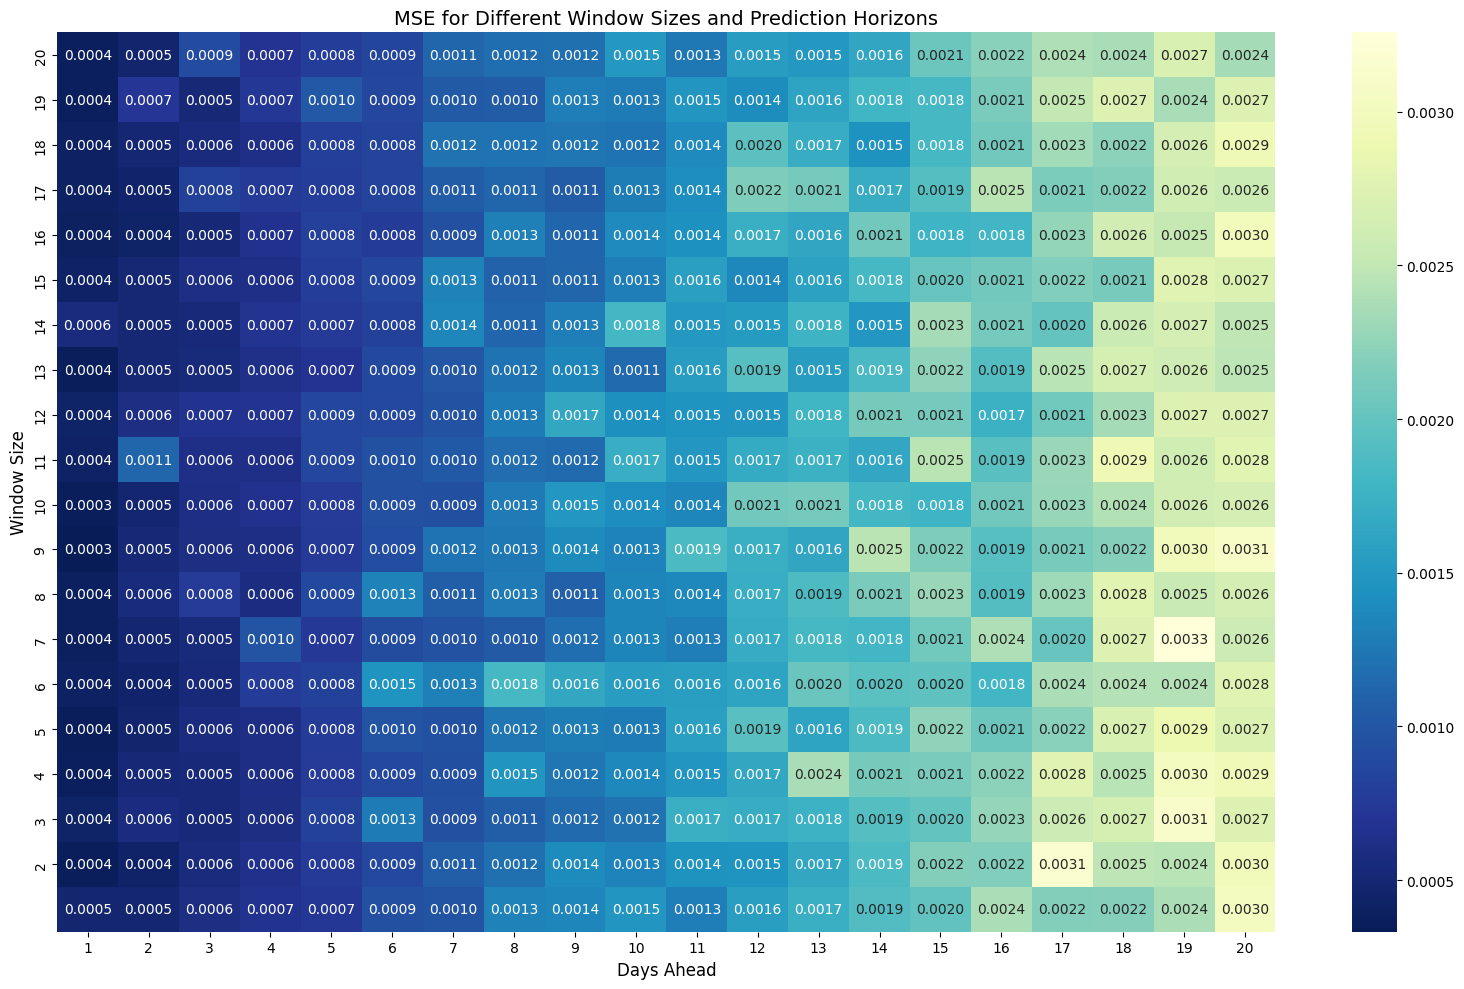

In [14]:
# Create figure with good size
plt.figure(figsize=(16, 10))

# Create enhanced heatmap
sns.heatmap(np.flipud(error), 
            annot=True,              
            fmt=".4f",               
            cmap="YlGnBu_r",         
            xticklabels=range(distanceBetweenDataPoints, (numberOfDataPoints + 1) * distanceBetweenDataPoints, distanceBetweenDataPoints),  # X-axis labels (1-10)
            yticklabels=range(numberOfDataPoints * distanceBetweenDataPoints, distanceBetweenDataPoints, -distanceBetweenDataPoints))  # Y-axis labels (1-10)

# Add axis labels and title
plt.xlabel('Days Ahead', fontsize=12)
plt.ylabel('Window Size', fontsize=12)
plt.title('MSE for Different Window Sizes and Prediction Horizons', fontsize=14)

# Save figure before showing
plt.tight_layout()
plt.savefig('window_analysis_heatmap.png', dpi=300)
plt.show()

X shape: (3806, 1)
y shape: (3806, 1)
Initializing network with layer sizes: [1, 128, 64, 1]
Parameters loaded from params_W_1_1.npz


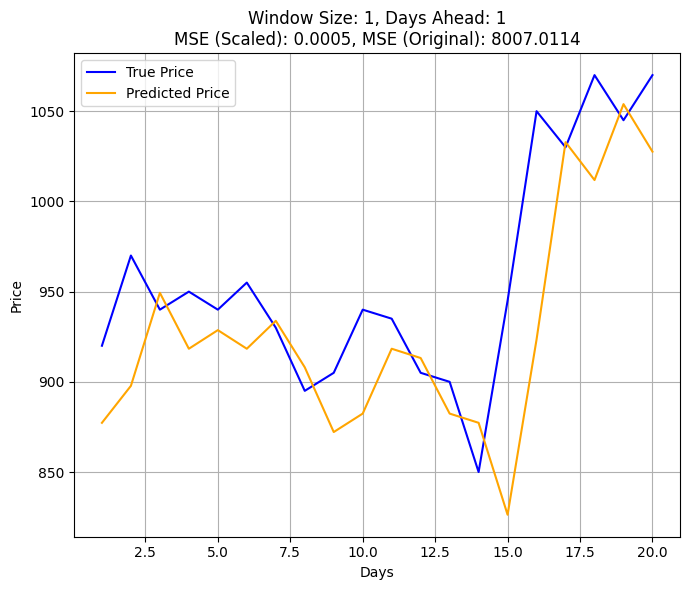

X shape: (3787, 20)
y shape: (3787, 1)
Initializing network with layer sizes: [20, 128, 64, 1]
Parameters loaded from params_W_20_1.npz


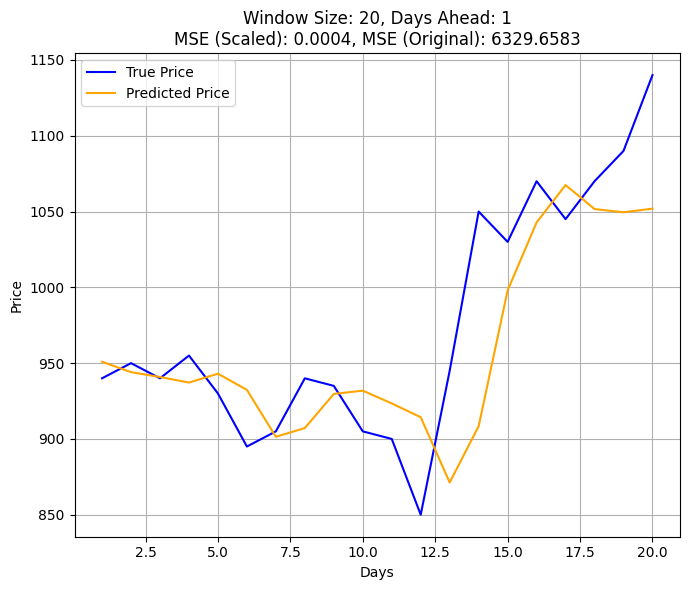

X shape: (3787, 1)
y shape: (3787, 20)
Initializing network with layer sizes: [1, 128, 64, 20]
Parameters loaded from params_W_1_20.npz


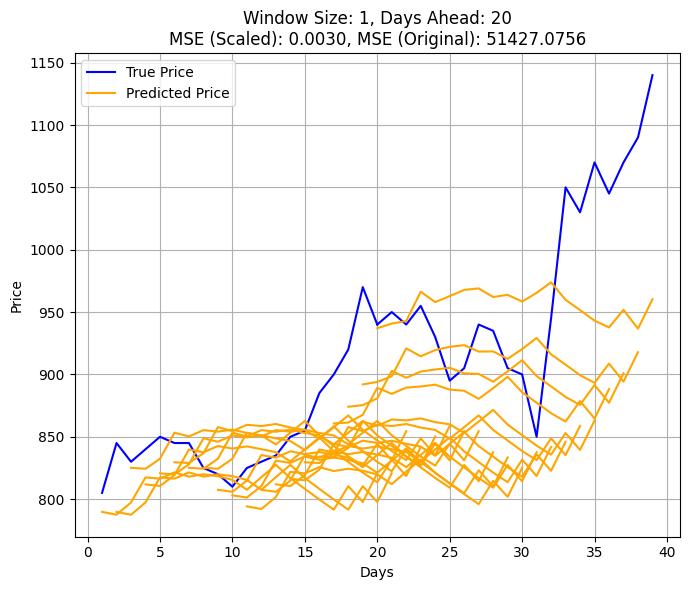

X shape: (3768, 20)
y shape: (3768, 20)
Initializing network with layer sizes: [20, 128, 64, 20]
Parameters loaded from params_W_20_20.npz


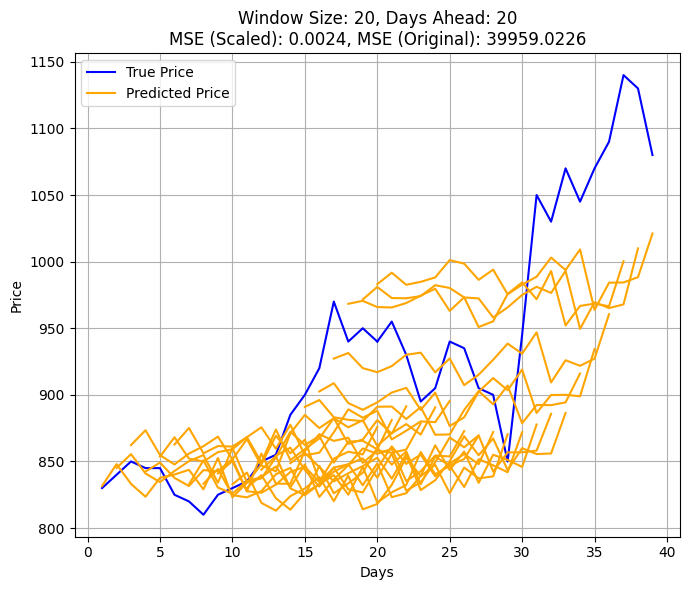

In [15]:
# Function remains the same
def visualize_case(window_size, days_ahead, scaler):
    # Create dataset with specific parameters
    X, y = create_dataset(scaled_data, window_size, days_ahead)
    
    # Use the same splitting approach as defined previously
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, shuffle=False)
    
    # Load the appropriate model
    layer_sizes = [window_size, 128, 64, days_ahead]
    model_name = f"W_{window_size}_{days_ahead}"
    model = BPNN(layer_sizes, model_name)
    
    # Generate predictions
    predictions = model.predict(X_test)
    
    # Calculate MSE on scaled data
    scaled_mse = mean_squared_error(y_test, predictions)
    
    # Inverse transform y_test and predictions to original scale
    y_test_orig = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(y_test.shape)
    pred_orig = scaler.inverse_transform(predictions.reshape(-1, 1)).reshape(predictions.shape)
    
    # Calculate MSE on original scale
    orig_mse = mean_squared_error(y_test_orig, pred_orig)
    
    return y_test_orig, pred_orig, scaled_mse, orig_mse

# Get min and max values
min_window = distanceBetweenDataPoints
max_window = numberOfDataPoints * distanceBetweenDataPoints
min_days_ahead = distanceBetweenDataPoints
max_days_ahead = numberOfDataPoints * distanceBetweenDataPoints

days_shown = 40
days_shown -= 20

# Case 1: Min window, min days (single day prediction)

y_test_orig, pred_orig, scaled_mse1, orig_mse1 = visualize_case(min_window, min_days_ahead, scaler)
X = (np.arange(days_shown) + 1) * distanceBetweenDataPoints

plt.figure(figsize=(7, 6))
plt.plot(X, y_test_orig[:days_shown], label='True Price', color='blue')
plt.plot(X, pred_orig[:days_shown], label='Predicted Price', color='orange')
plt.title(f"Window Size: {min_window}, Days Ahead: {min_days_ahead}\nMSE (Scaled): {scaled_mse1:.4f}, MSE (Original): {orig_mse1:.4f}")
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('case1.png', dpi=300)
plt.show()

# Case 2: Max window, min days (single day prediction)
y_test_orig, pred_orig, scaled_mse2, orig_mse2 = visualize_case(max_window, min_days_ahead, scaler)
X = (np.arange(days_shown) + 1) * distanceBetweenDataPoints

plt.figure(figsize=(7, 6))
plt.plot(X,y_test_orig[:days_shown], label='True Price', color='blue')
plt.plot(X,pred_orig[:days_shown], label='Predicted Price', color='orange')
plt.title(f"Window Size: {max_window}, Days Ahead: {min_days_ahead}\nMSE (Scaled): {scaled_mse2:.4f}, MSE (Original): {orig_mse2:.4f}")
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('case2.png', dpi=300)
plt.show()


# Case 3: Min window, max days (multiple days prediction)
y_test_orig, pred_orig, scaled_mse3, orig_mse3 = visualize_case(min_window, max_days_ahead, scaler)
X_test = (np.arange(days_shown) + 1) * distanceBetweenDataPoints
X_pred = np.arange(len(pred_orig[0,:])) + 1

plt.figure(figsize=(7, 6))
plt.plot(X_test,y_test_orig[:days_shown, 0], label='True Price', color='blue')
plt.plot(np.arange(len(y_test_orig[days_shown-1, :])) + days_shown, y_test_orig[days_shown-1, :], color='blue')


for day in range(days_shown):
    if day == 1:
        plt.plot(X_pred + day, pred_orig[day, :], label='Predicted Price', color='orange')
    else:   
        plt.plot(X_pred + day, pred_orig[day, :], color='orange')

plt.title(f"Window Size: {min_window}, Days Ahead: {max_days_ahead}\nMSE (Scaled): {scaled_mse3:.4f}, MSE (Original): {orig_mse3:.4f}")
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('case3.png', dpi=300)
plt.show()

# Case 4: Max window, max days (multiple days prediction)
y_test_orig, pred_orig, scaled_mse4, orig_mse4 = visualize_case(max_window, max_days_ahead, scaler)
X_test = (np.arange(days_shown) + 1) * distanceBetweenDataPoints
X_pred = np.arange(len(pred_orig[0,:])) + 1

plt.figure(figsize=(7, 6))
plt.plot(X_test,y_test_orig[:days_shown, 0], label='True Price', color='blue')
plt.plot(np.arange(len(y_test_orig[days_shown-1, :])) + days_shown, y_test_orig[days_shown-1, :], color='blue')

for day in range(days_shown):
    if day == 1:
        plt.plot(X_pred + day, pred_orig[day, :], label='Predicted Price', color='orange')
    else:   
        plt.plot(X_pred + day, pred_orig[day, :], color='orange')

plt.title(f"Window Size: {max_window}, Days Ahead: {max_days_ahead}\nMSE (Scaled): {scaled_mse4:.4f}, MSE (Original): {orig_mse4:.4f}")
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('case4.png', dpi=300)
plt.show()
